## Feature Relevance Analysis

In the scoring prediction task, we aim to identify the most relevant features that influence the score. To ensure a robust feature selection process, we utilize a combination of statistical tests and visualizations. The options we try include:

- **F-statistic and p-value**: We use the F-statistic to measure the strength of the relationship between each feature and the target variable. Features with higher F-statistics and lower p-values are considered more relevant. We choose a p-value threshold of 0.05, as it is a common standard in statistical analysis, indicating a 95% confidence that the feature's relevance is not due to random chance.

- **Plot Feature per Classes**: Visualizing the distribution of features across different score classes allows us to intuitively assess their relevance. Features with distinct distributions across classes are likely to be more significant.

By combining these methods, we can cross-validate our findings, ensuring that selected features are consistently relevant across multiple tests. This comprehensive approach increases the reliability of our feature selection, ultimately enhancing the accuracy of our scoring prediction model.
tion model.


### Readme

This Jupyter Notebook performs a detailed analysis of numerical features to determine their relevance in a scoring prediction task. The main steps undertaken in this analysis include:

1. **Loading the Data**: The dataset containing numerical features and the target score is loaded for analysis.

2. **Identifying Numeric Features**: Extracted and counted the numeric features present in the dataset.

3. **F-statistic and p-value Calculation**: 
   - Computed the F-statistic and p-values for each numerical feature to assess their relationship with the target variable.
   - Categorized features into relevant and non-relevant based on a p-value threshold of 0.05.

4. **Visualization**: 
   - Plotted the distribution of relevant features across different score classes using boxplots and violin plots to intuitively assess their relevance.
   - Saved the visualizations for future reference.

5. **Conclusion**: Summarized the findings from the statistical analysis and visualizations, highlighting the most relevant features for the scoring prediction task.

This combined approach of statistical tests and visual analysis ensures a robust feature selection process, enhancing the accuracy and reliability of the scoring prediction model.


## Content
  - [1. Import Libraries](#1-Import-Libraries)
  - [2. Get Data](#2-Get-Data)
  - [3. Identify Numeric Features](#3-Identify-Numeric-Features)
  - [4. Compute F-statistic and p-value](#4-Compute-F-statistic-and-p-value)
    - [4.1 Define X and y](#4.1-Define-X-and-y)
    - [4.2 Compute Scores](#4.2-Compute-Scores)
    - [4.3 Categorize Features](#4.3-Categorize-Features)
  - [5. Visualize Relevant Features](#5-Visualize-Relevant-Features)
    - [5.1 Boxplots for Relevant Features](#5.1-Boxplots-for-Relevant-Features)
    - [5.2 Violin Plots for Relevant Features](#5.2-Violin-Plots-for-Relevant-Features)
  - [6. Visualize Features with Medium Relevance](#6-Visualize-Features-with-Medium-Relevance)
    - [6.1 Boxplots for Medium Relevance Features](#6.1-Boxplots-for-Medium-Relevance-Features)
    - [6.2 Violin Plots for Medium Relevance Features](#6.2-Violin-Plots-for-Medium-Relevance-Features)
  - [7. Visualize Features with Low Relevance](#7-Visualize-Features-with-Low-Relevance)
    - [7.1 Boxplots for Low Relevance Features](#7.1-Boxplots-for-Low-Relevance-Features)
    - [7.2 Violin Plots for Low Relevance Features](#7.2-Violin-Plots-for-Low-Relevance-Features)
  - [8. Conclusion](#8-Conclusion)


## Get numerical features

In [6]:
# 1. Import Libraries
import pandas as pd
import numpy as np

# 2. Load Data
df = pd.read_csv('numeric_features_added_v1.csv')

# 3. Identify numeric features
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

# 4. Assign 'score' as the target and remove it from numeric features
target = 'score'

if target in numeric_features:
    numeric_features.remove(target)

# 5. Count the number of numeric features
num_numeric_features = len(numeric_features)

# 6. Display the list of numeric features and their count
print("List of numeric features:", numeric_features)
print("Number of numeric features:", num_numeric_features)

# 7. Define X and y
X = df[numeric_features]
y = df[target]


List of numeric features: ['word_count_in_full_text', 'stopword_count_in_full_text', 'newline_count', 'not_count', 'question_count', 'comma_count', 'colon_count', 'exclamation_count', 'dash_count', 'capital_word_count', 'letters_count', 'capital_letters_count', 'min_sentence_length', 'max_sentence_length', 'avg_sentence_length', 'mistakes_count', 'mistakes_dist_count', 'transitional_phrases_c', 'transitional_phrases_dist_c', 'words_with_apostrophe_count', 'preprocessed_text_count', 'preprocessed_text_dist_count', 'text_dist_words_ratio', 'mistakes_dist_ratio', 'mistakes_dist_dist_ratio', 'transitional_phrases_ratio', 'transitional_dist_dist_phrases_ratio', 'transitional_dist_phrases_ratio', 'flesch_reading_ease', 'flesch_kincaid_grade', 'smog_index', 'coleman_liau_index', 'automated_readability_index', 'dale_chall_readability_score', 'difficult_words', 'linsear_write_formula', 'gunning_fog', 'text_standard', 'spache_readability', 'mcalpine_eflaw', 'reading_time', 'syllable_count', 'lex

## F-statistic and p-value

### Option 1: Use a p-value threshold of 0.05, indicating 95% confidence in feature relevance.

Number of relevant features: 43
Number of non-relevant features: 5
Non-relevant features: ['exclamation_count', 'max_sentence_length', 'transitional_dist_phrases_ratio', 'linsear_write_formula', 'text_standard']


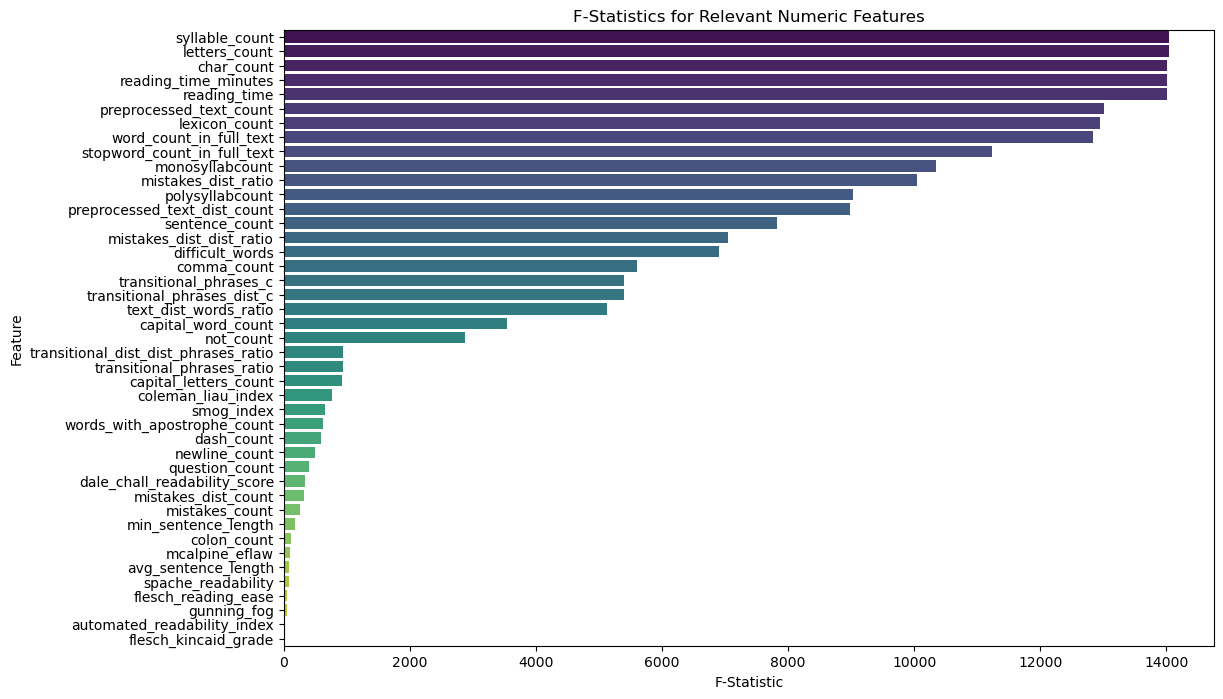

In [9]:

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt
import seaborn as sns


# Define X and y
X = df[numeric_features]
y = df[target]

# Compute F-statistic and p-values
scores, p_values = f_regression(X, y)

# Create a DataFrame for F-statistic and p-values
f_stat_df = pd.DataFrame({'Feature': numeric_features, 'F-Statistic': scores, 'P-Value': p_values})

# Define a column to categorize relevant and non-relevant features
f_stat_df['Relevance'] = np.where(f_stat_df['P-Value'] < 0.05, 'Relevant', 'Non-Relevant')

# Separate relevant and non-relevant features
relevant_features = f_stat_df[f_stat_df['Relevance'] == 'Relevant']['Feature'].tolist()
non_relevant_features = f_stat_df[f_stat_df['Relevance'] == 'Non-Relevant']['Feature'].tolist()

# Count relevant features
num_relevant_features = len(relevant_features)
num_non_relevant_features = len(non_relevant_features)

# Display the count of relevant features
print("Number of relevant features:", num_relevant_features)
print("Number of non-relevant features:", num_non_relevant_features)

# Display the lists of relevant and non-relevant features
print("Non-relevant features:", non_relevant_features)

# Plot the F-Statistics for relevant features only
plt.figure(figsize=(12, 8))
sns.barplot(x='F-Statistic', y='Feature', data=f_stat_df[f_stat_df['Relevance'] == 'Relevant'].sort_values(by='F-Statistic', ascending=False),
            palette='viridis')
plt.title("F-Statistics for Relevant Numeric Features")
#plt.savefig('relevant_f_statistics_plot.png')
plt.show()


Features with significant p-values (typically p < 0.05) from the F-statistic test are considered as having significant differences in means across score classes, indicating their relevance.
By leveraging the F-statistic, we have effectively compared the averages of our features across different score classes and identified those that are relevant for our prediction task.

### Option 2: Categorize Features

Based on the plot from option 1, we choose thresholds to group features into low, medium, and high variance categories.

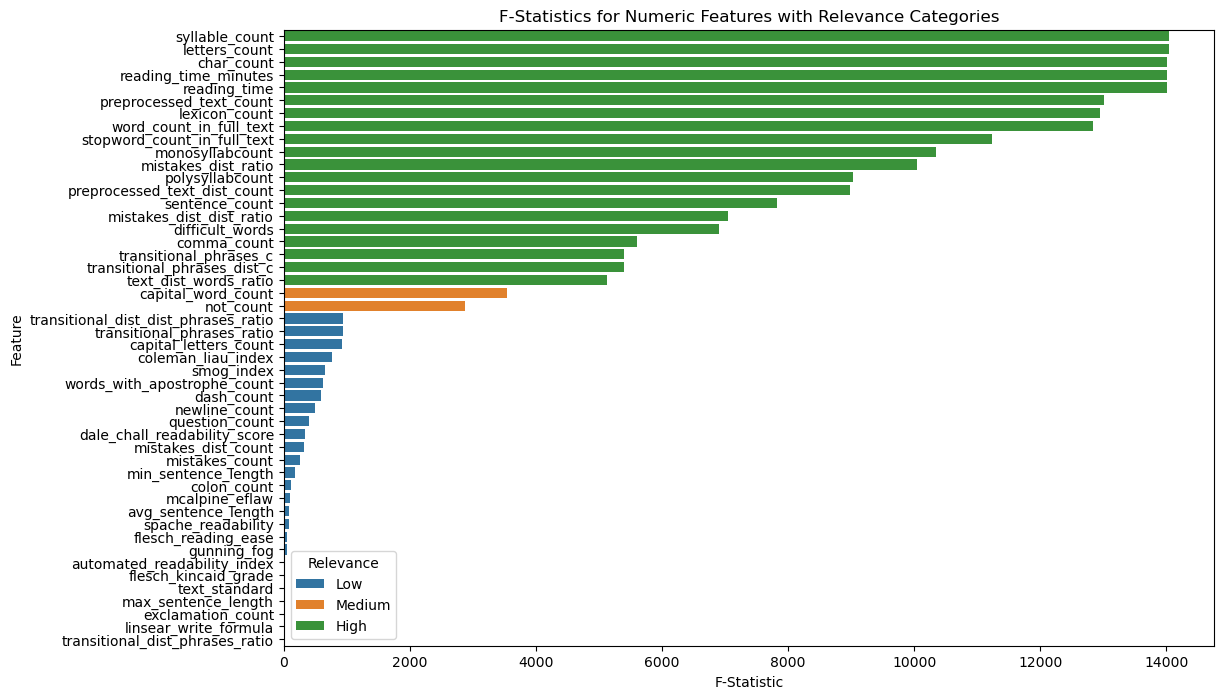

In [13]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_regression

# 2. Define X and y
X = df[numeric_features]
y = df[target]

# 3. Compute F-statistic and p-values
scores, p_values = f_regression(X, y)

# 4. Create a DataFrame for F-statistic and p-values
f_stat_df = pd.DataFrame({'Feature': numeric_features, 'F-Statistic': scores, 'P-Value': p_values})

# 5. Sort features by score
f_stat_df = f_stat_df.sort_values(by='F-Statistic', ascending=False)

# 6. Define categorization thresholds
high_threshold = 5000
medium_threshold = 1000

# 7. Categorize features
f_stat_df['Relevance'] = pd.cut(f_stat_df['F-Statistic'], bins=[-np.inf, medium_threshold, high_threshold, np.inf], labels=['Low', 'Medium', 'High'])


# 8. Plot the F-Statistics with categories
plt.figure(figsize=(12, 8))
sns.barplot(x='F-Statistic', y='Feature', hue='Relevance', data=f_stat_df, dodge=False)
plt.title("F-Statistics for Numeric Features with Relevance Categories")
plt.savefig('f_statistics_with_relevance_categories.png')
plt.show()



In [14]:
# 10. Display the categorized DataFrame
f_stat_df.head(50)

Feature   F-Statistic        P-Value  \
41                        syllable_count  14051.061106   0.000000e+00   
10                         letters_count  14037.178274   0.000000e+00   
44                            char_count  14015.750545   0.000000e+00   
47                  reading_time_minutes  14015.713862   0.000000e+00   
40                          reading_time  14015.713862   0.000000e+00   
20               preprocessed_text_count  13007.628981   0.000000e+00   
42                         lexicon_count  12943.039539   0.000000e+00   
0                word_count_in_full_text  12844.148575   0.000000e+00   
1            stopword_count_in_full_text  11230.477608   0.000000e+00   
43                       monosyllabcount  10349.597293   0.000000e+00   
23                   mistakes_dist_ratio  10037.989574   0.000000e+00   
46                       polysyllabcount   9028.783738   0.000000e+00   
21          preprocessed_text_dist_count   8989.835324   0.000000e+00   
45                        sentence_count   7817.756070   0.000000e+00   
24              mistakes_dist_dist_ratio   7047.219443   0.000000e+00   
34                       difficult_words   6904.770636   0.000000e+00   
5                            comma_count   5599.148378   0.000000e+00   
17                transitional_phrases_c   5403.383870   0.000000e+00   
18           transitional_phrases_dist_c   5402.486804   0.000000e+00   
22                 text_dist_words_ratio   5133.944242   0.000000e+00   
9                     capital_word_count   3541.696820   0.000000e+00   
3                              not_count   2874.549379   0.000000e+00   
26  transitional_dist_dist_phrases_ratio    945.747154  5.939562e-201   
25            transitional_phrases_ratio    943.403589  1.780924e-200   
11                 capital_letters_count    930.258922  8.450309e-198   
31                    coleman_liau_index    757.821350  1.825266e-162   
30                            smog_index    646.165380  2.342730e-139   
19           words_with_apostrophe_count    614.944714  7.312431e-133   
8                             dash_count    591.211065  6.467568e-128   
2                          newline_count    497.324388  2.901936e-108   
4                         question_count    400.050861   9.284948e-88   
33          dale_chall_readability_score    343.256964   1.023632e-75   
16                   mistakes_dist_count    327.154556   2.717589e-72   
15                        mistakes_count    257.714261   1.783925e-57   
12                   min_sentence_length    175.171743   9.574564e-40   
6                            colon_count    119.317178   1.157502e-27   
39                        mcalpine_eflaw     98.374711   4.135049e-23   
14                   avg_sentence_length     90.496775   2.153760e-21   
38                    spache_readability     78.219953   1.032001e-18   
28                   flesch_reading_ease     44.891610   2.162978e-11   
36                           gunning_fog     44.856480   2.202005e-11   
32           automated_readability_index     10.289894   1.340652e-03   
29                  flesch_kincaid_grade      8.445908   3.664457e-03   
37                         text_standard      3.799097   5.130040e-02   
13                   max_sentence_length      3.113817   7.765288e-02   
7                      exclamation_count      2.594294   1.072720e-01   
35                 linsear_write_formula      1.985270   1.588587e-01   
27       transitional_dist_phrases_ratio      0.055474   8.138009e-01   

   Relevance  
41      High  
10      High  
44      High  
47      High  
40      High  
20      High  
42      High  
0       High  
1       High  
43      High  
23      High  
46      High  
21      High  
45      High  
24      High  
34      High  
5       High  
17      High  
18      High  
22      High  
9     Medium  
3     Medium  
26       Low  
25       Low  
11       Low  
31       Low  
30       Low  
19       Low  
8        Low  
2    

In [15]:
# Save the DataFrame as an image
import dataframe_image as dfi
dfi.export(f_stat_df.head(50), 'f_stat_df.png')

## Plot Feature per Classes

### Analysis of Features with High Relevance

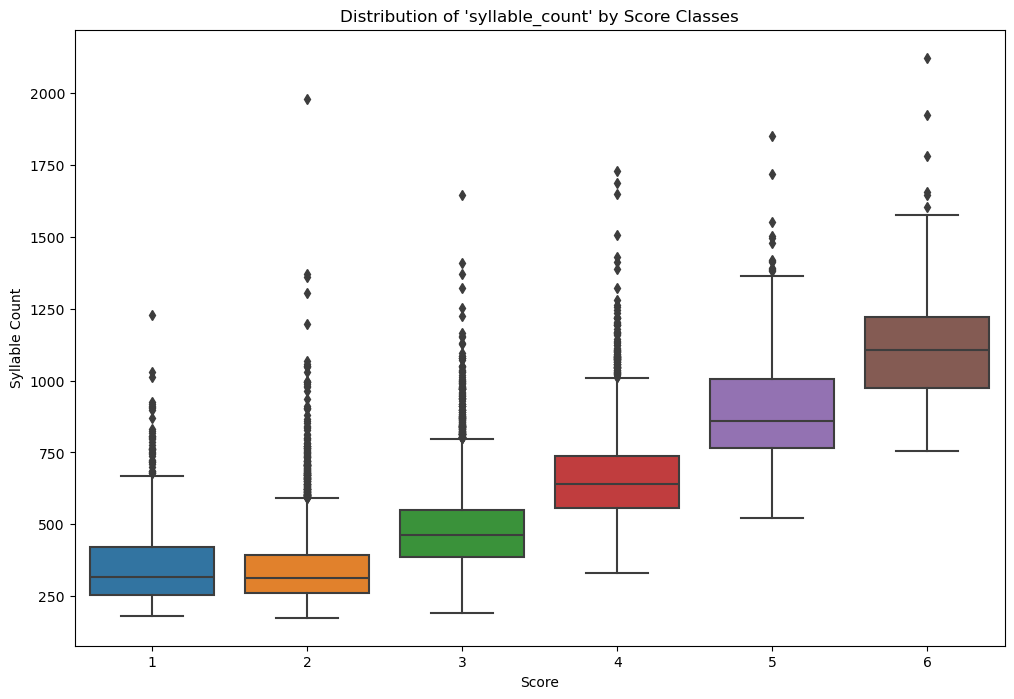

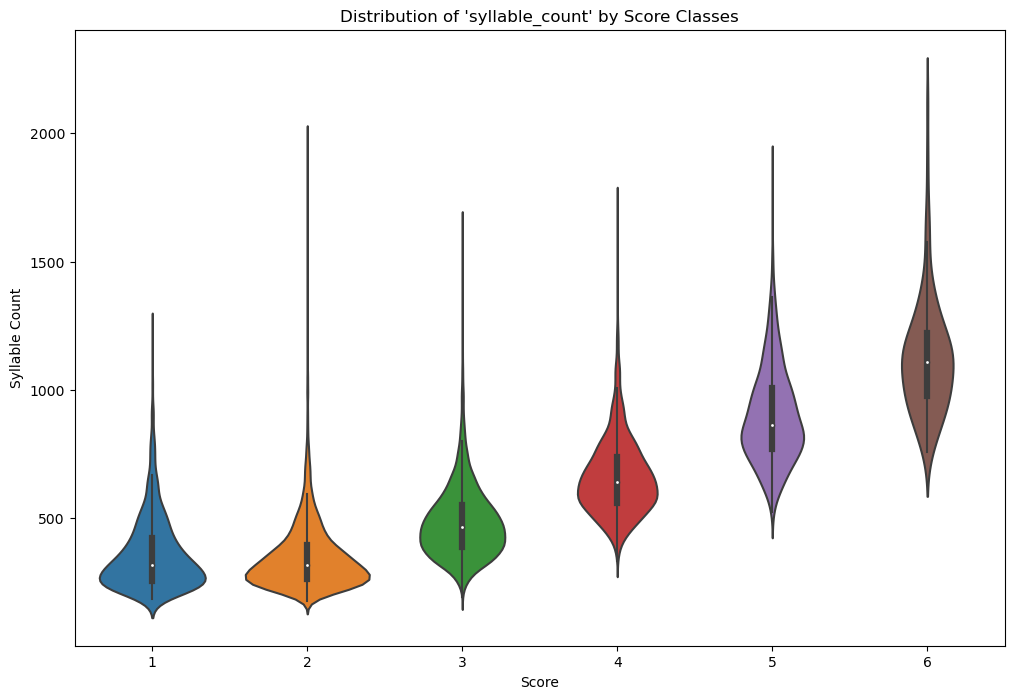

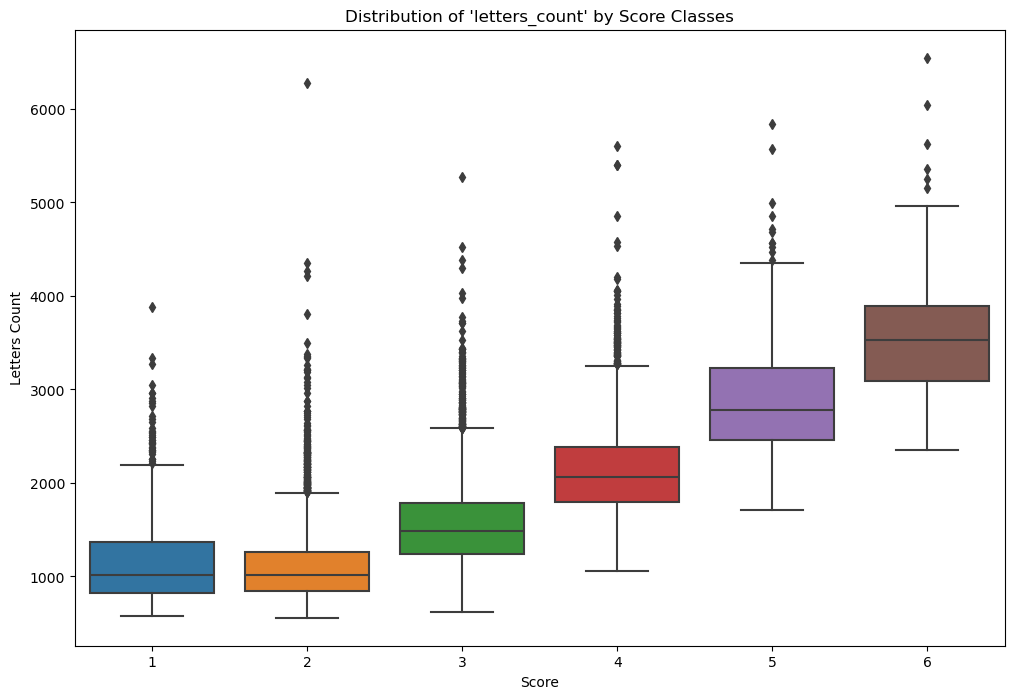

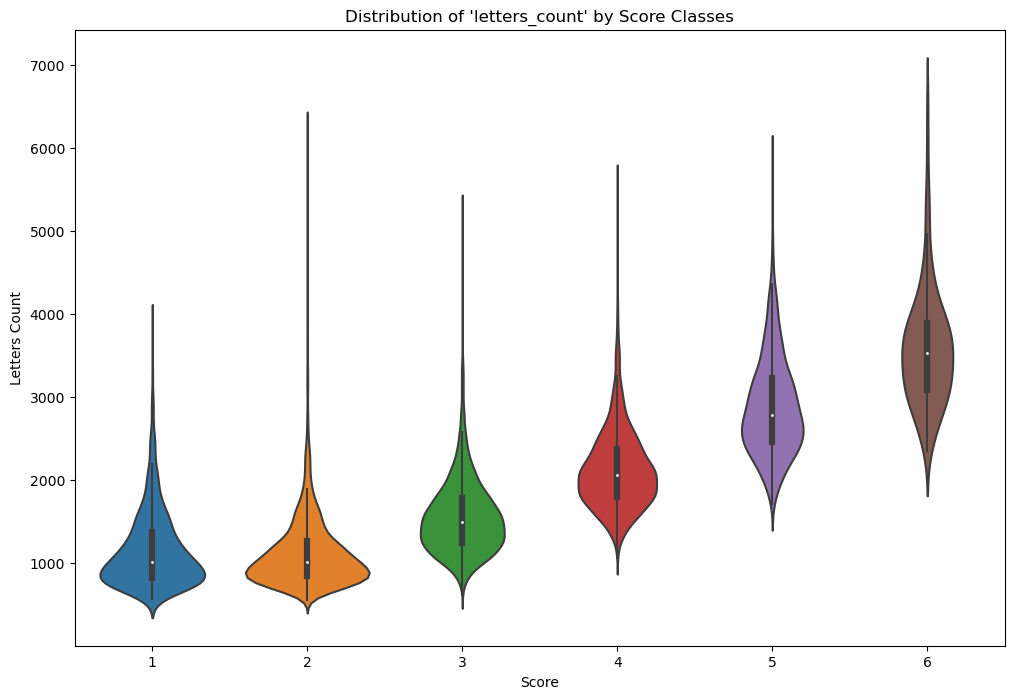

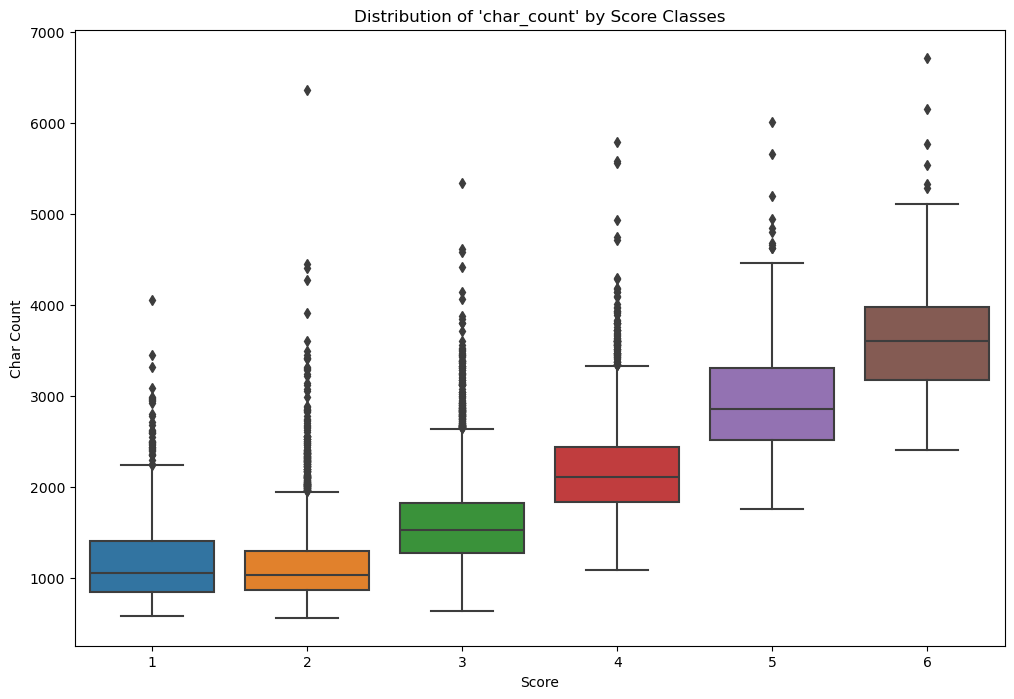

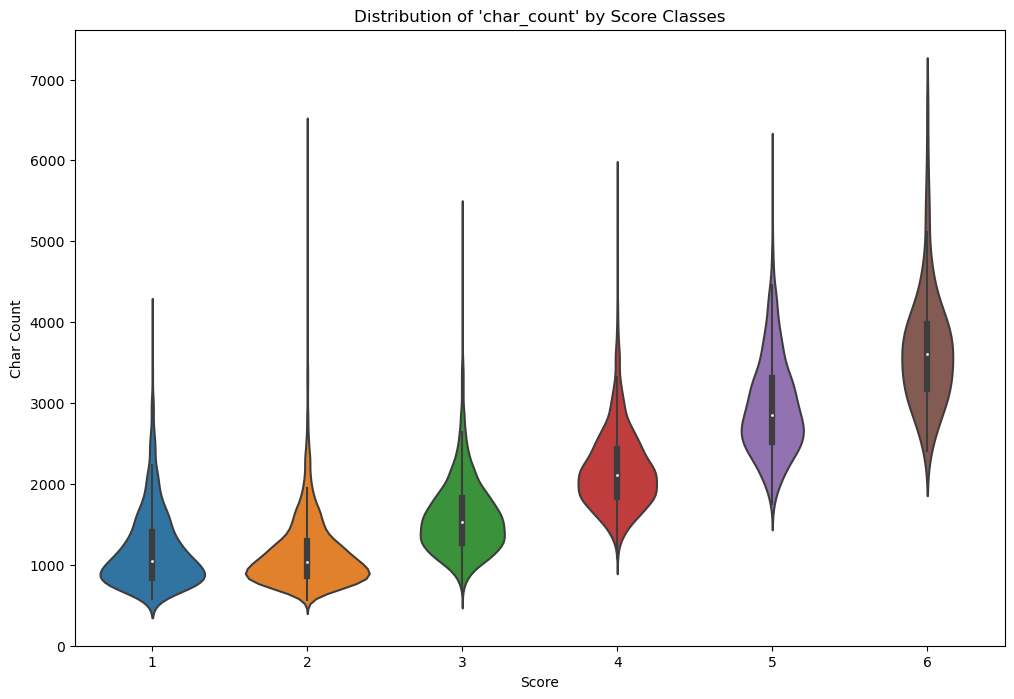

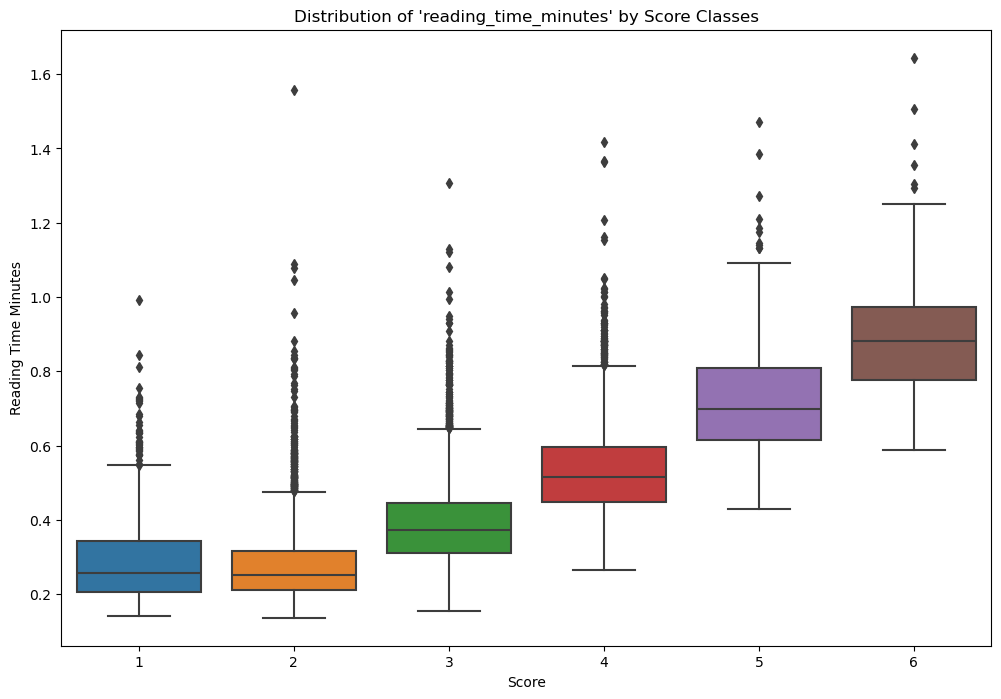

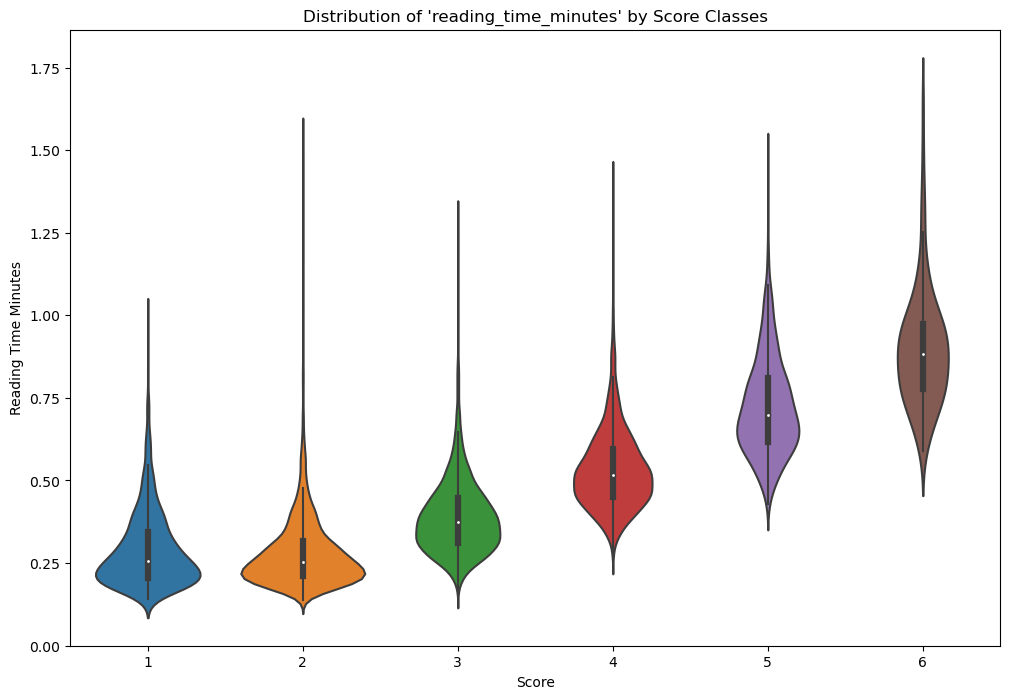

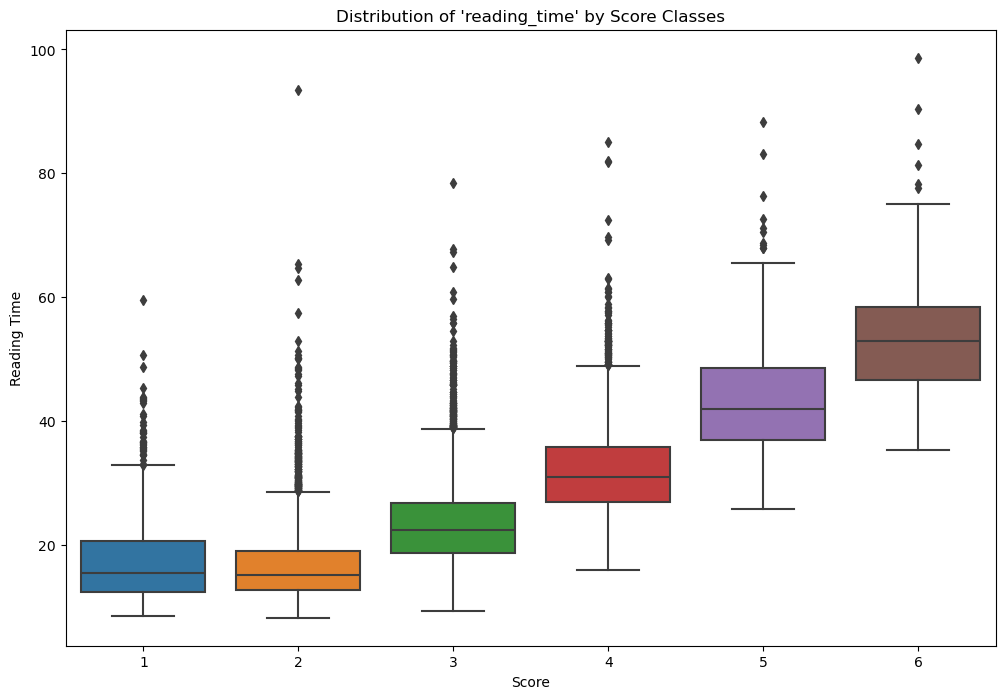

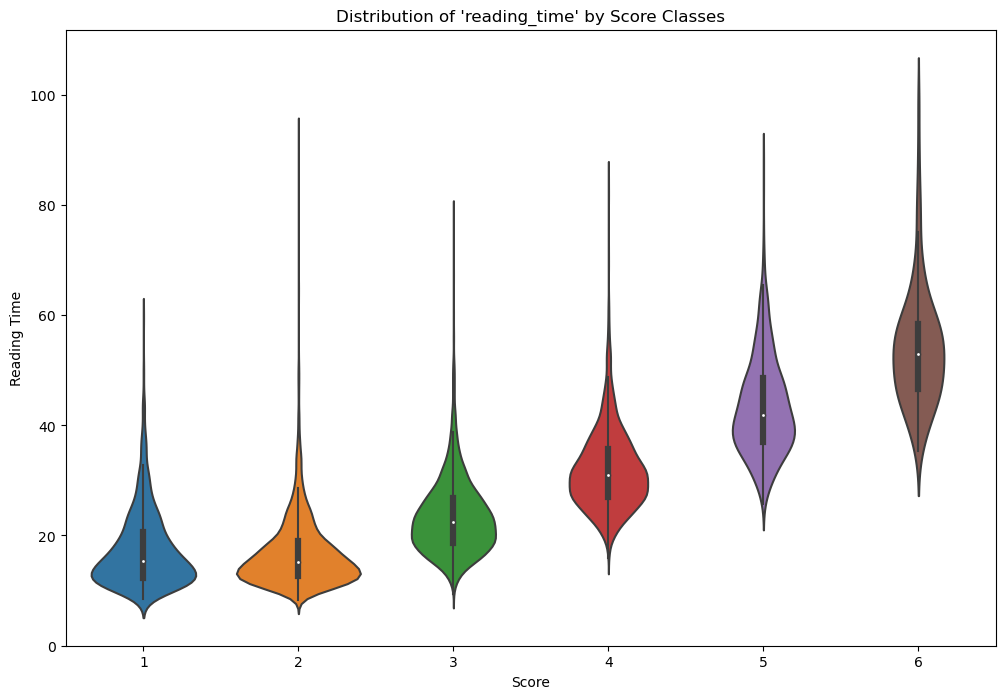

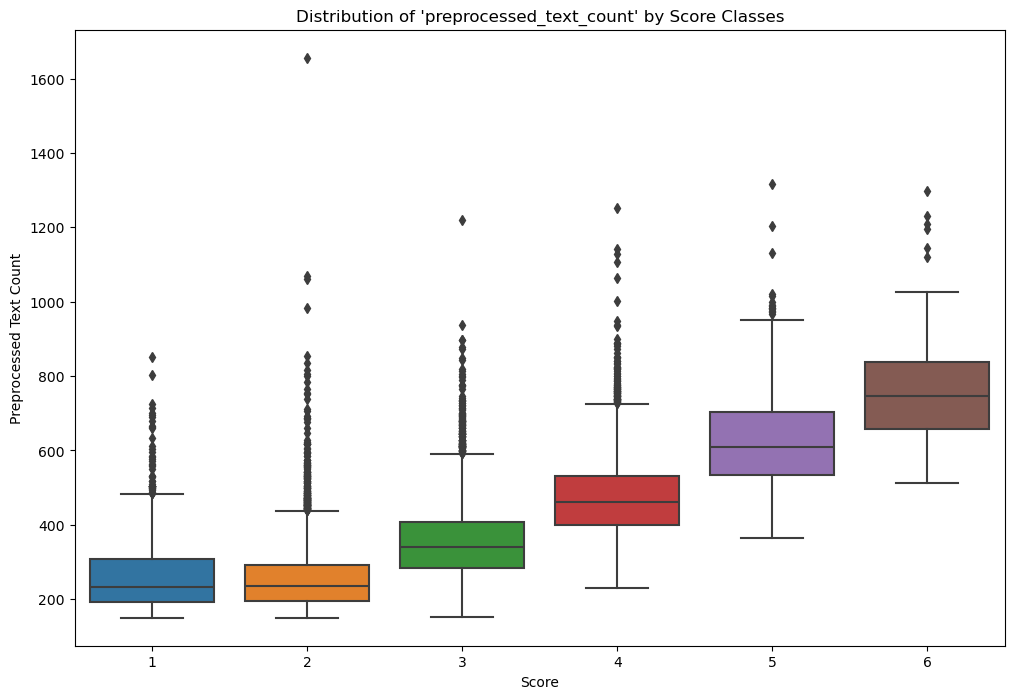

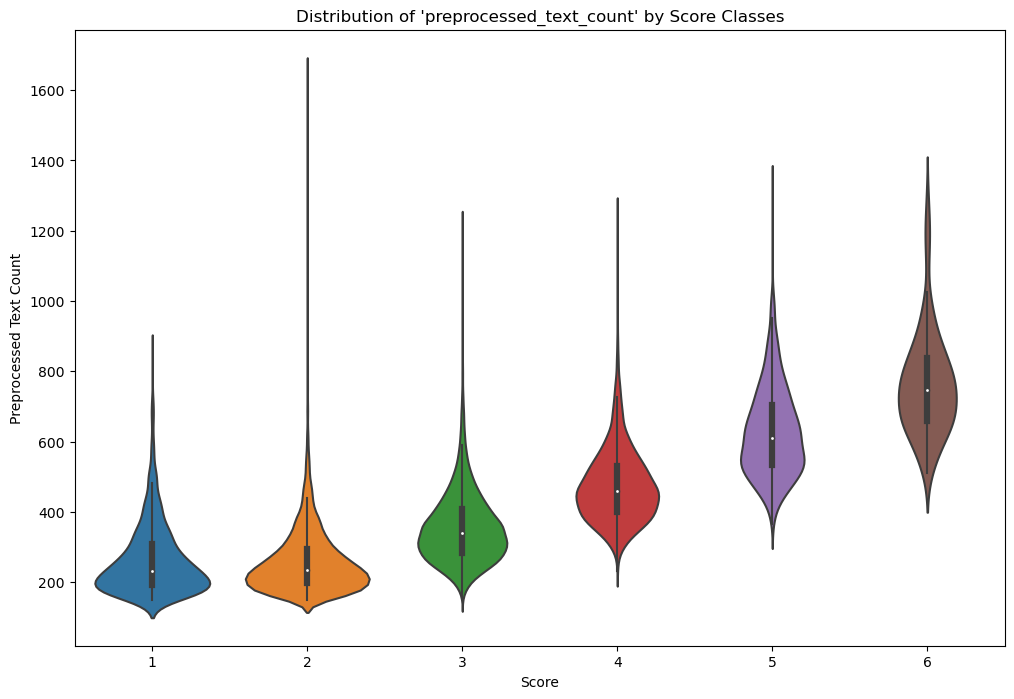

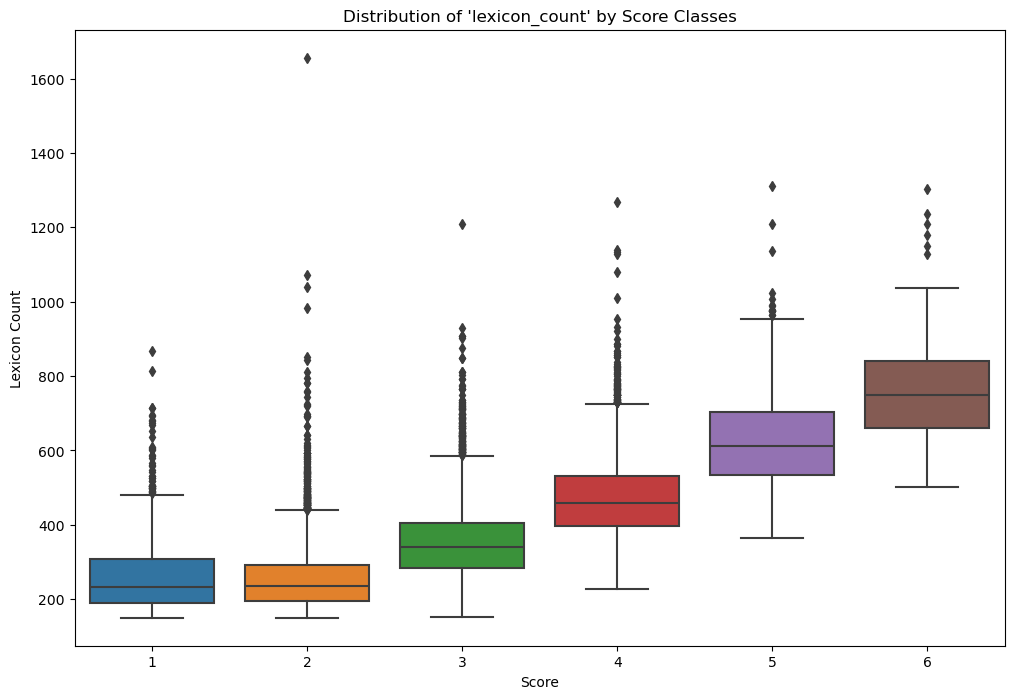

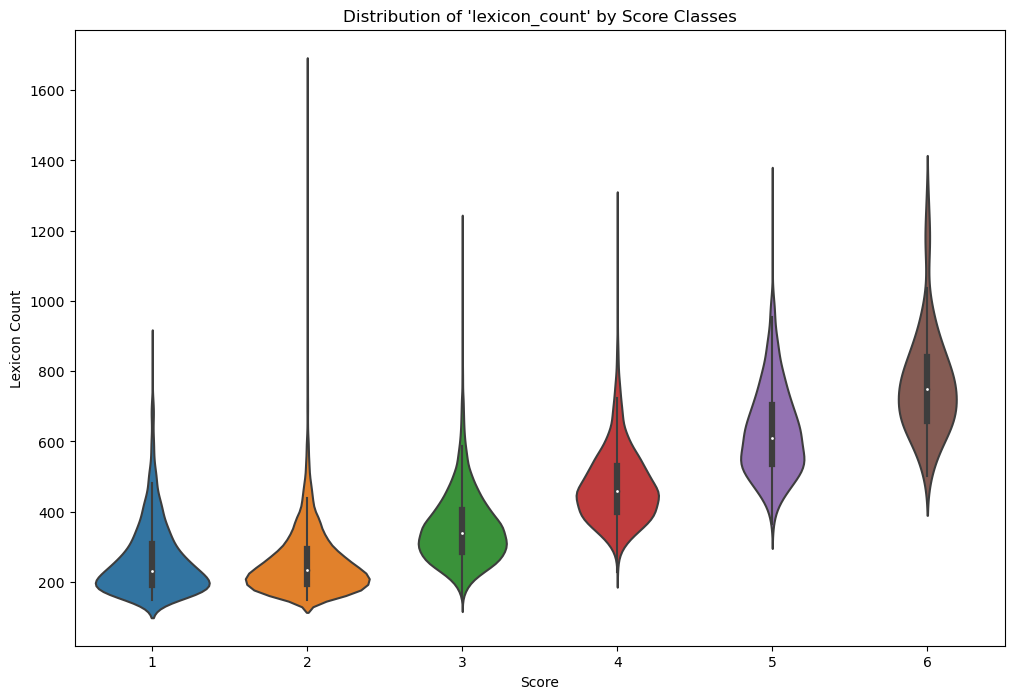

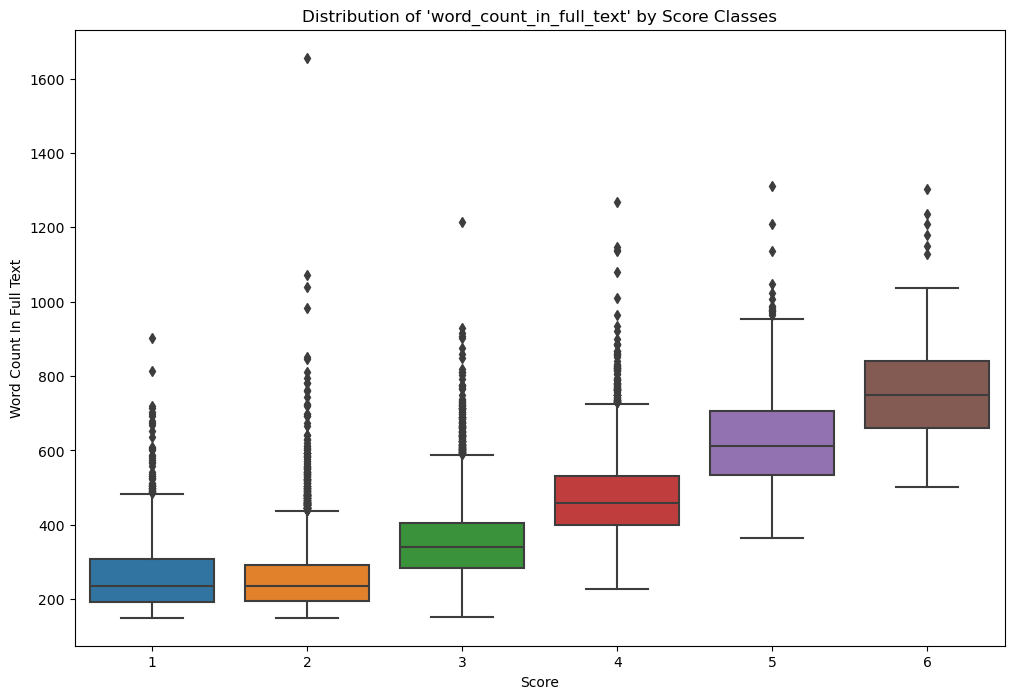

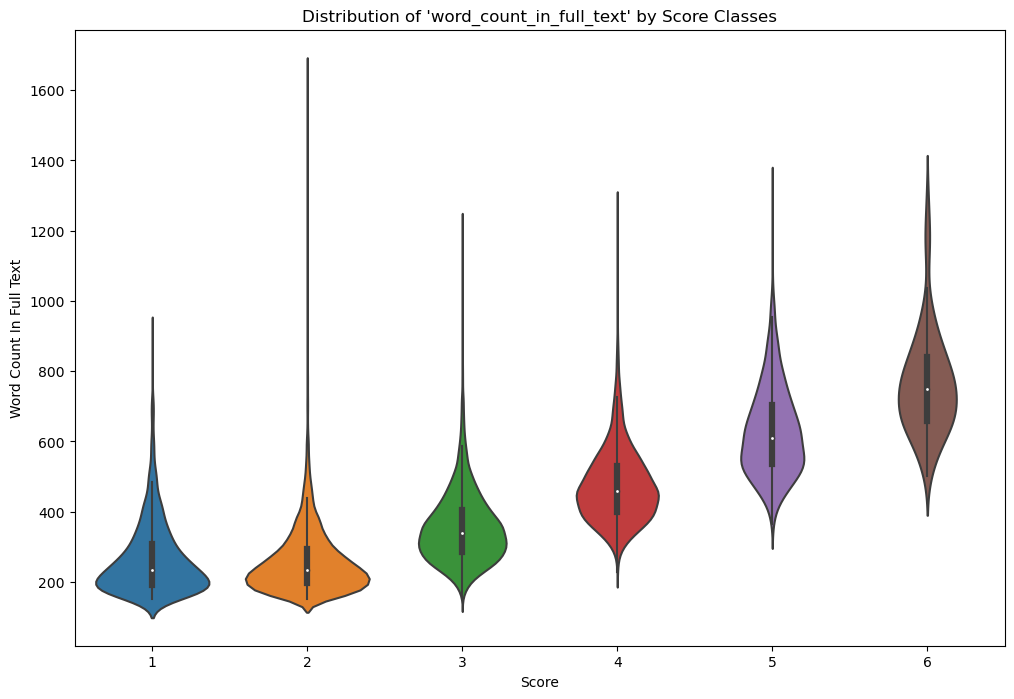

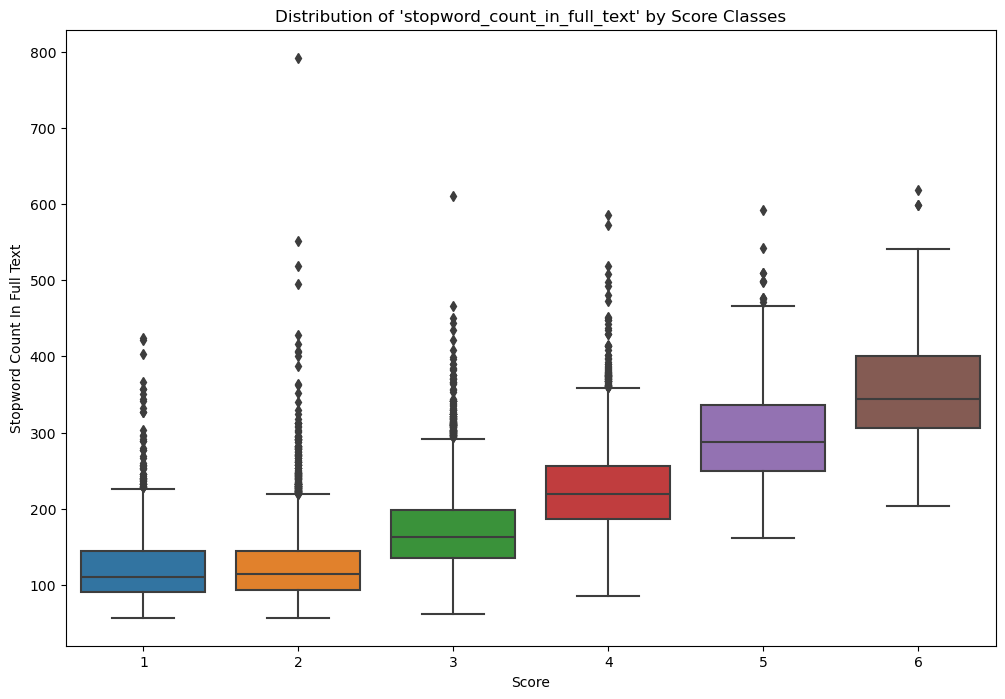

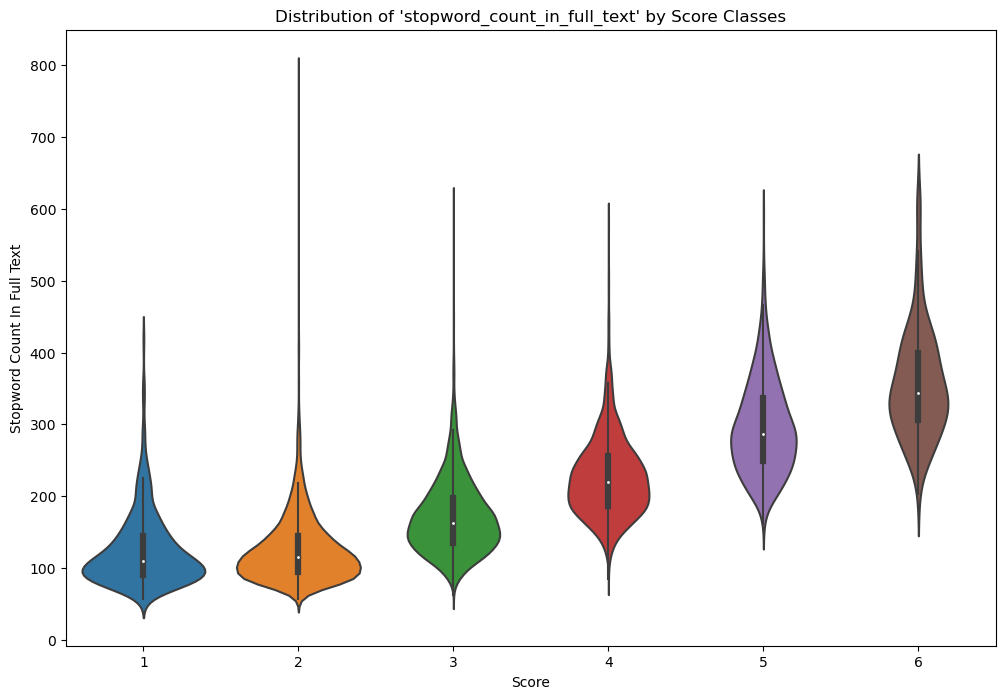

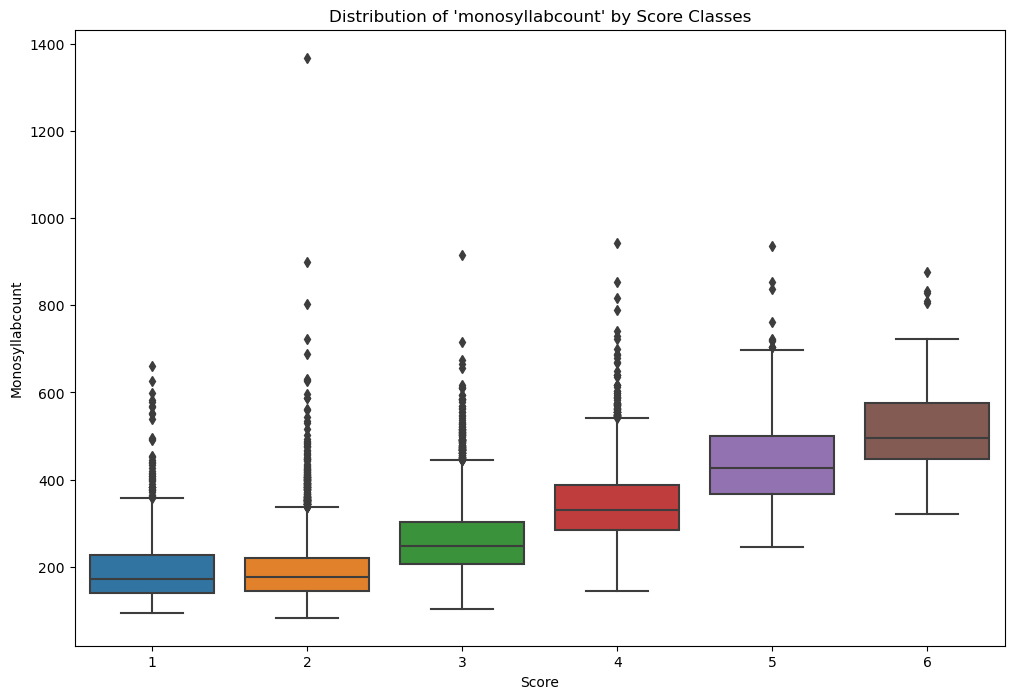

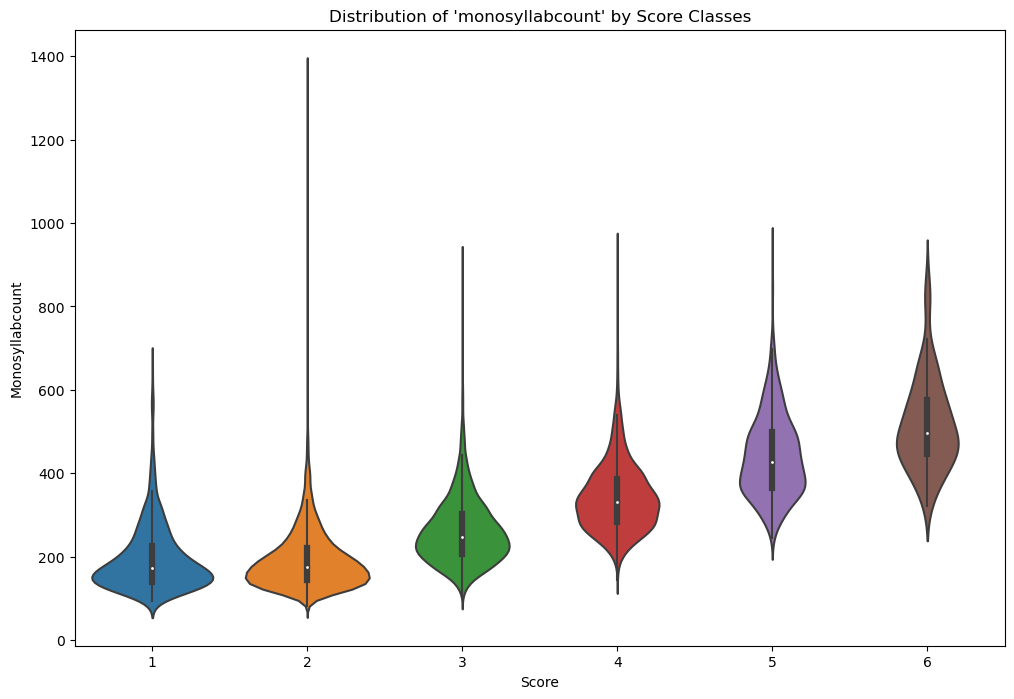

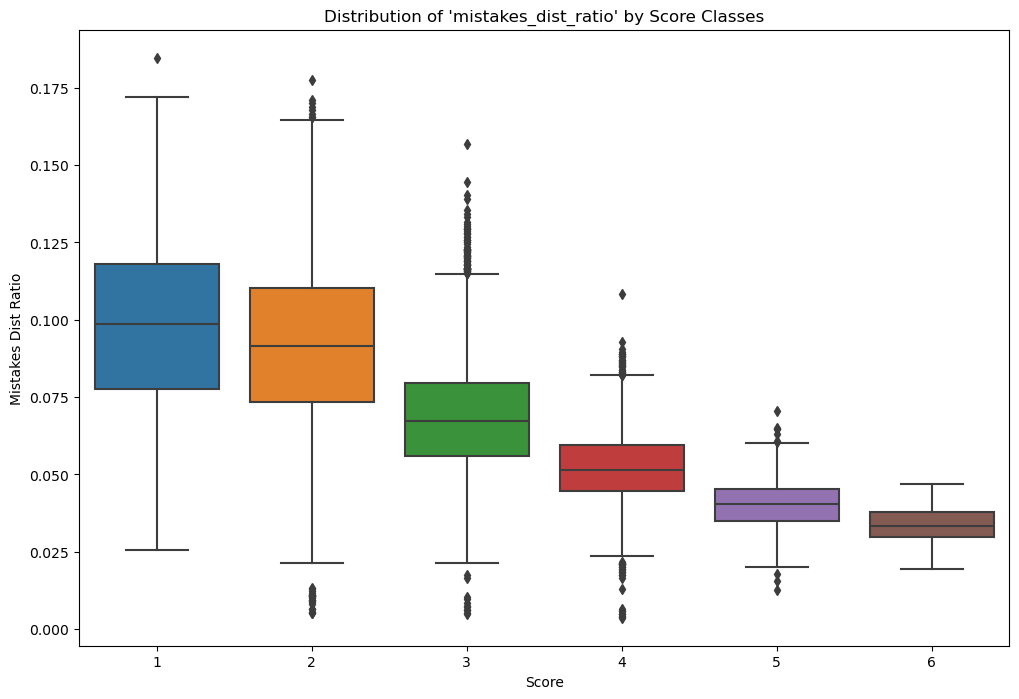

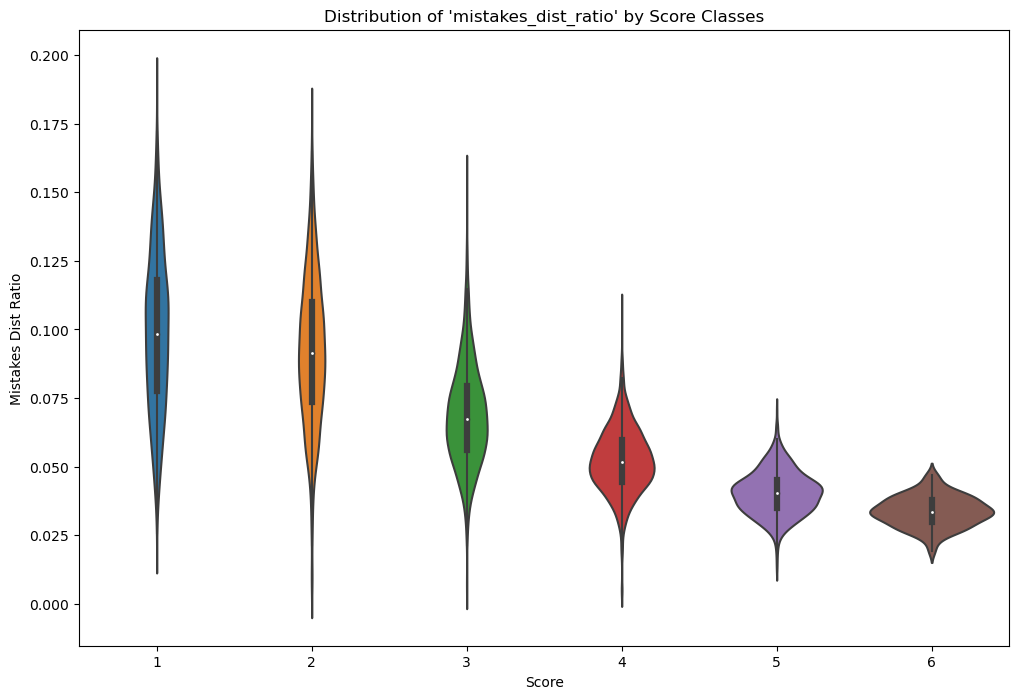

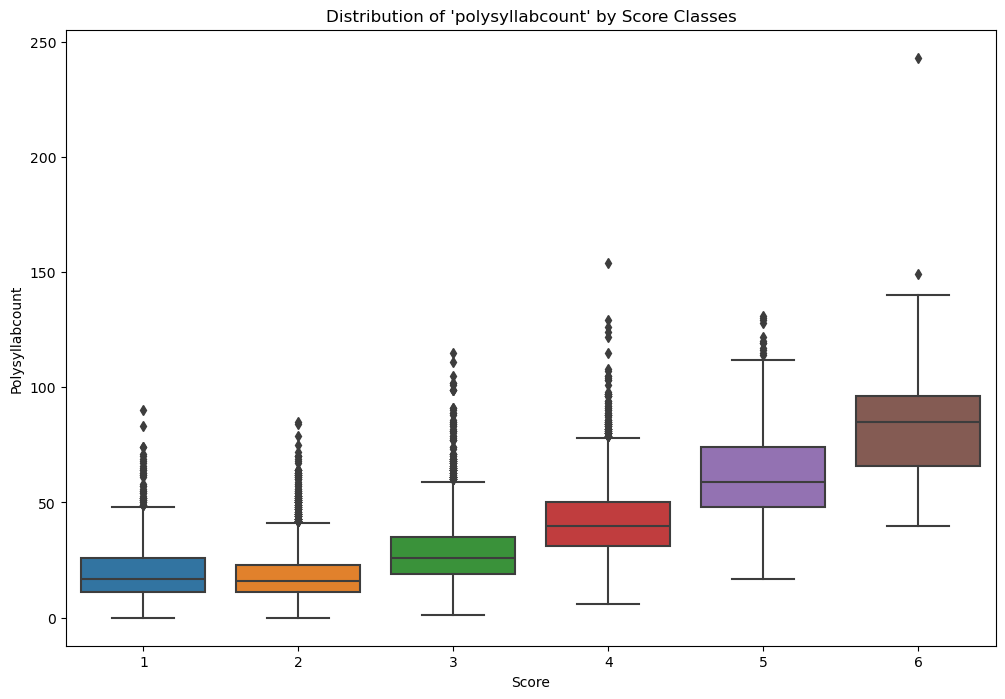

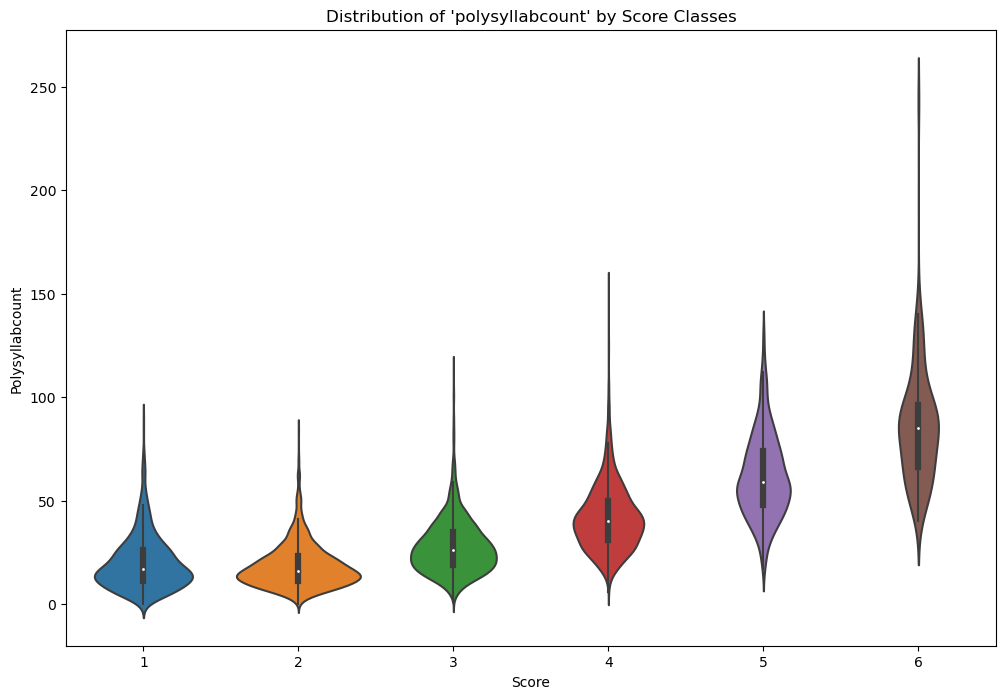

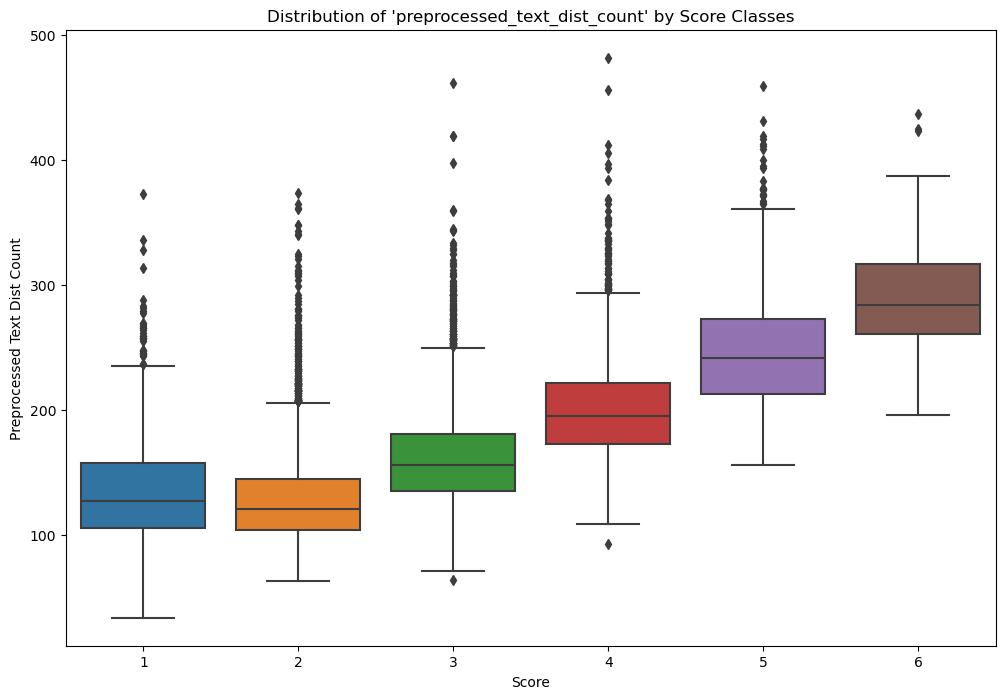

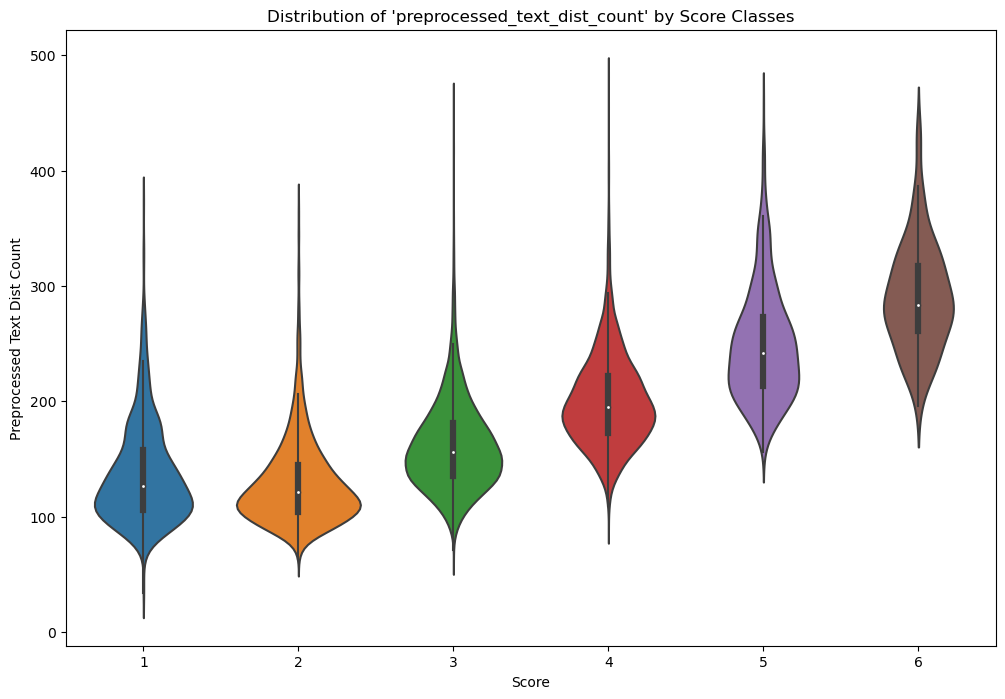

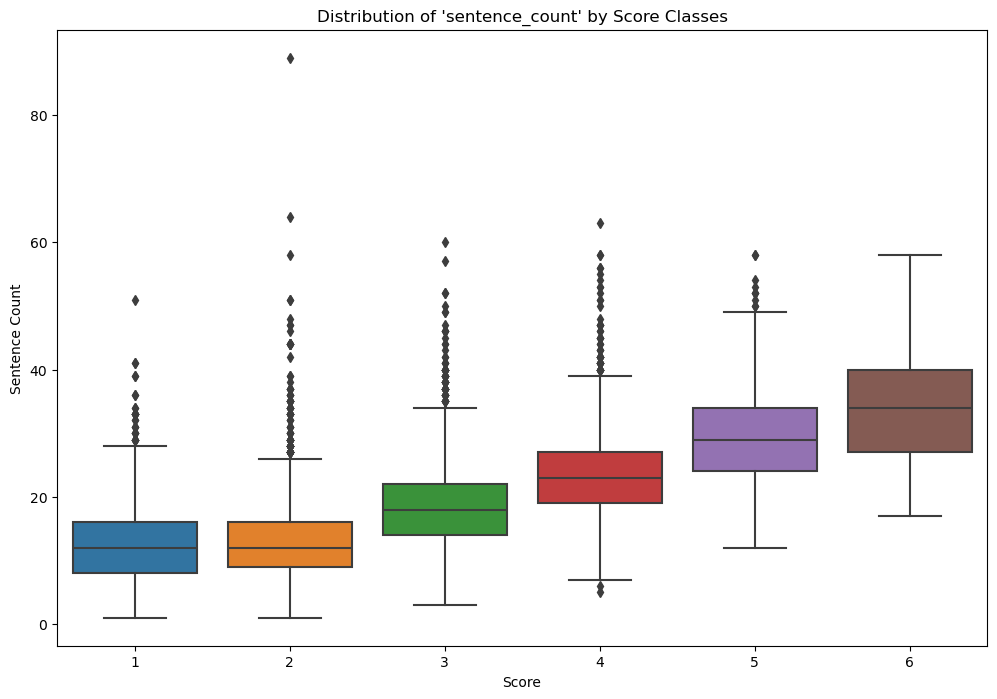

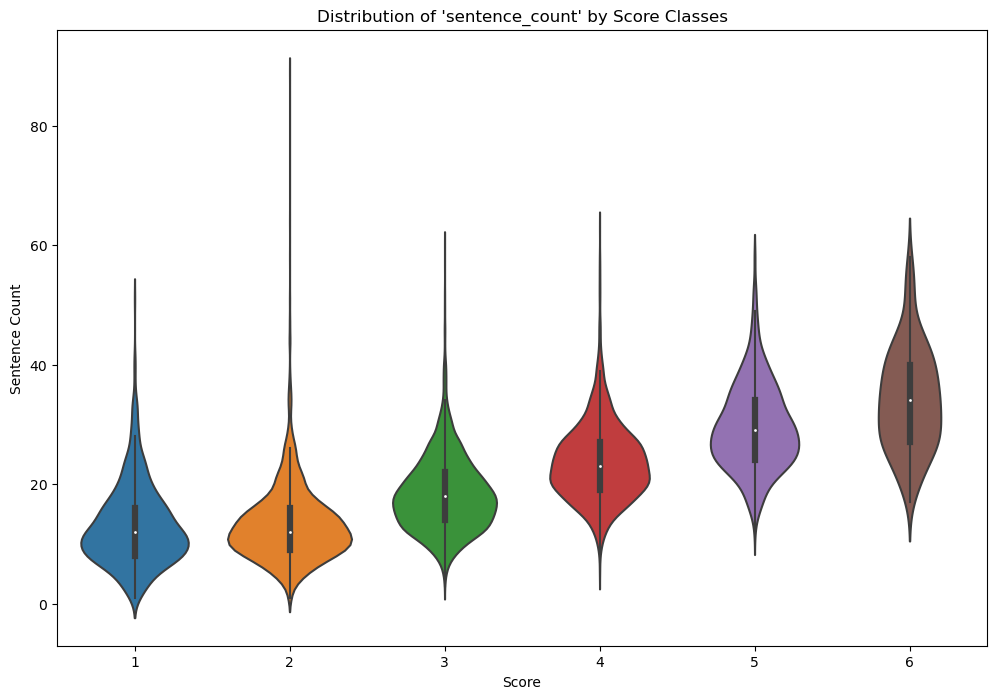

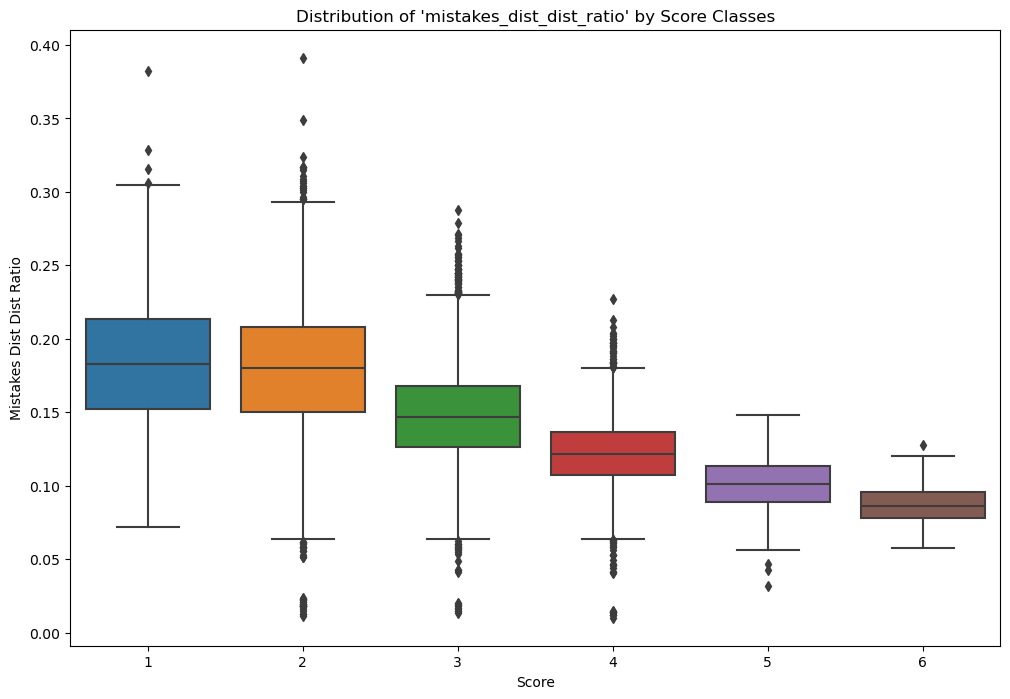

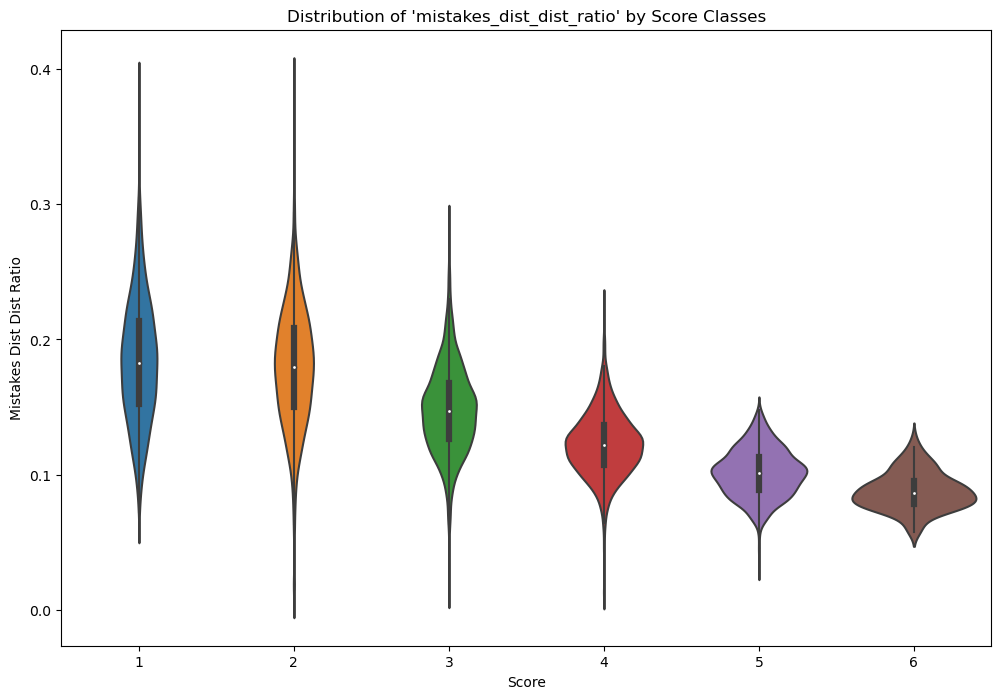

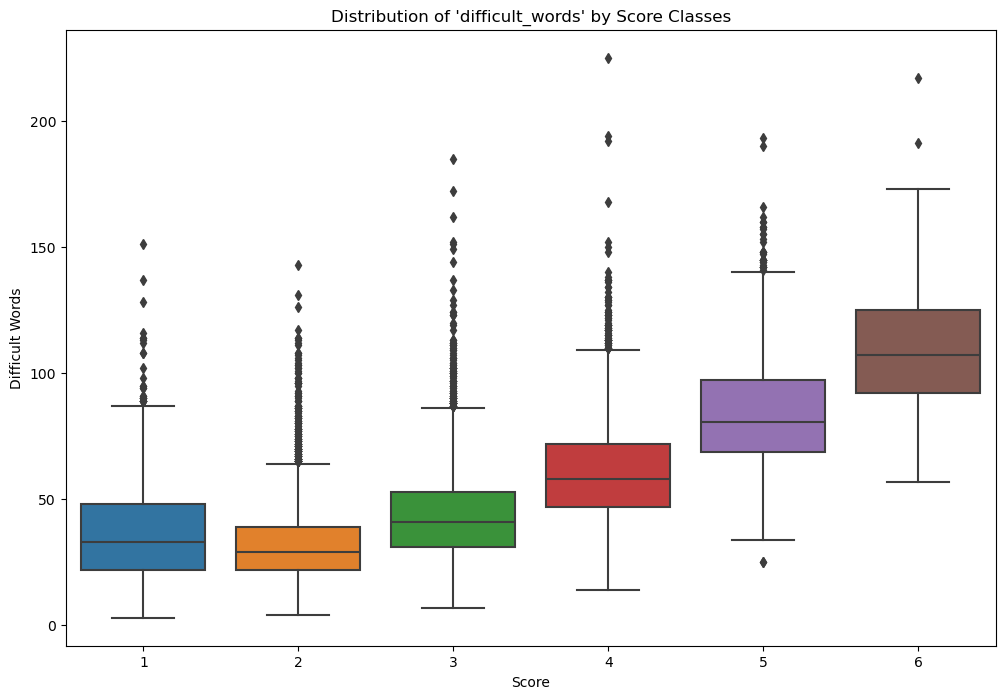

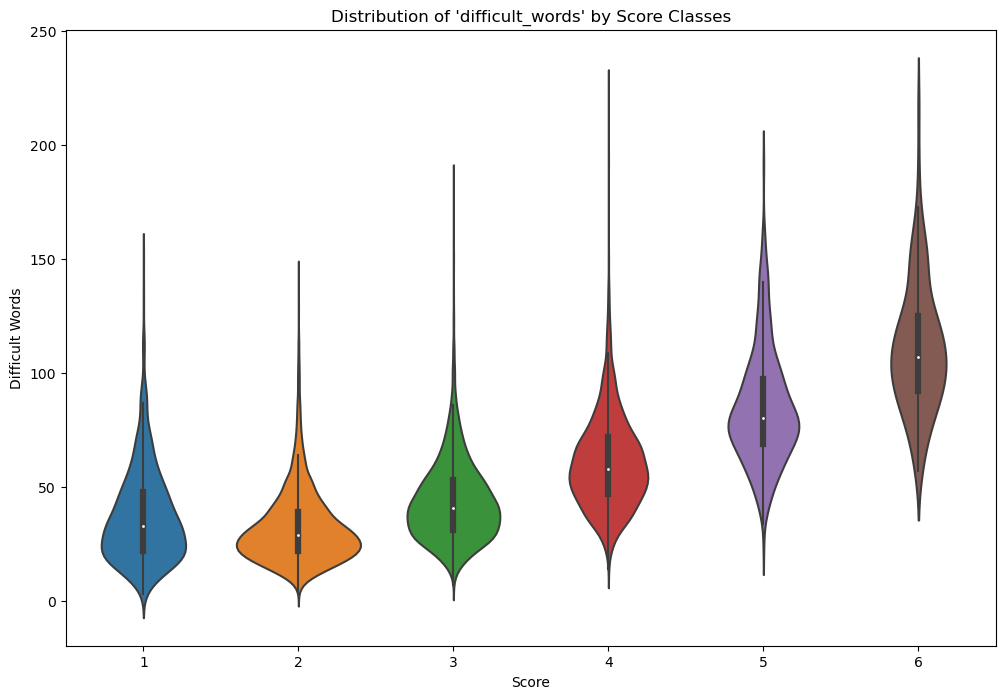

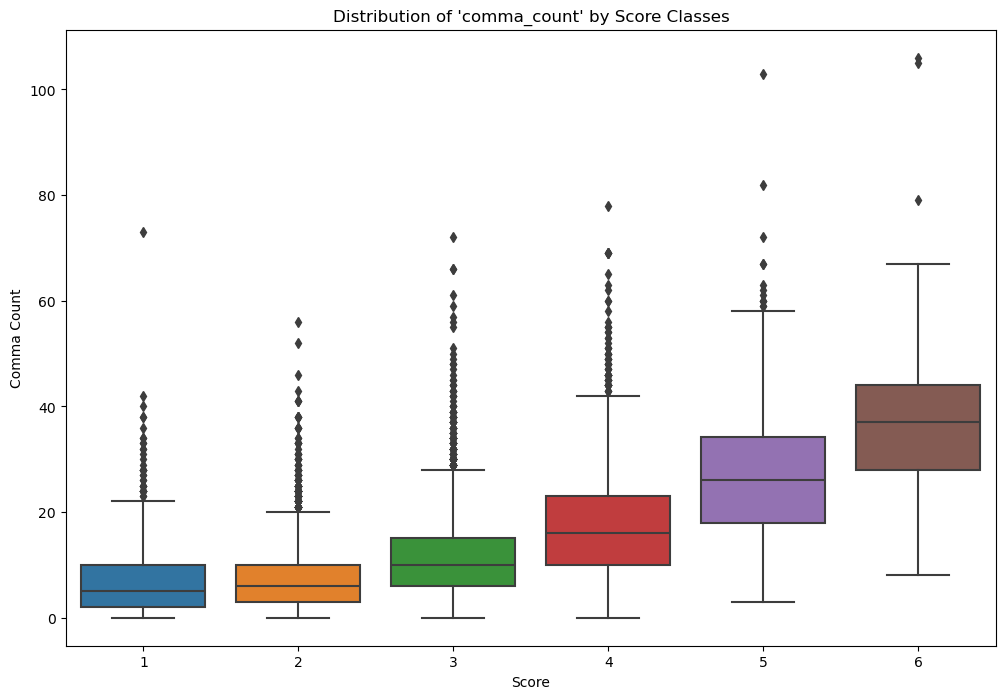

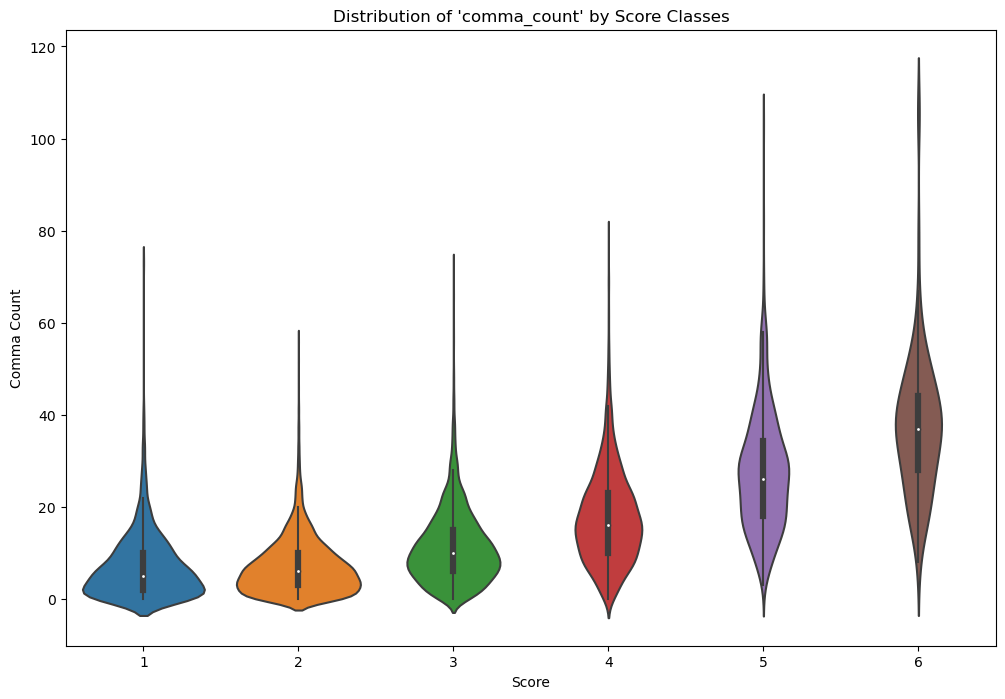

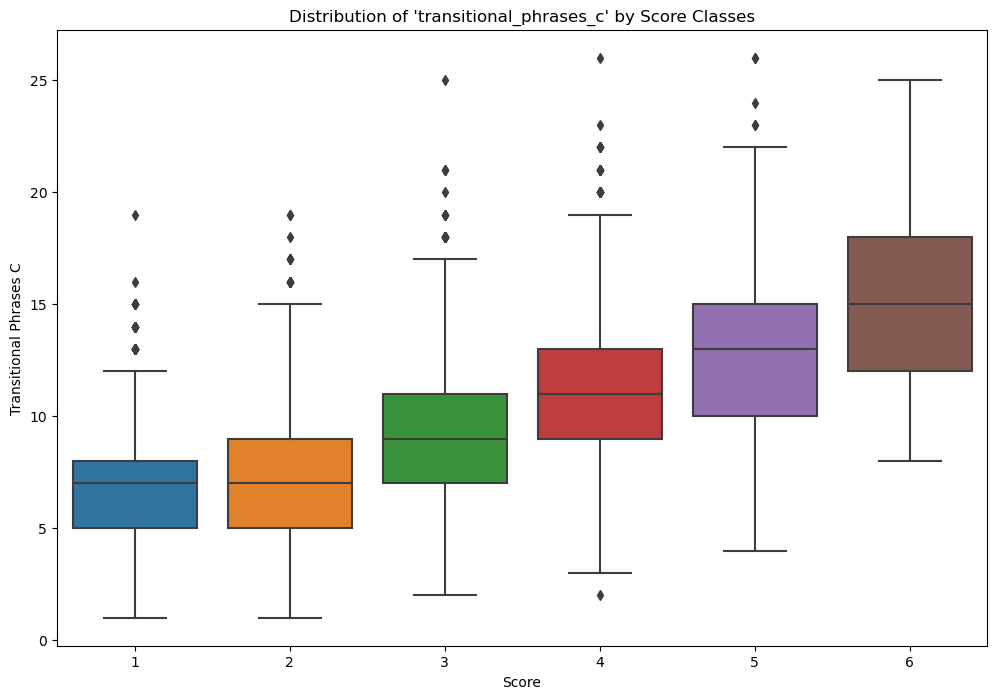

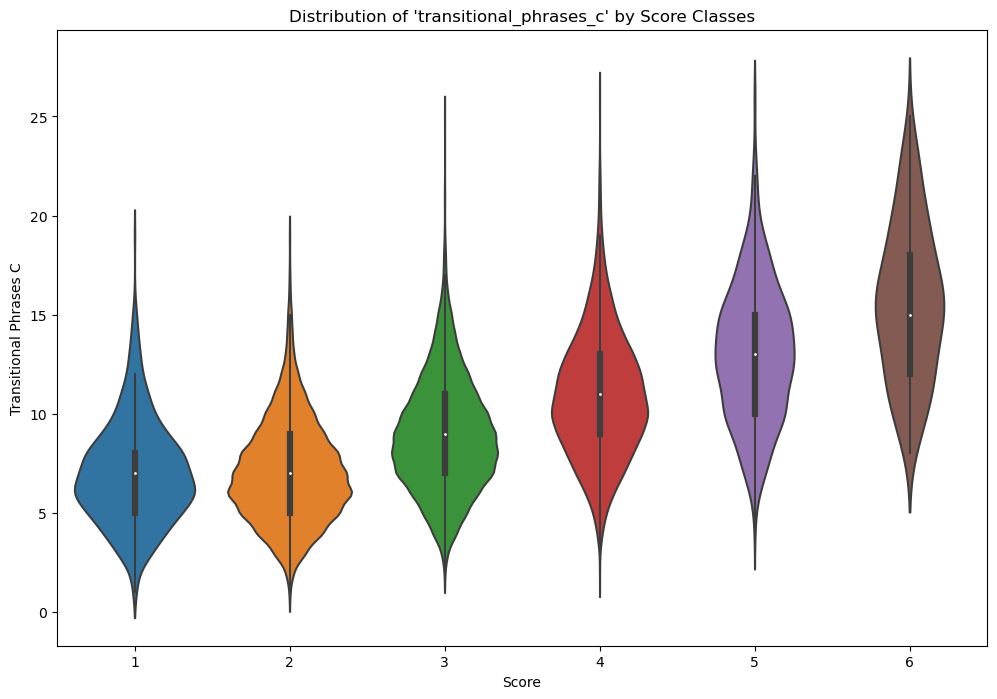

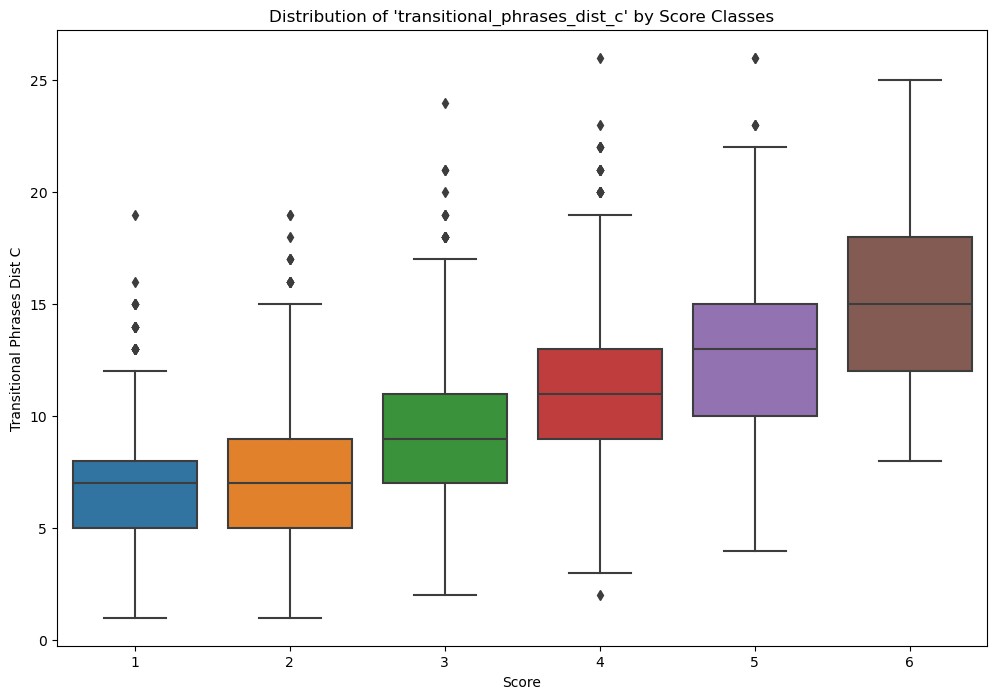

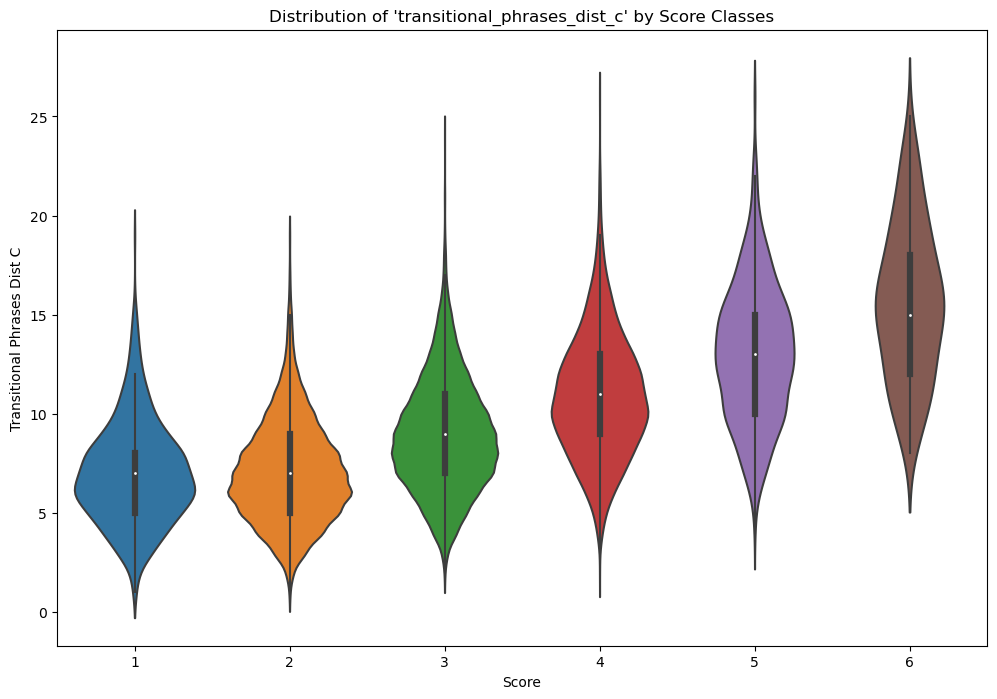

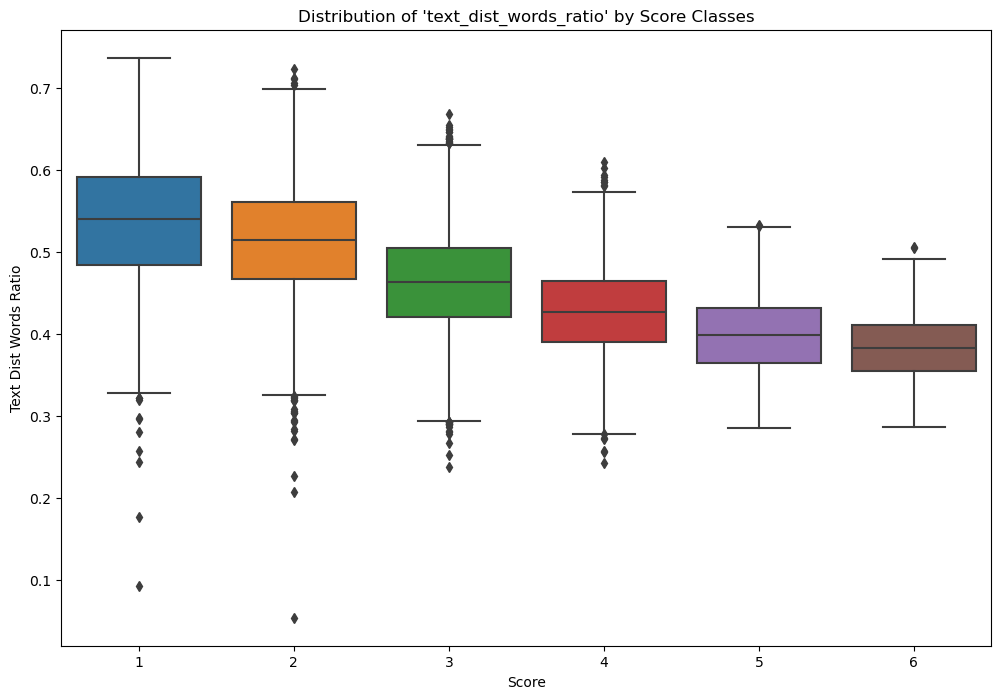

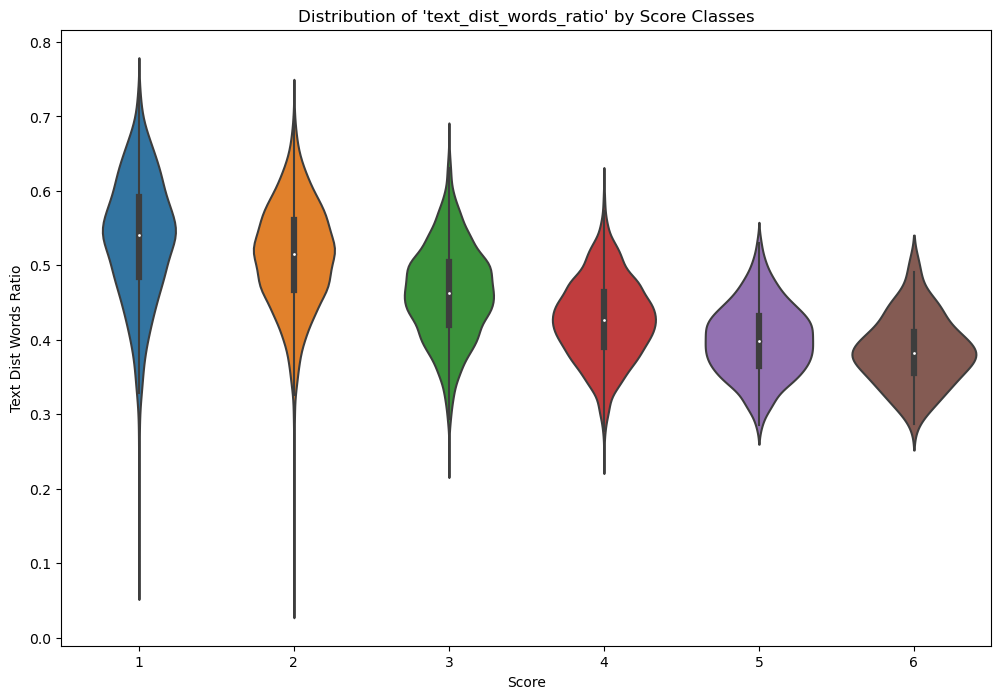

In [18]:
# 1. Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df and f_stat_df are already loaded with the necessary features and target

# List of relevant features with Relevance = High
high_relevance_features = f_stat_df[f_stat_df['Relevance'] == 'High']['Feature'].tolist()

# Function to create and save plots
def plot_feature_by_score(feature):
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='score', y=feature, data=df)
    plt.title(f"Distribution of '{feature}' by Score Classes")
    plt.xlabel("Score")
    plt.ylabel(feature.replace('_', ' ').title())
    # plt.savefig(f'{feature}_boxplot.png')
    plt.show()

    plt.figure(figsize=(12, 8))
    sns.violinplot(x='score', y=feature, data=df)
    plt.title(f"Distribution of '{feature}' by Score Classes")
    plt.xlabel("Score")
    plt.ylabel(feature.replace('_', ' ').title())
    # plt.savefig(f'{feature}_violinplot.png')
    plt.show()

# Plot and save for all high relevance features
for feature in high_relevance_features:
    plot_feature_by_score(feature)


##### Summary of "Syllable Count" Feature Relevance:
The plots show a clear increasing trend in syllable count with higher scores, indicating its relevance for score prediction. The distinction between distributions across score classes suggests that "syllable_count" effectively differentiates scores. The presence of outliers across all score classes highlights the inherent variability in syllable counts within each score group. Overall, "syllable_count" is a valuable feature for predicting scores.

##### Conclusion about "Mistakes Dist Ratio" Feature
The plots illustrate that the "Mistakes Dist Ratio" decreases as the score increases. Higher score classes (4, 5, 6) consistently show lower median values and smaller interquartile ranges for "Mistakes Dist Ratio," indicating fewer distinct mistakes in higher-scoring texts. This feature appears to be relevant for predicting the score, as there is a clear negative trend between the "Mistakes Dist Ratio" and the score classes. The distinct separation between the score classes, particularly between lower and higher scores, highlights its importance in the scoring prediction task.

##### Conclusion about "Transitional Phrases Count" Feature Relevance
The plots indicate that the "Transitional Phrases Count" generally increases with higher score classes. Higher scores (4, 5, 6) exhibit a higher median and interquartile range for this feature compared to lower scores (1, 2, 3). This suggests that texts with higher scores tend to use more transitional phrases. The clear separation between score classes highlights the relevance of "Transitional Phrases Count" in predicting scores.

##### Conclusion about Highly Relevant Features
We analyzed the plots for all features categorized as having high relevance. The trends observed from the violin and box plots indicate that these features either increase or decrease consistently with the score classes, which supports their relevance in score prediction. Overall, the consistent trends (either increasing or decreasing) across score classes for these highly relevant features reinforce their significance in the scoring prediction task.

E.g.

1. **Syllable Count**: The syllable count increases with higher scores, effectively differentiating between score classes. This indicates its strong relevance for predicting scores.
2. **Mistakes Dist Ratio**: The mistakes dist ratio shows a clear decreasing trend with higher scores, suggesting that texts with fewer distinct mistakes tend to have higher scores.
3. **Transitional Phrases Count**: Higher scores are associated with a greater number of transitional phrases, highlighting the importance of this feature in score prediction.




### Analysis of Features with Medium Relevance

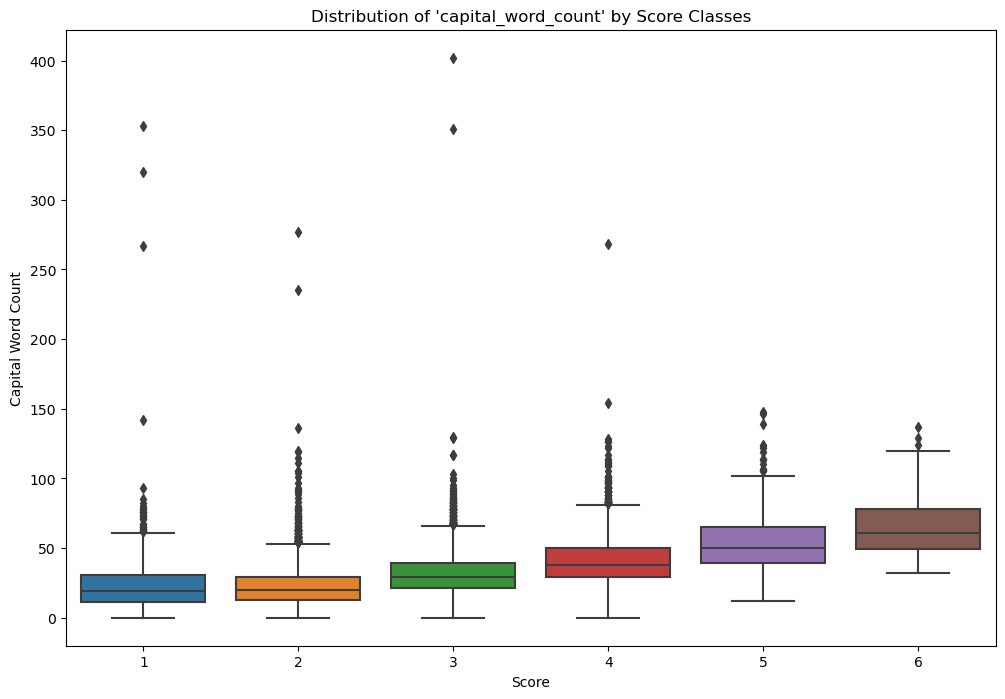

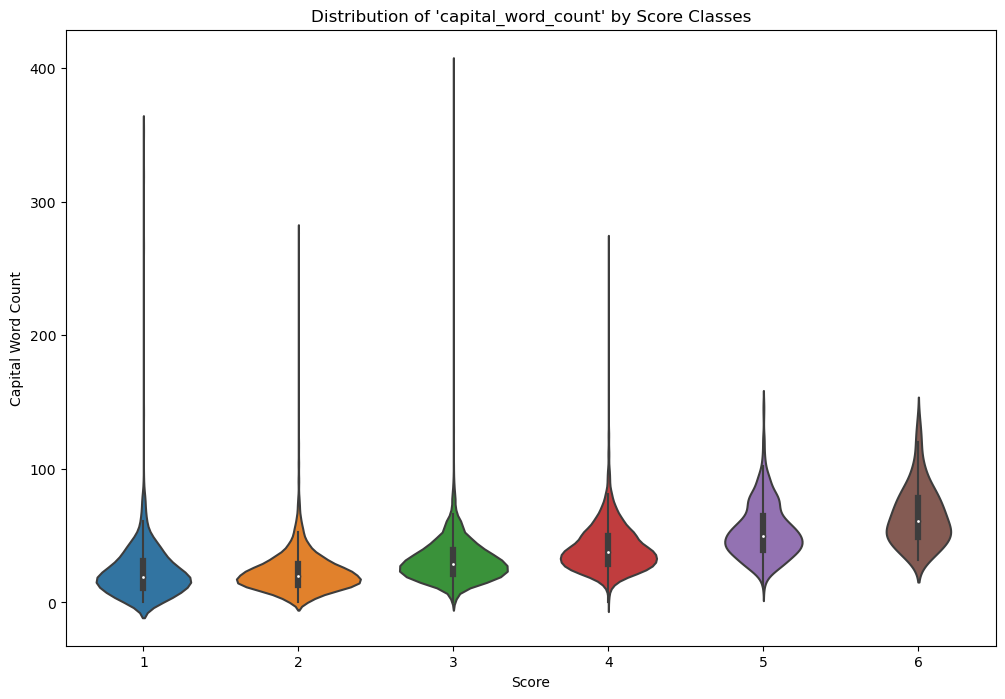

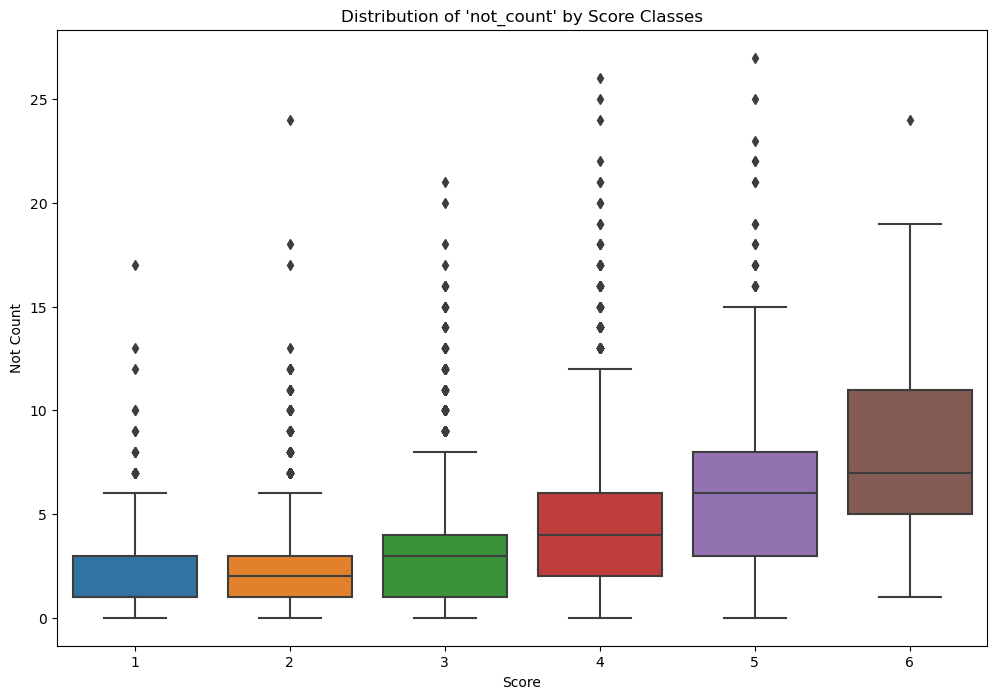

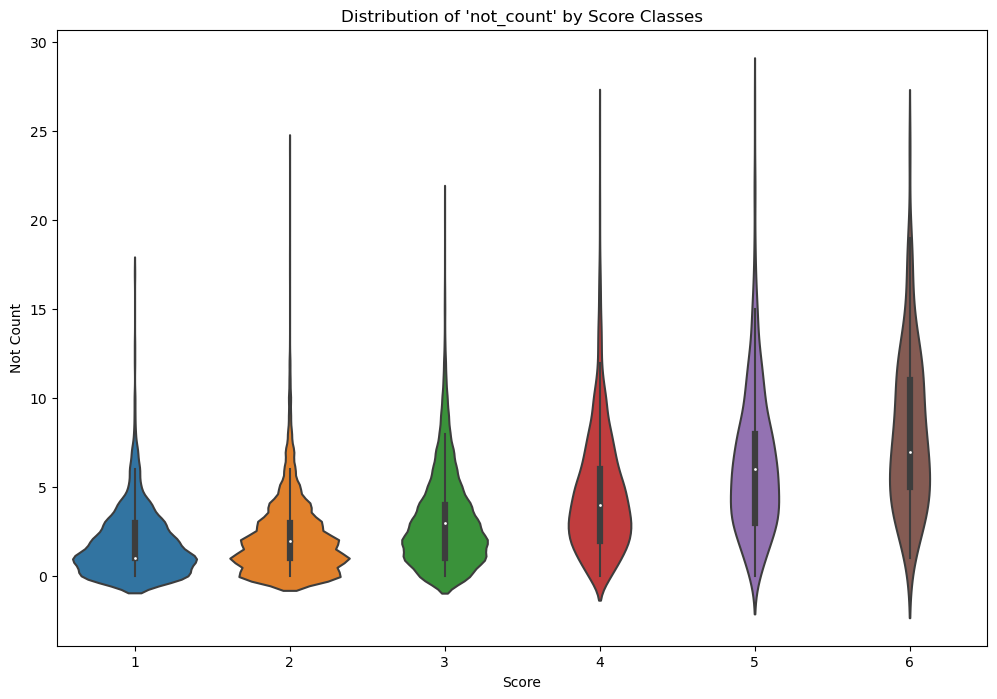

In [21]:
# 1. Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df and f_stat_df are already loaded with the necessary features and target

# List of relevant features with Relevance = High
medium_relevance_features = f_stat_df[f_stat_df['Relevance'] == 'Medium']['Feature'].tolist()

# Function to create and save plots
def plot_feature_by_score(feature):
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='score', y=feature, data=df)
    plt.title(f"Distribution of '{feature}' by Score Classes")
    plt.xlabel("Score")
    plt.ylabel(feature.replace('_', ' ').title())
    #plt.savefig(f'{feature}_boxplot.png')
    plt.show()

    plt.figure(figsize=(12, 8))
    sns.violinplot(x='score', y=feature, data=df)
    plt.title(f"Distribution of '{feature}' by Score Classes")
    plt.xlabel("Score")
    plt.ylabel(feature.replace('_', ' ').title())
    #plt.savefig(f'{feature}_violinplot.png')
    plt.show()

# Plot and save for all high relevance features
for feature in medium_relevance_features:
    plot_feature_by_score(feature)


##### Conclusion about **Not Count** Feature
The "not_count" feature shows a slight increasing trend across score classes, with higher scores having higher median values. However, the presence of outliers across all score classes indicates variability, suggesting that while this feature has some relevance, it is not a strong predictor of score differences on its own.

#### Conclusion about Medium Relevant Features
Overall, features with medium relevance display some level of differentiation across score classes but are characterized by significant variability and outliers. These features might be useful in combination with other features but are not strong predictors individually.

### Analysis of Features with Low Relevance

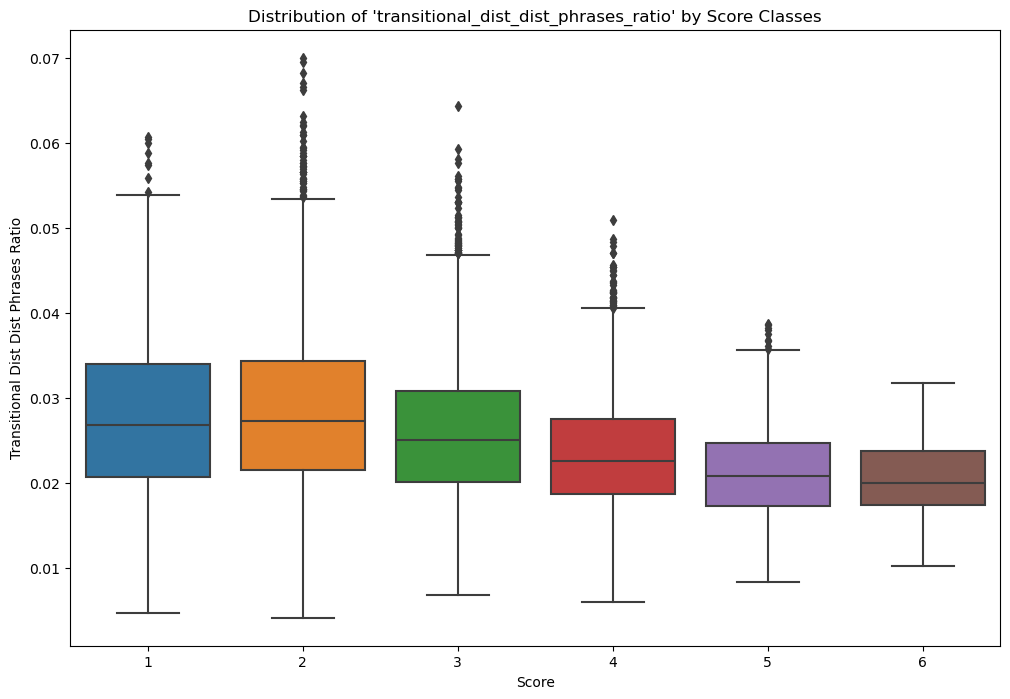

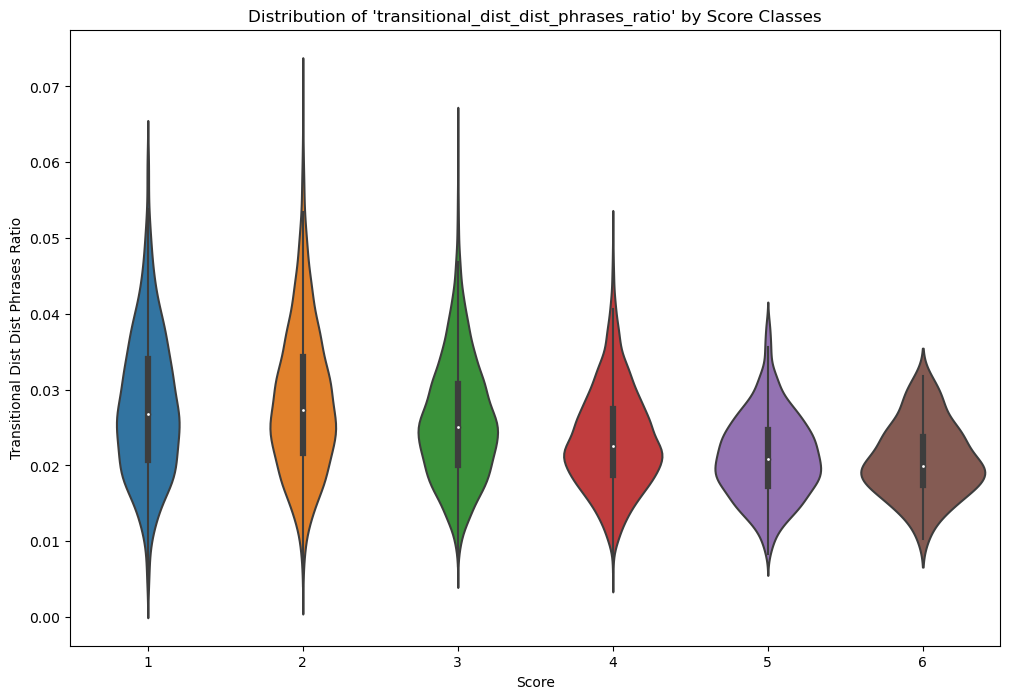

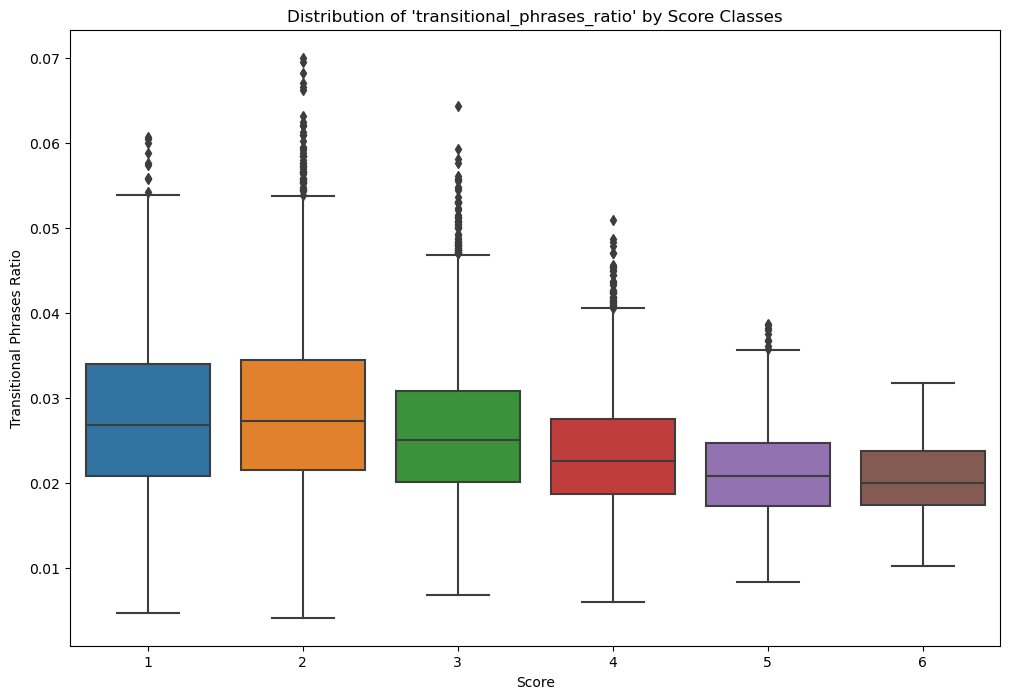

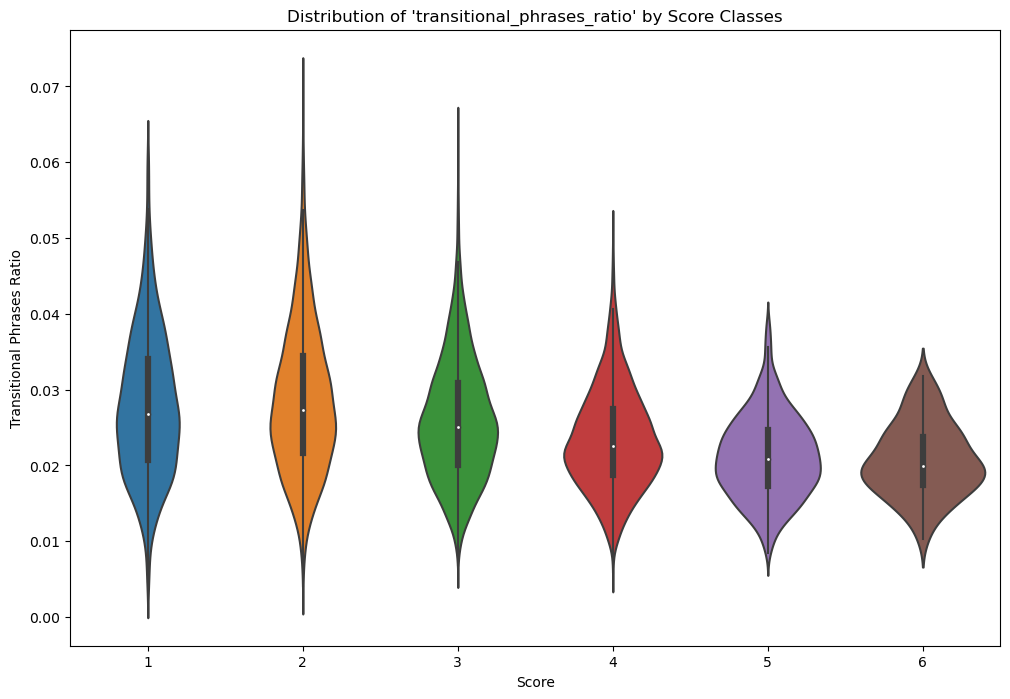

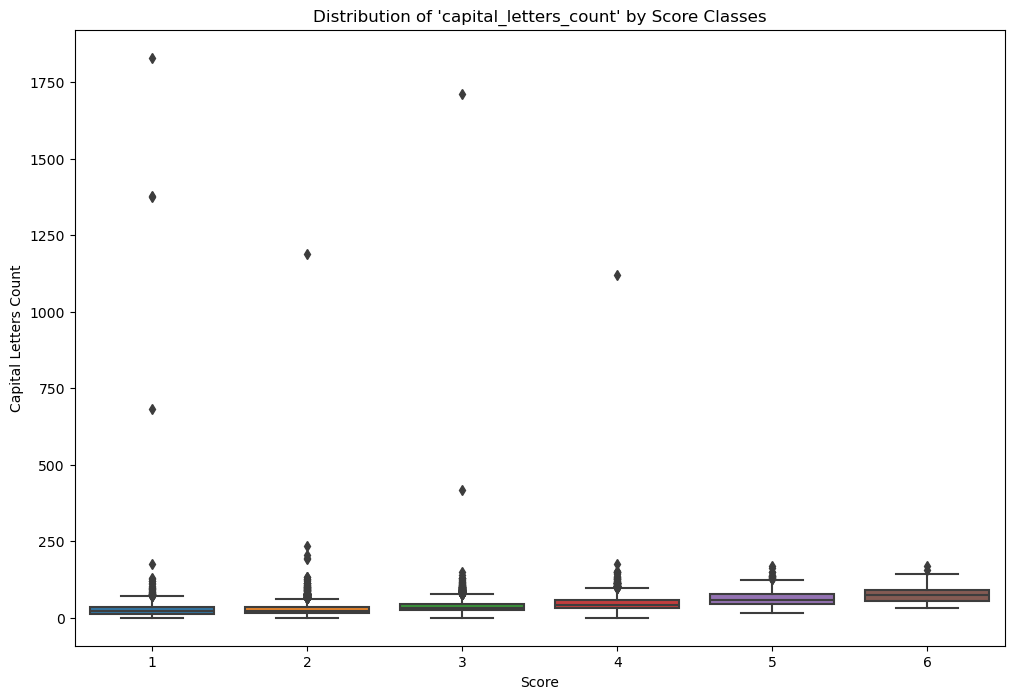

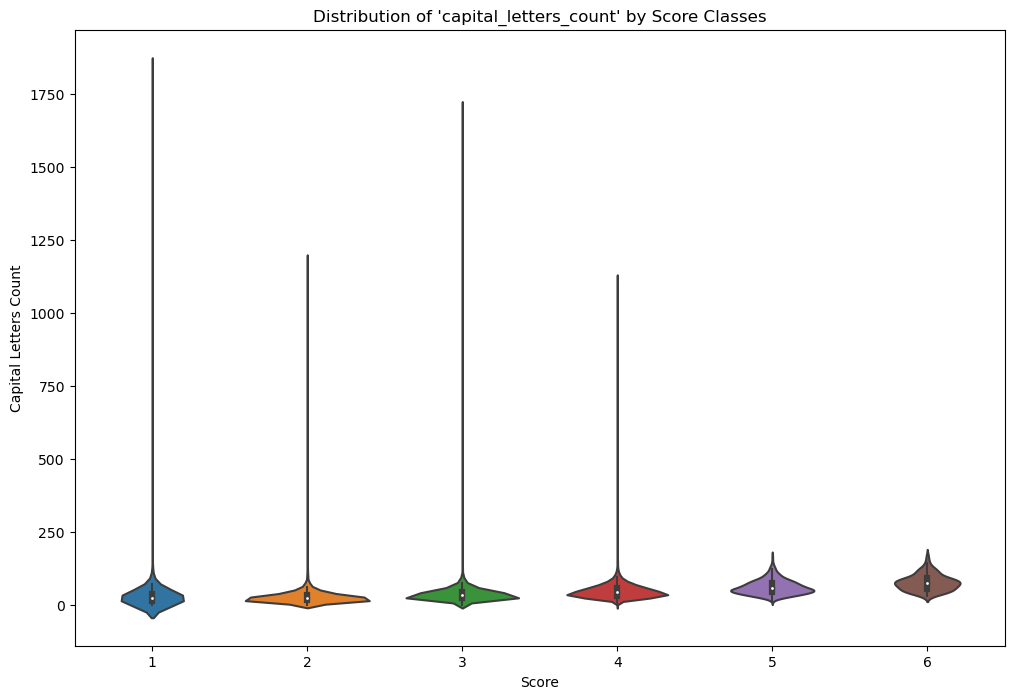

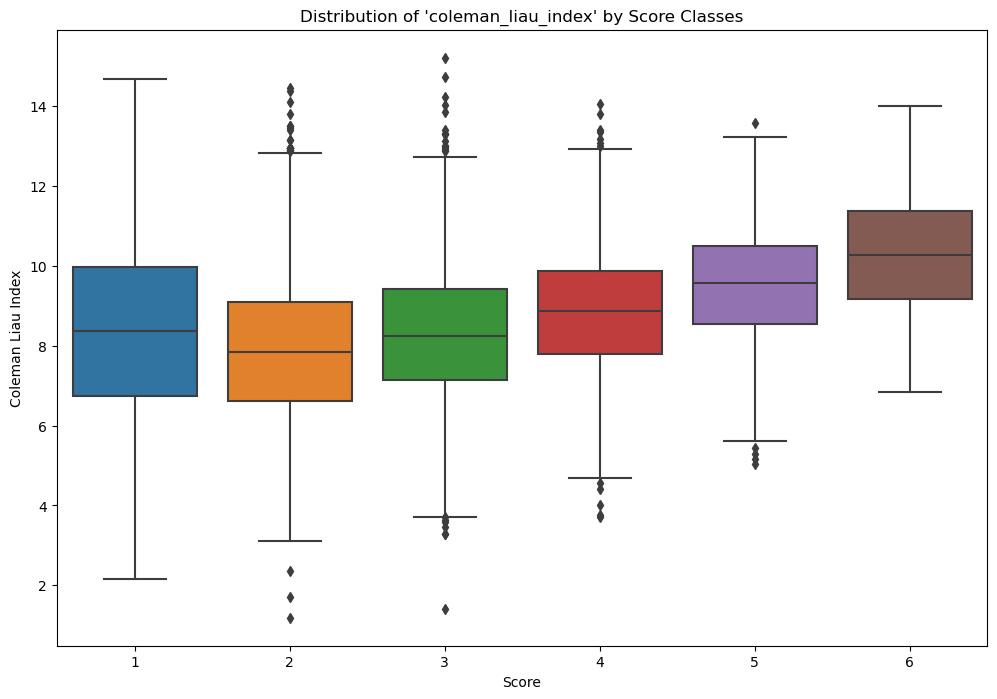

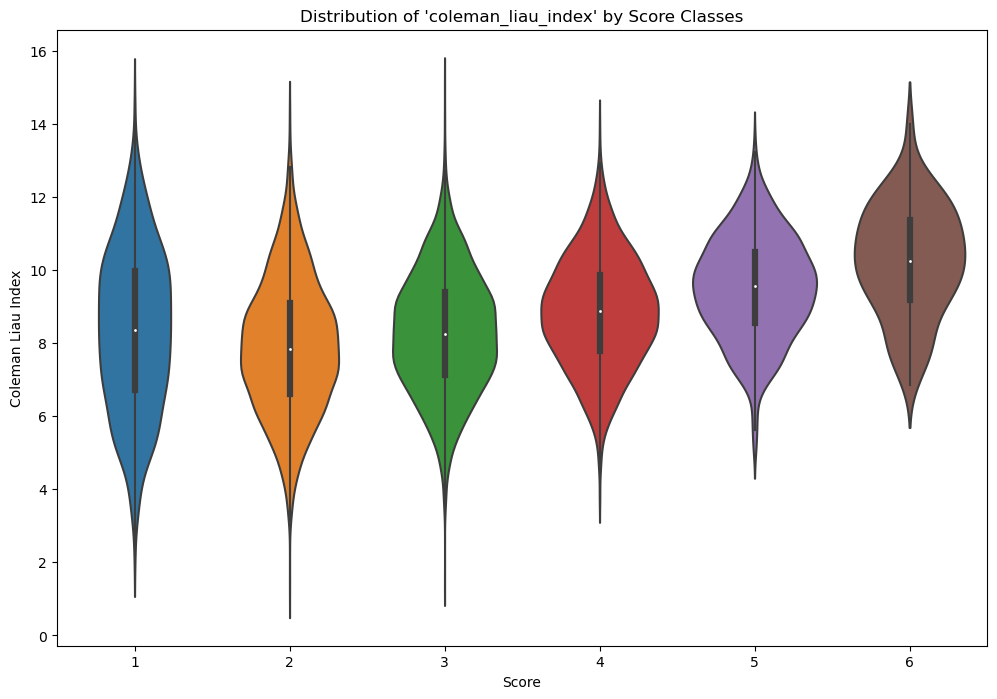

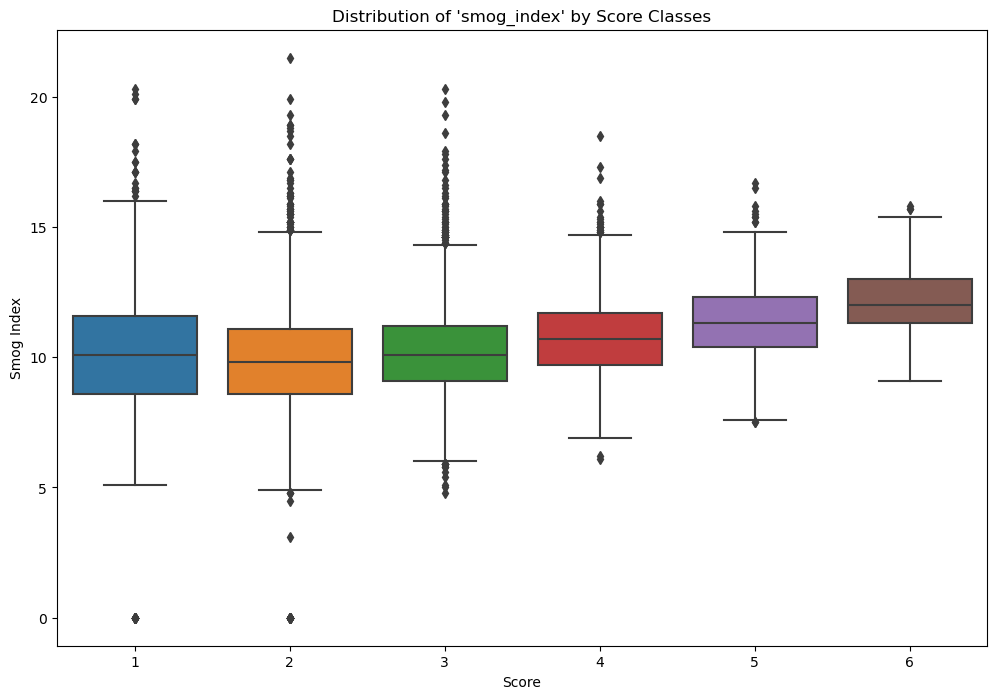

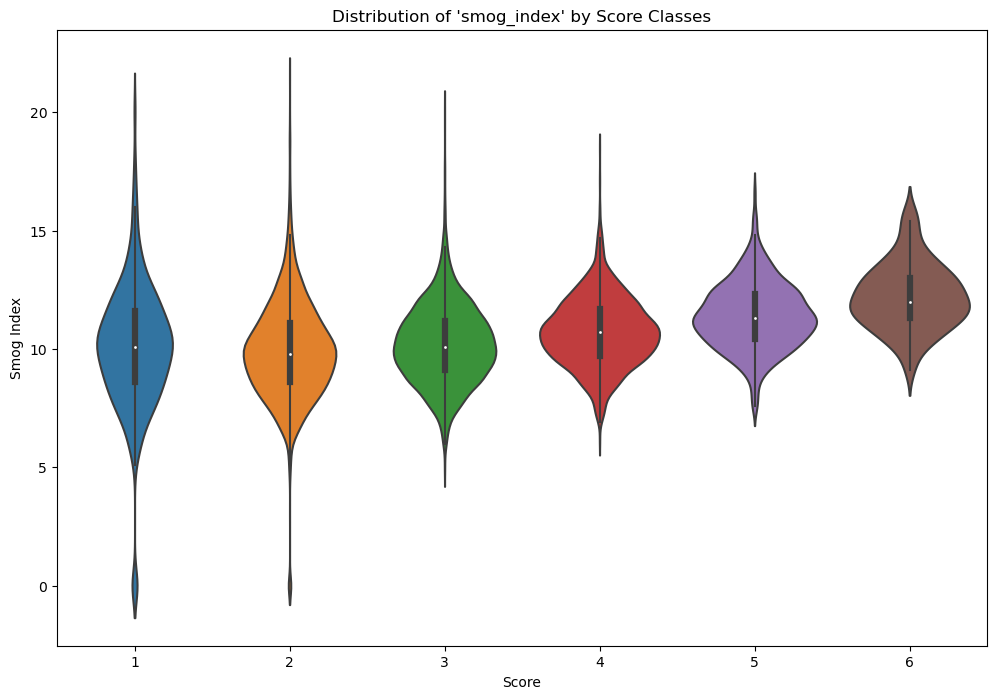

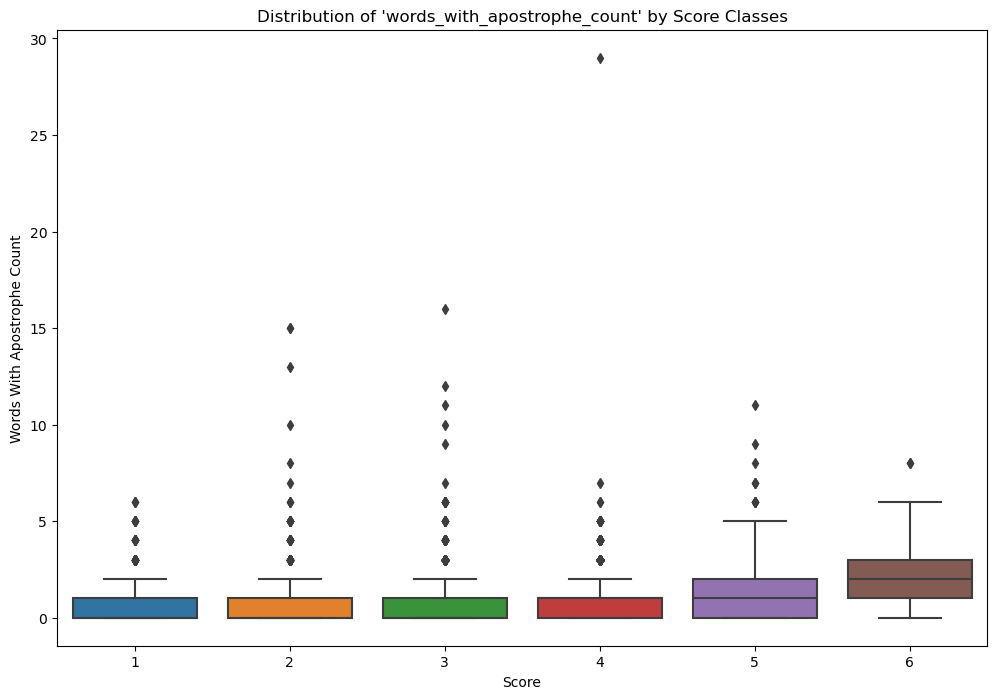

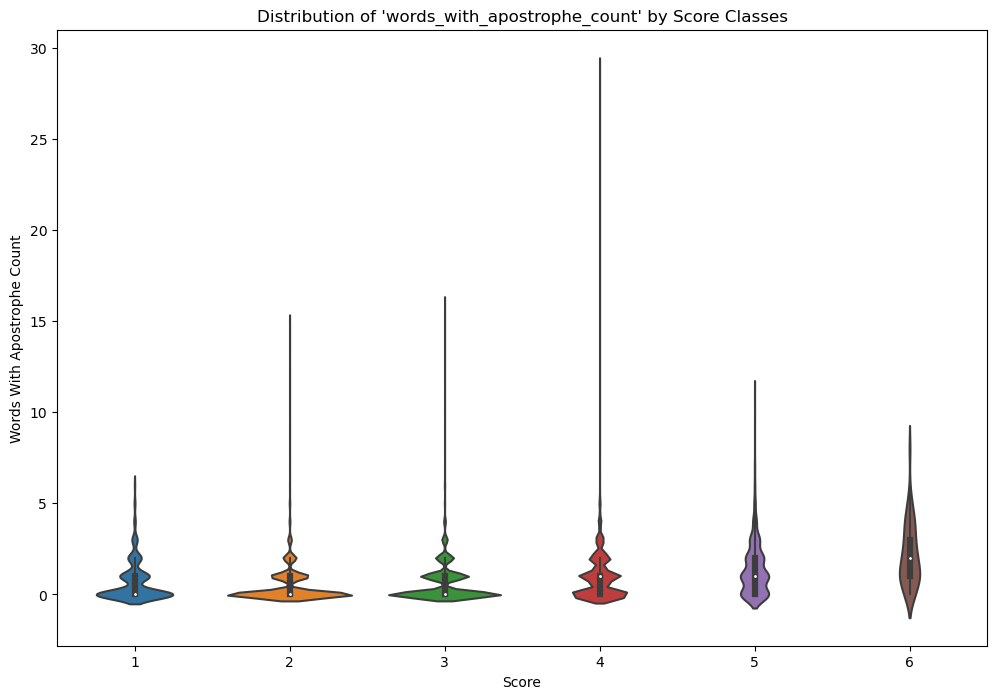

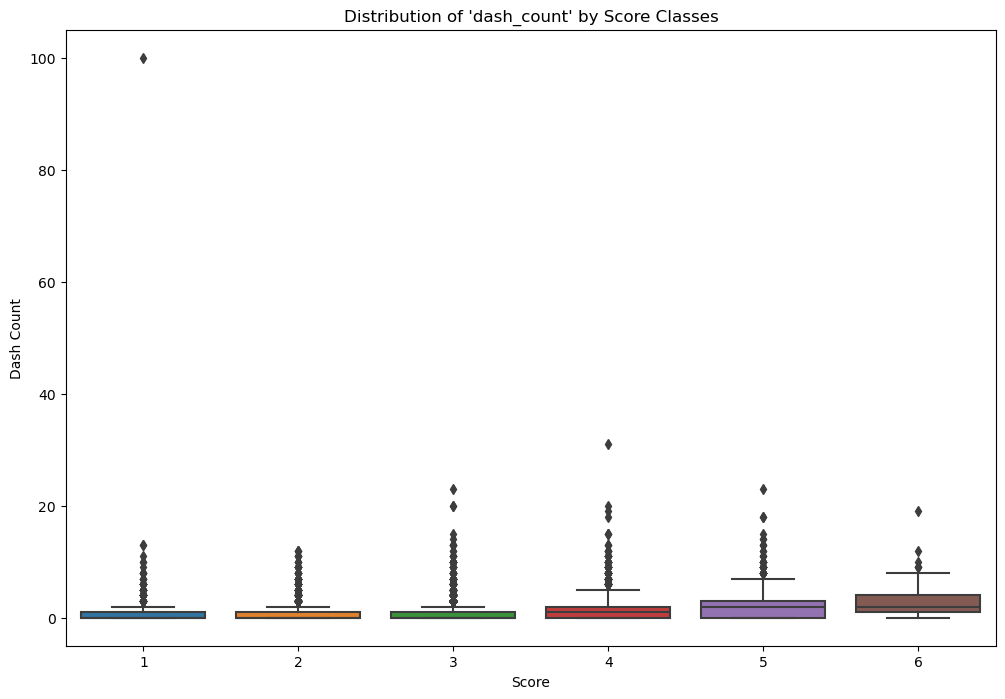

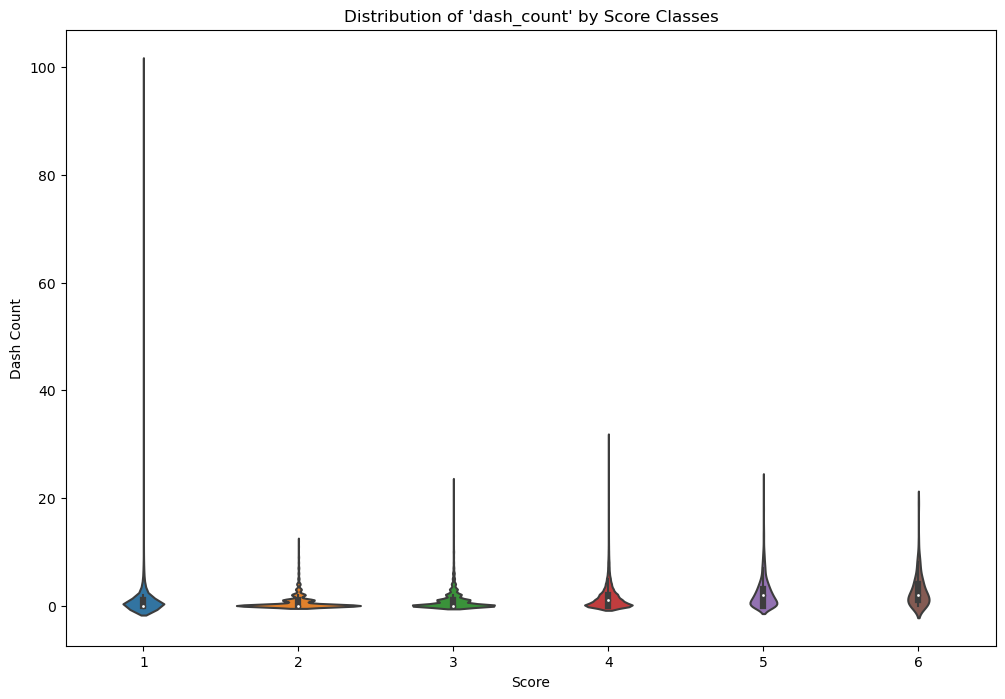

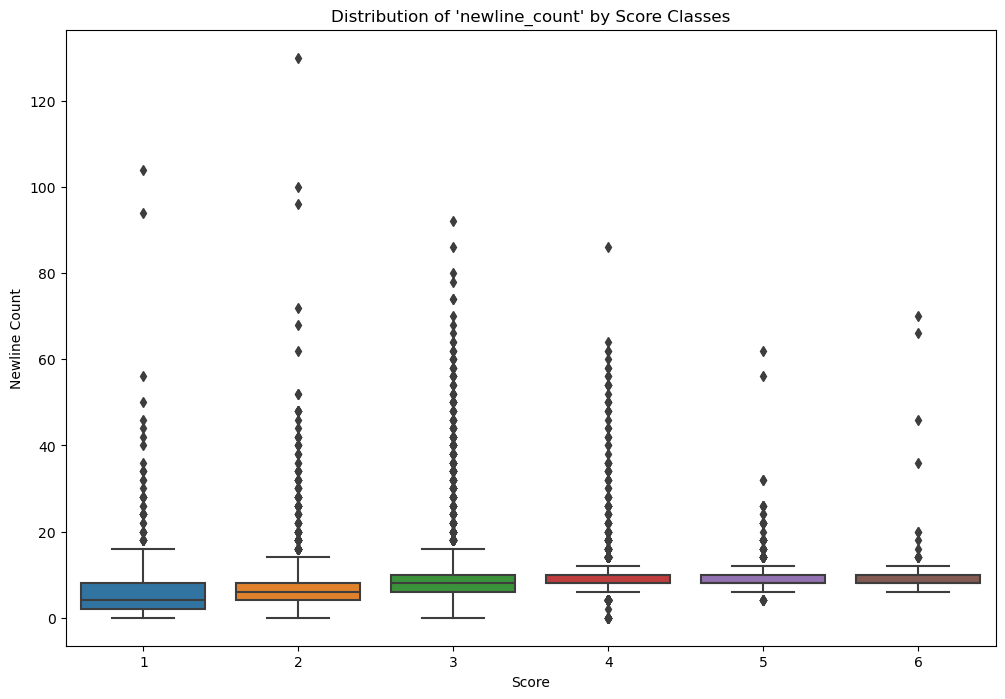

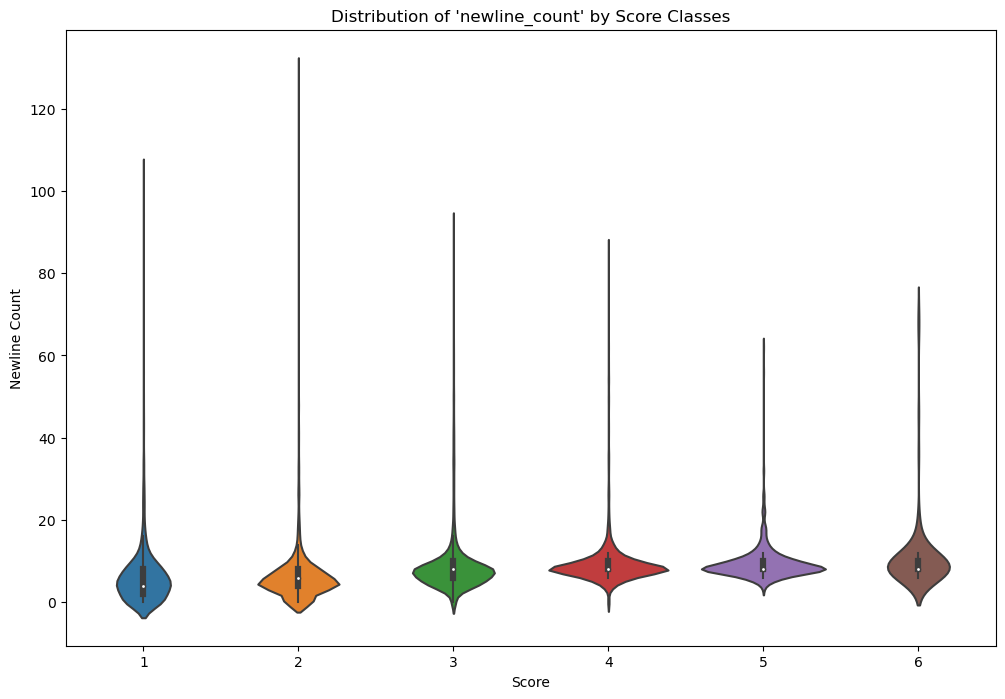

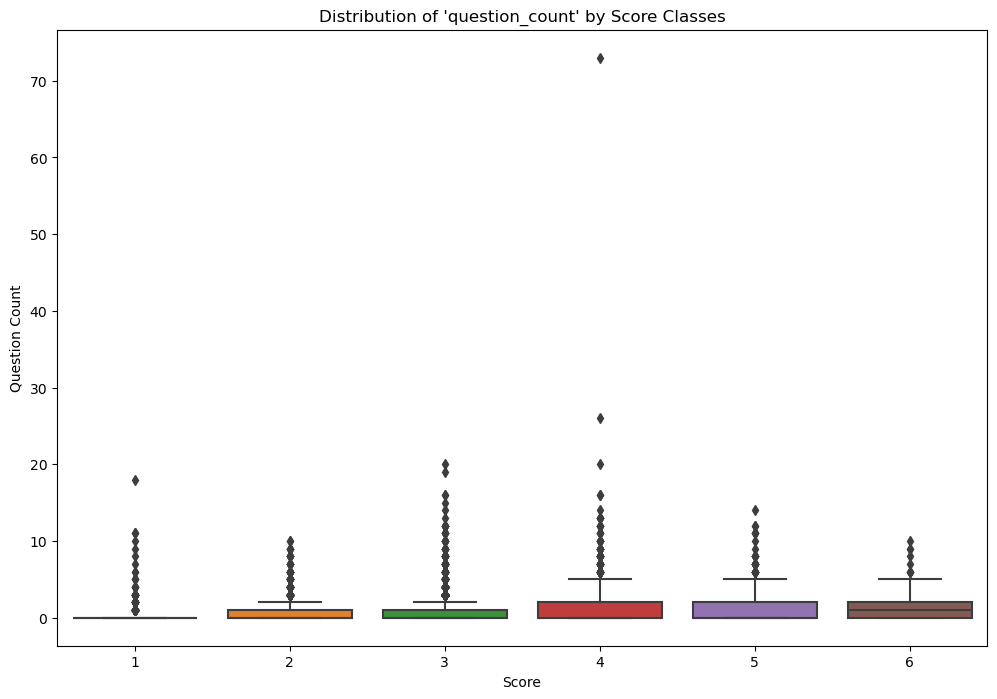

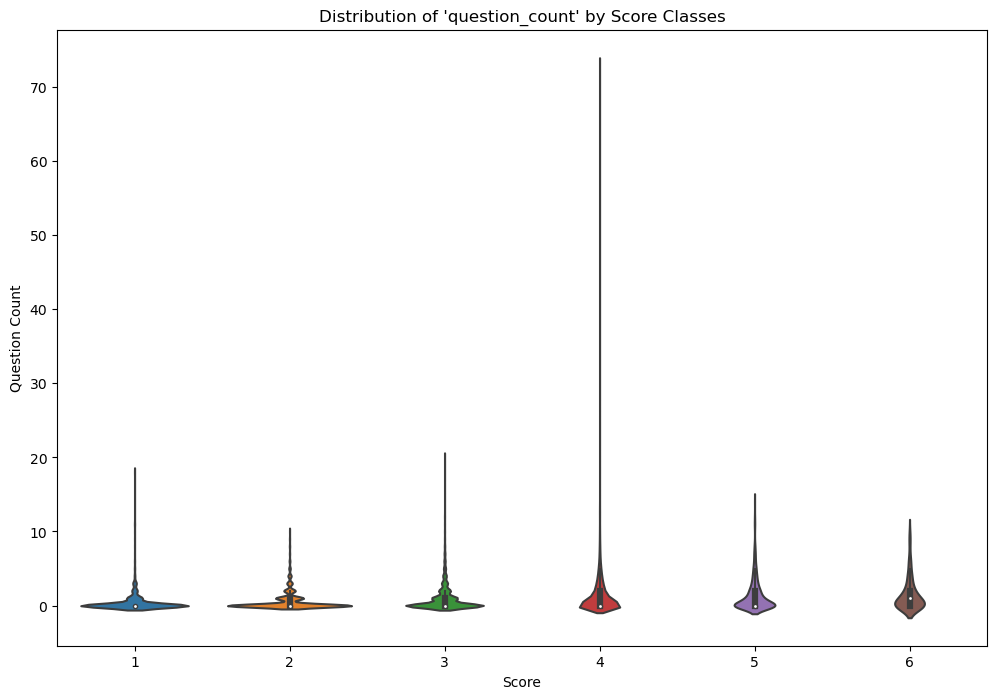

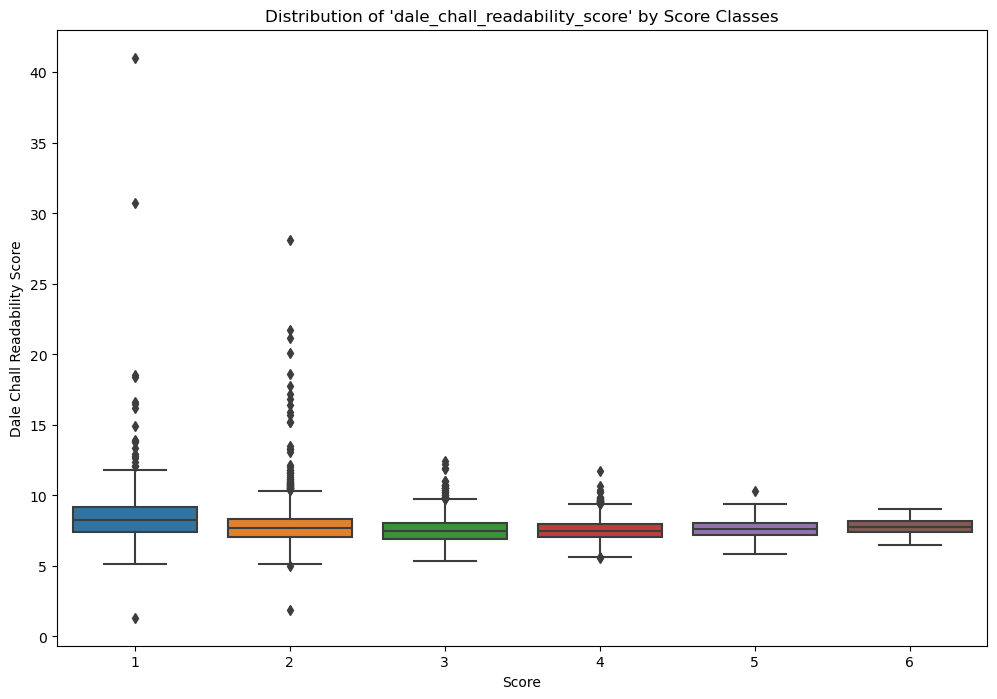

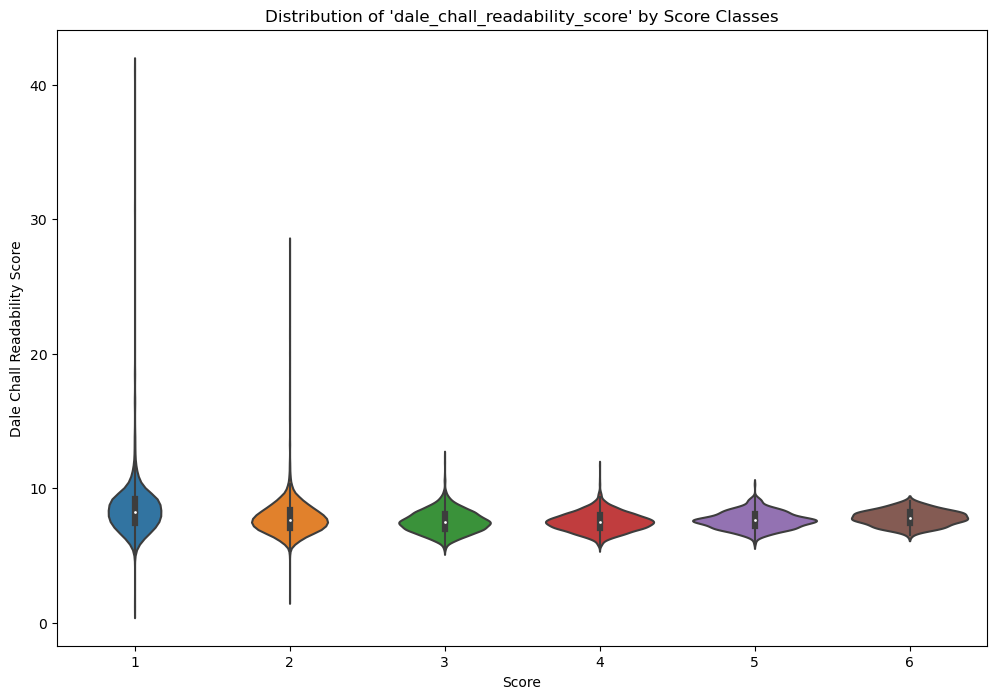

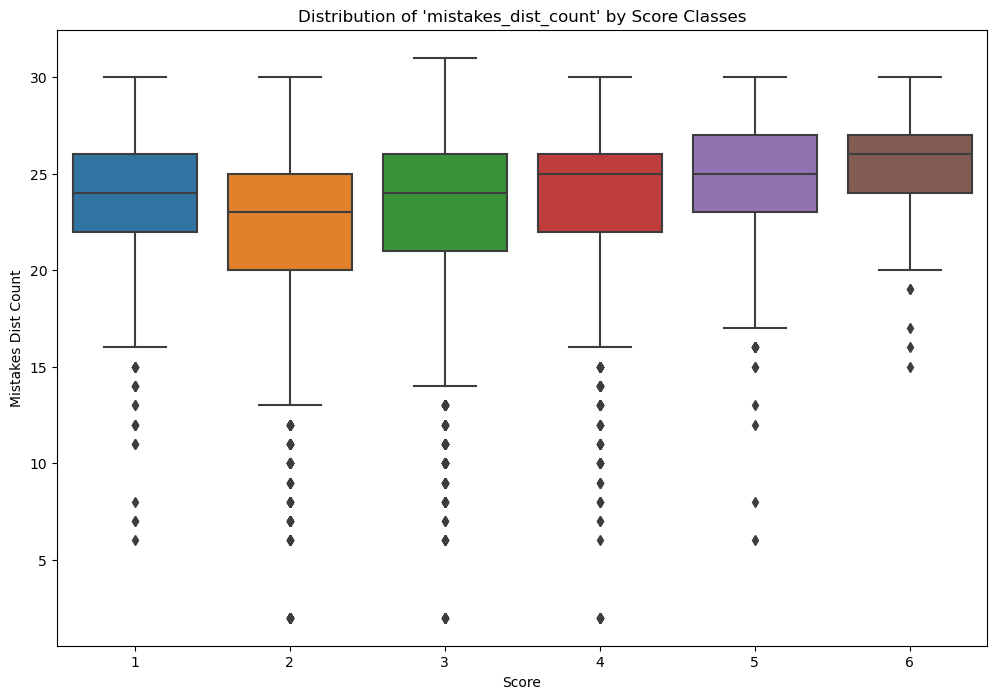

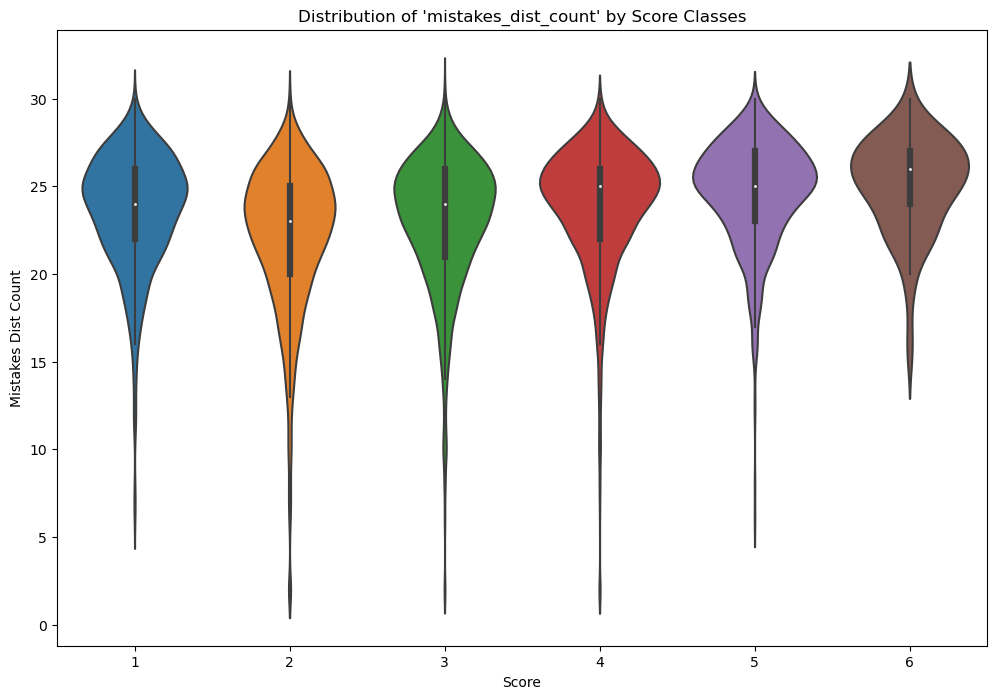

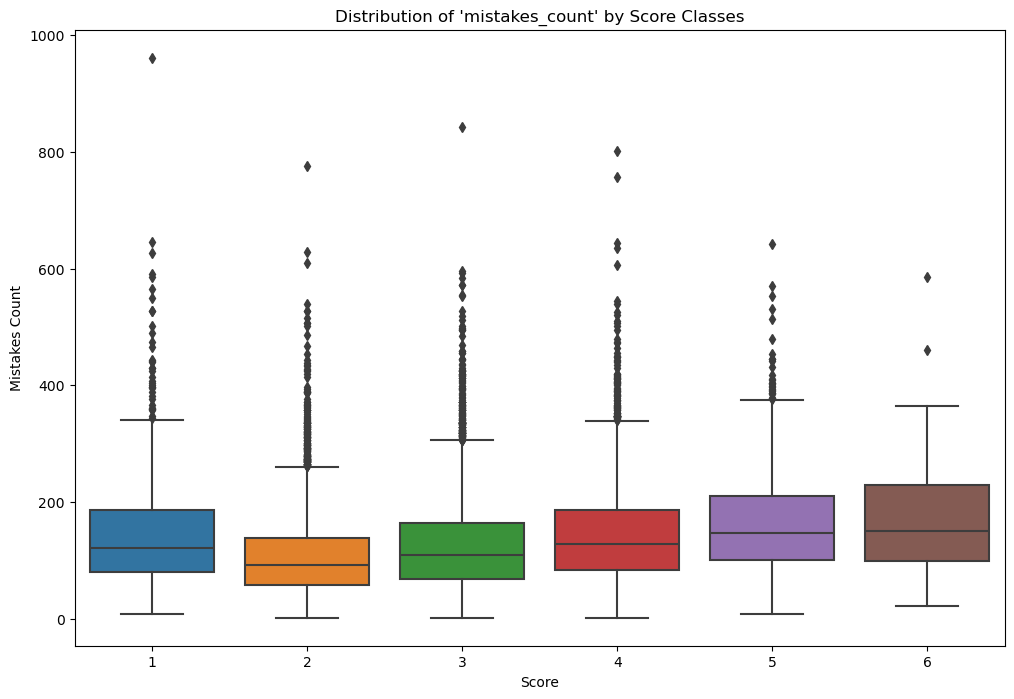

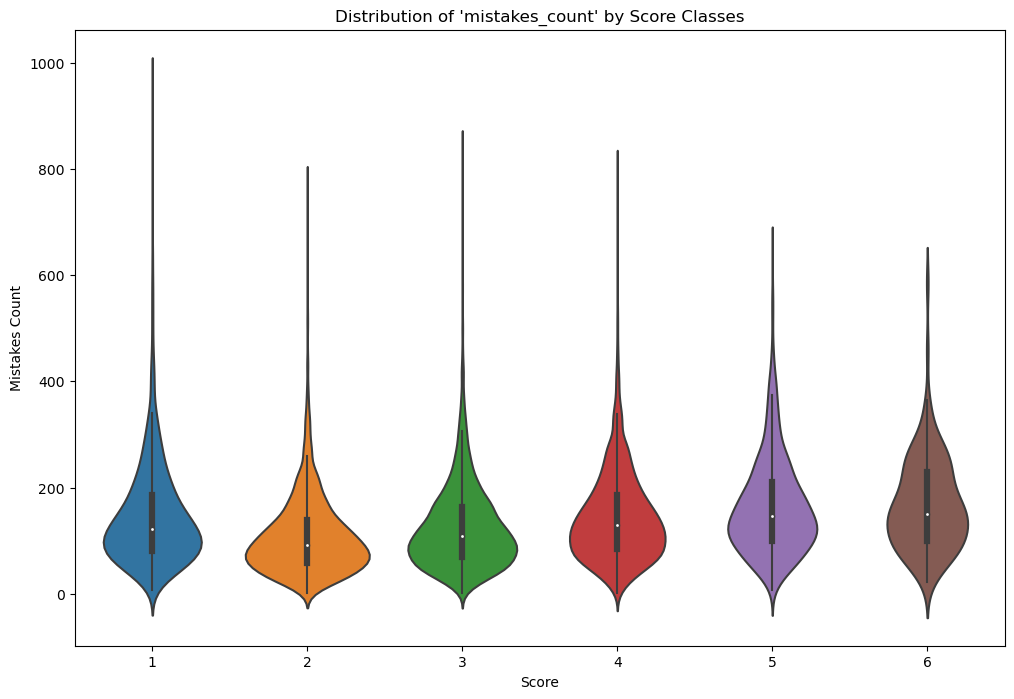

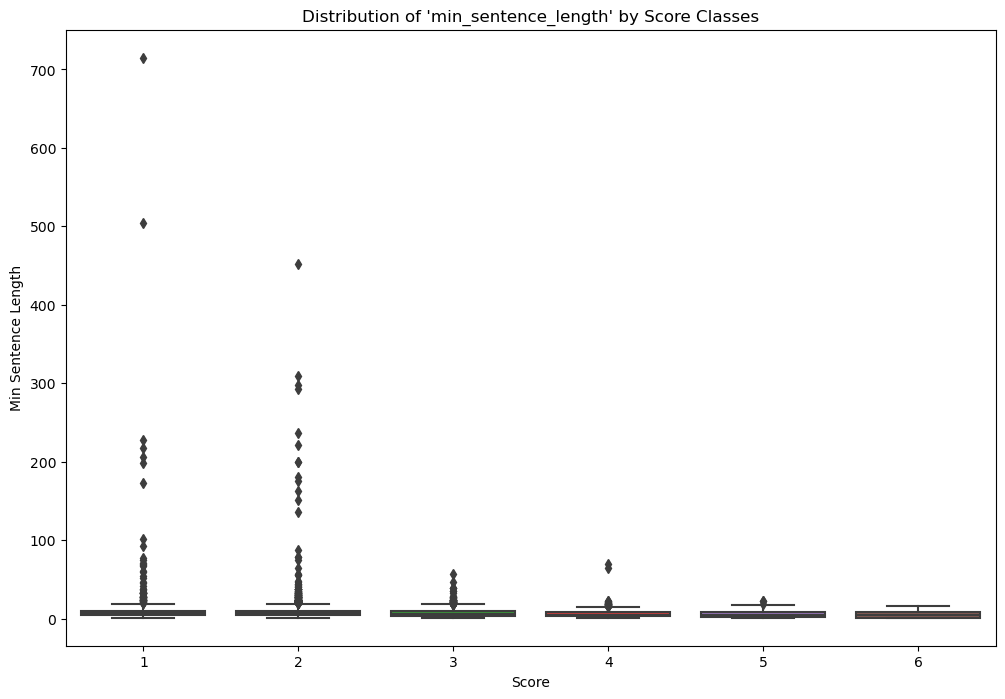

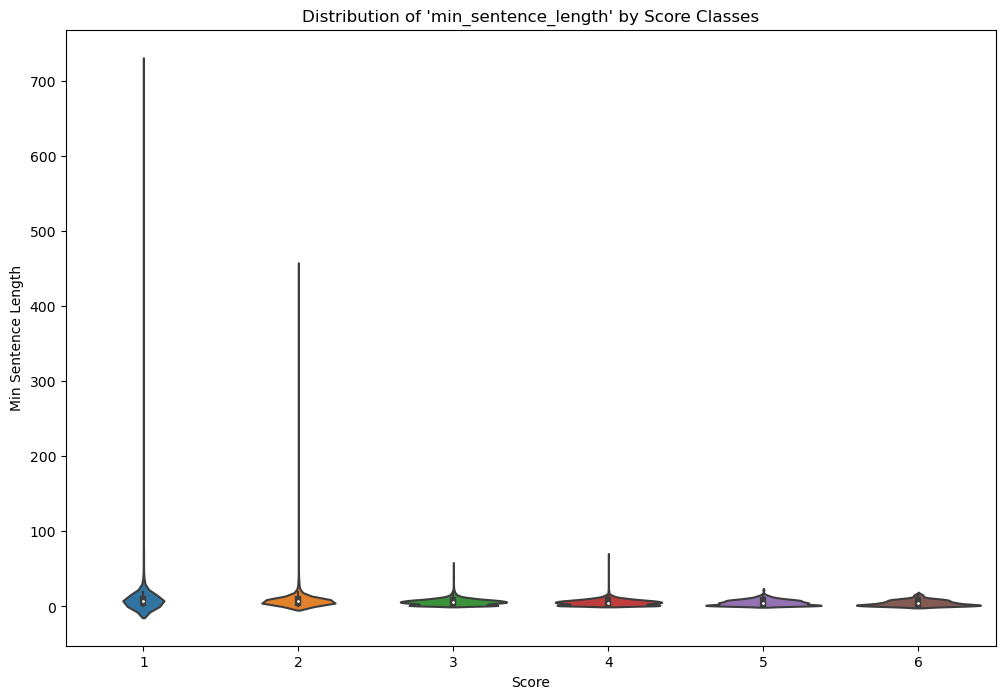

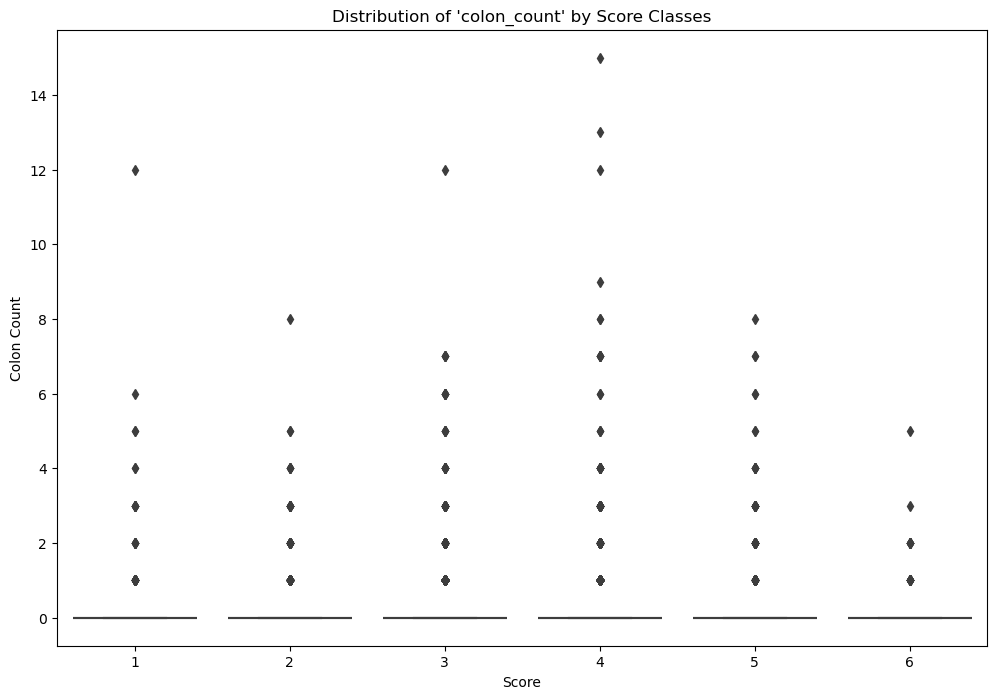

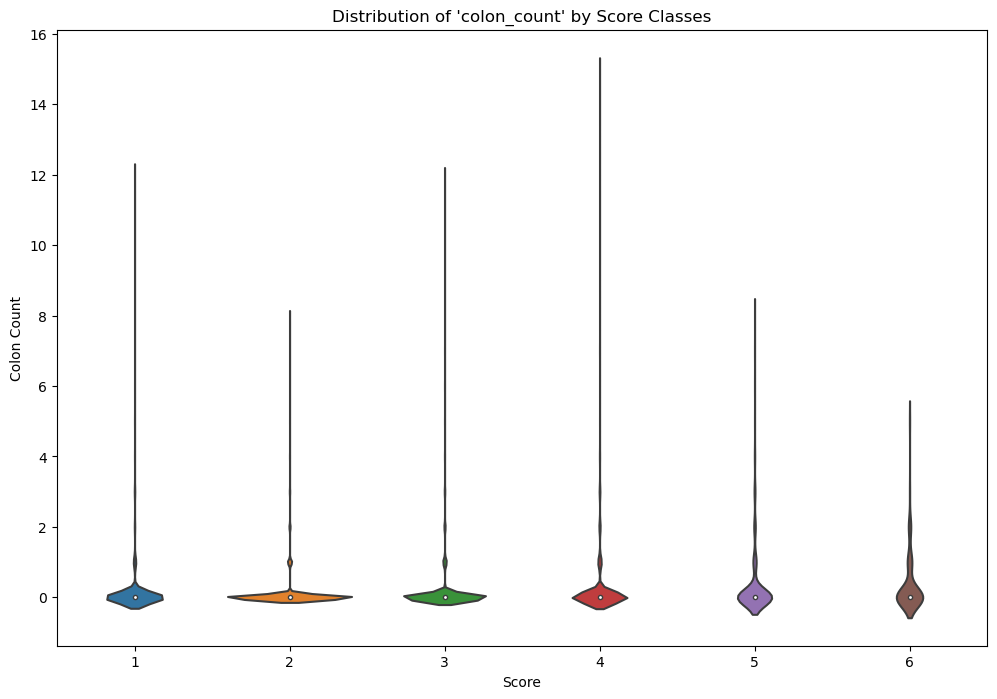

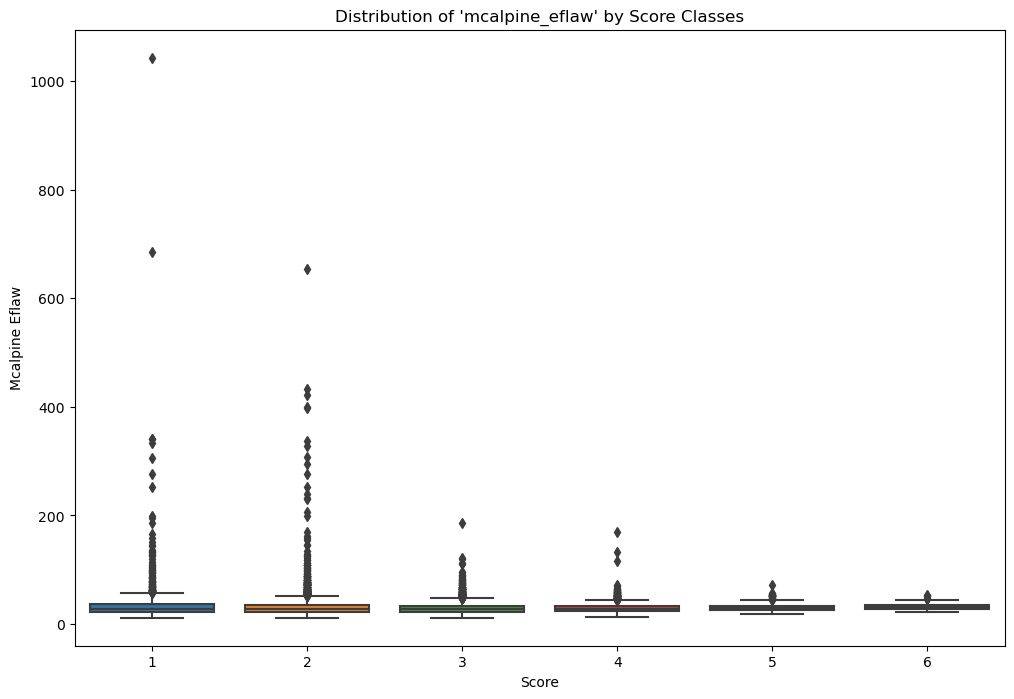

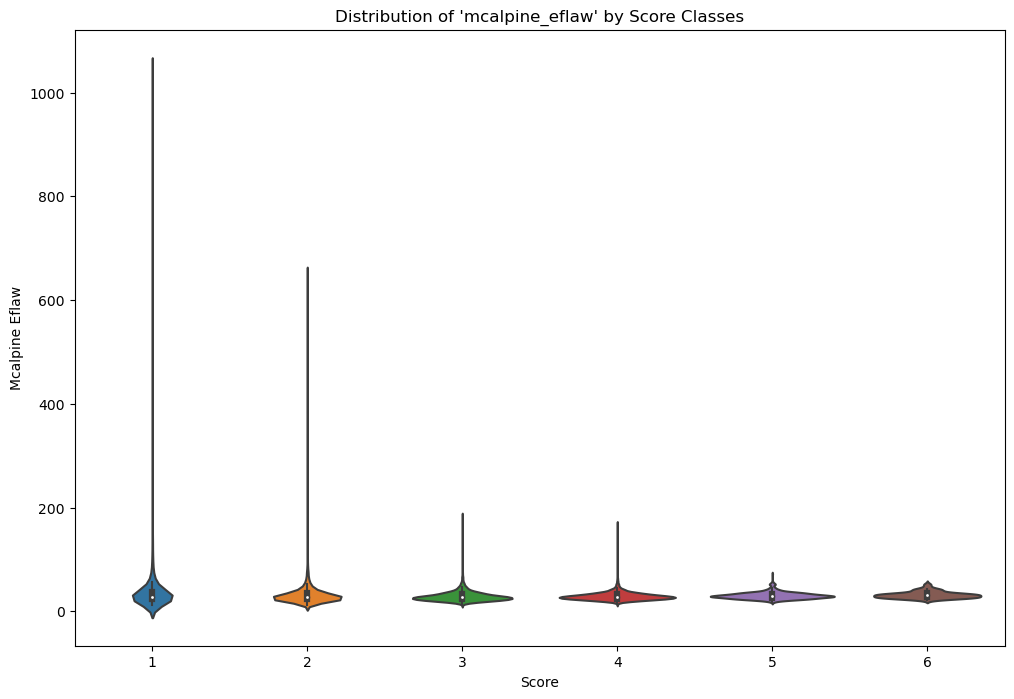

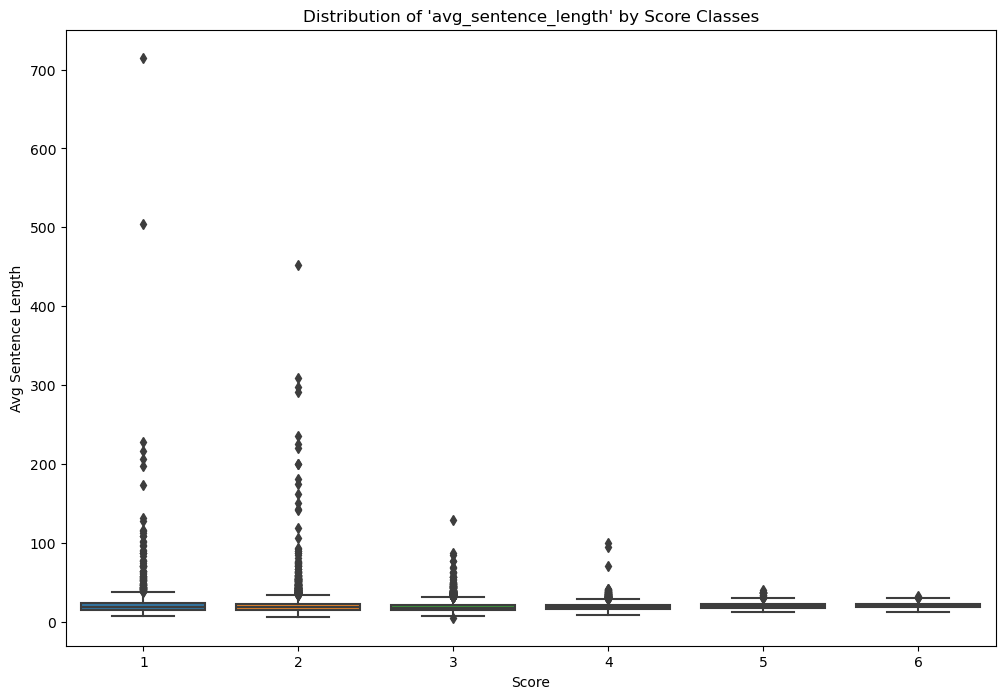

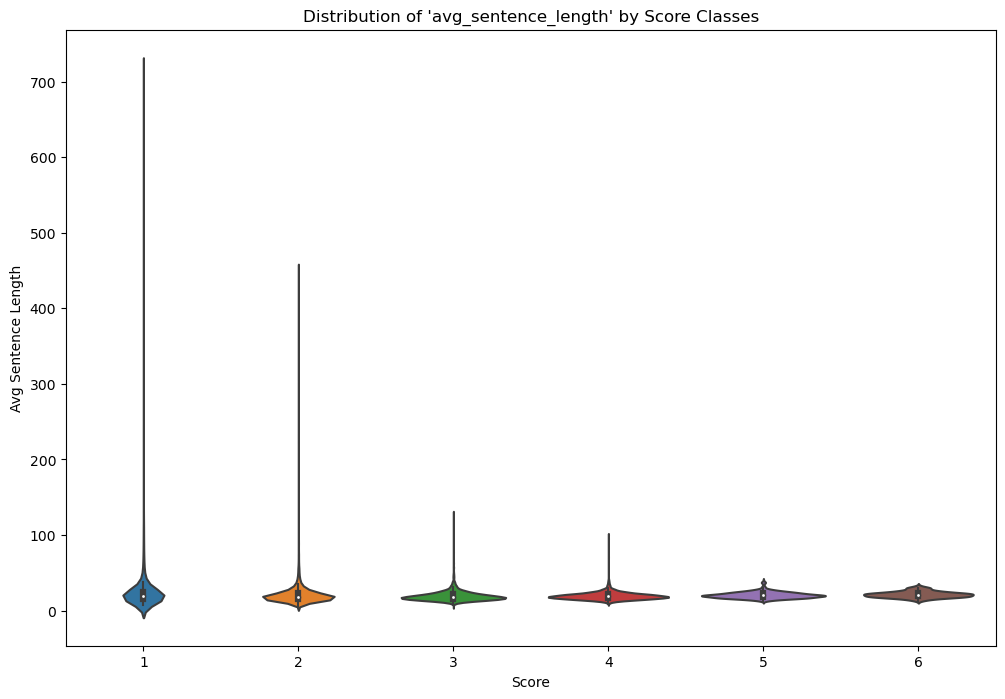

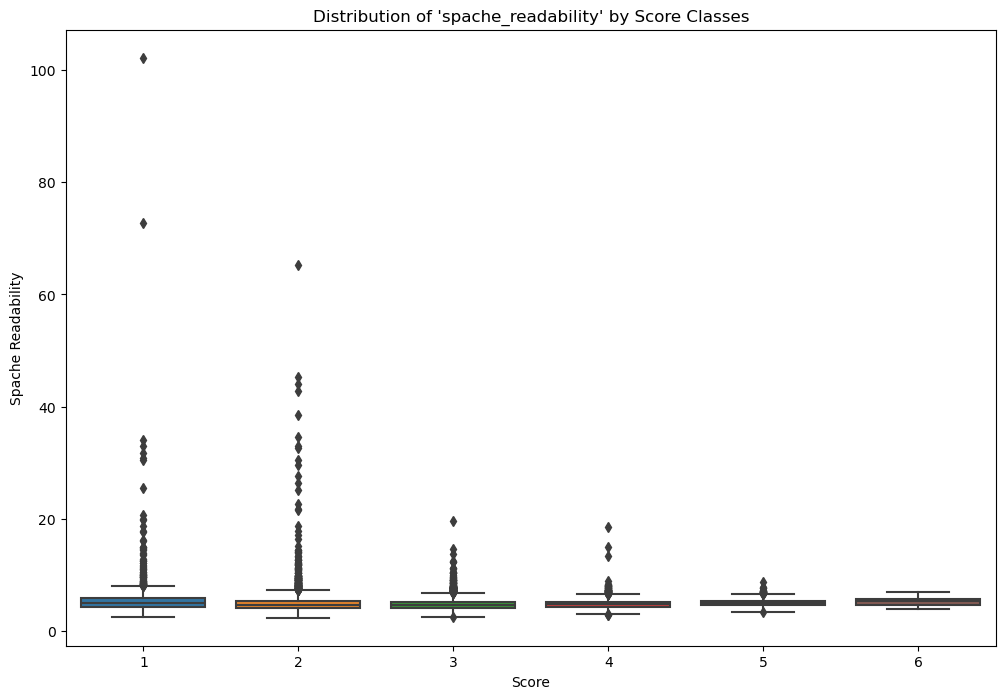

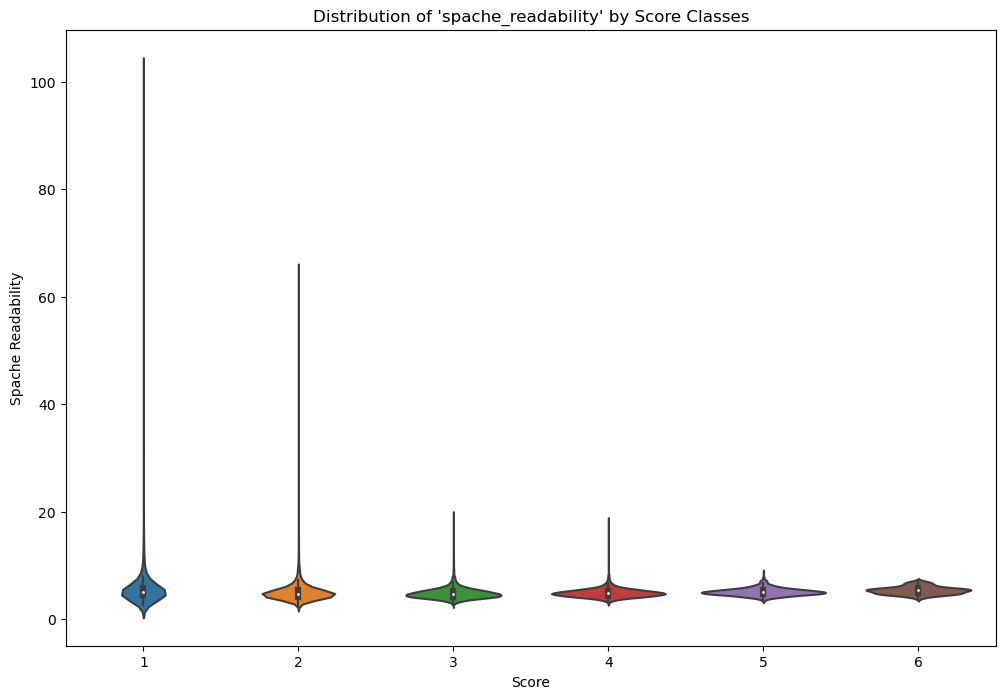

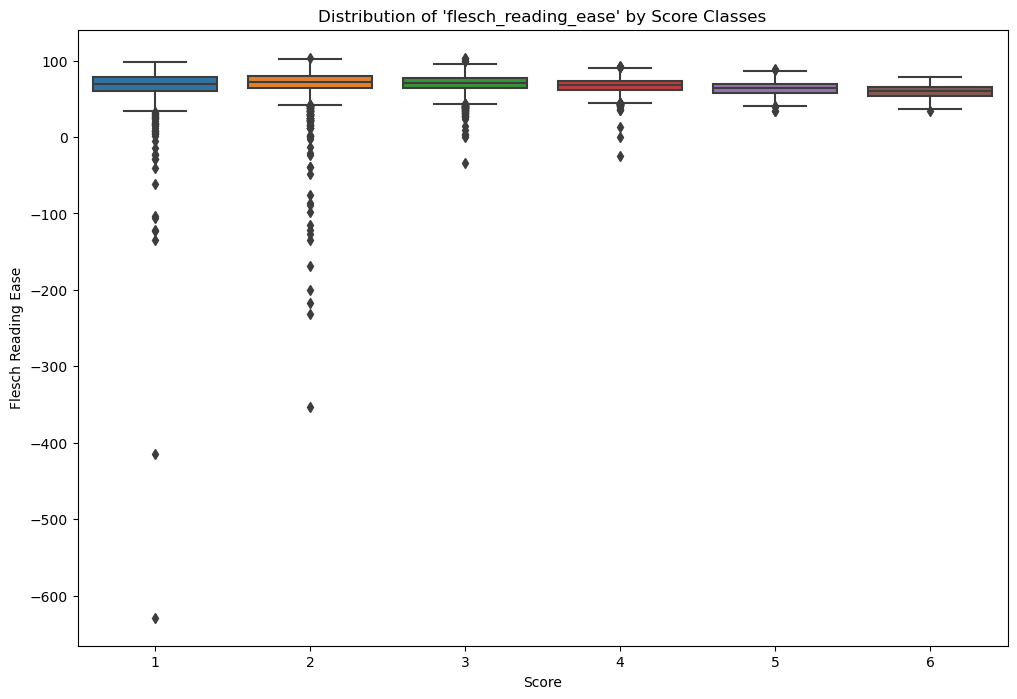

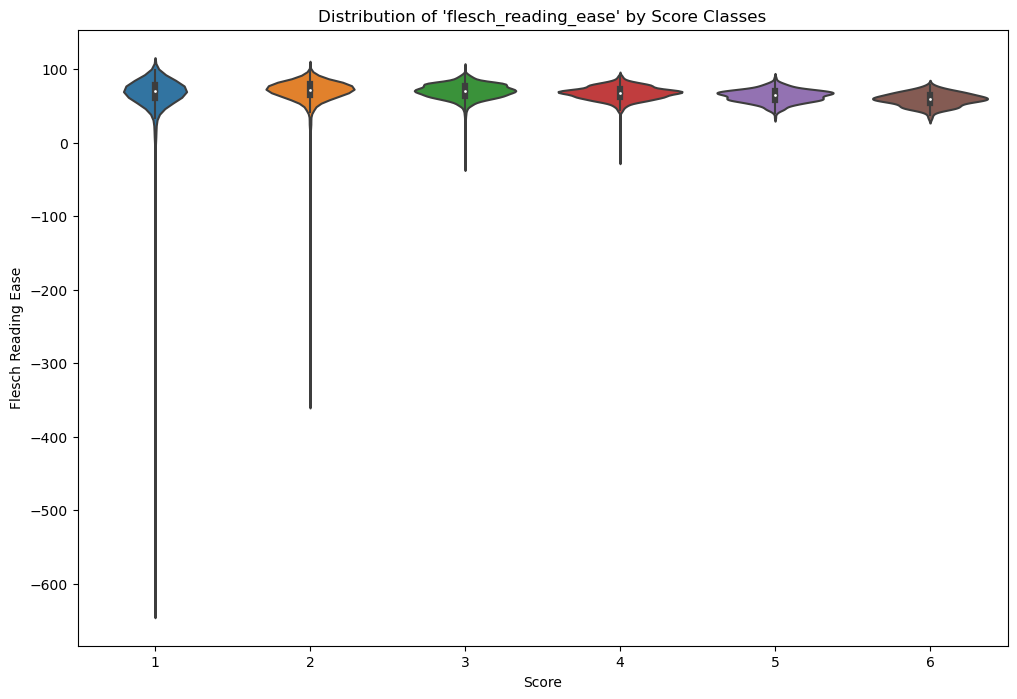

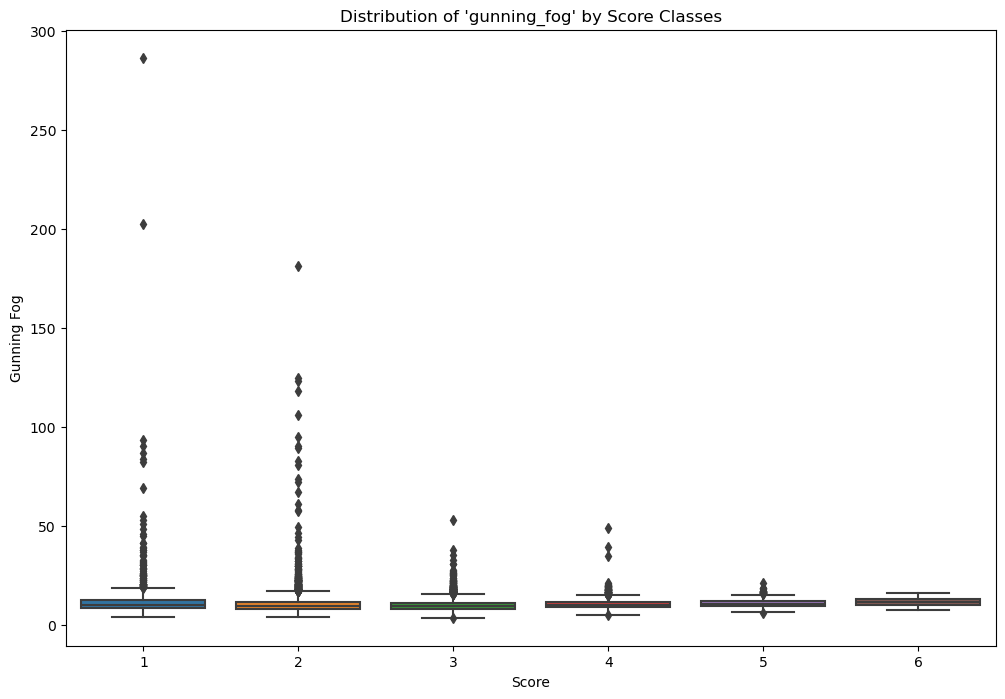

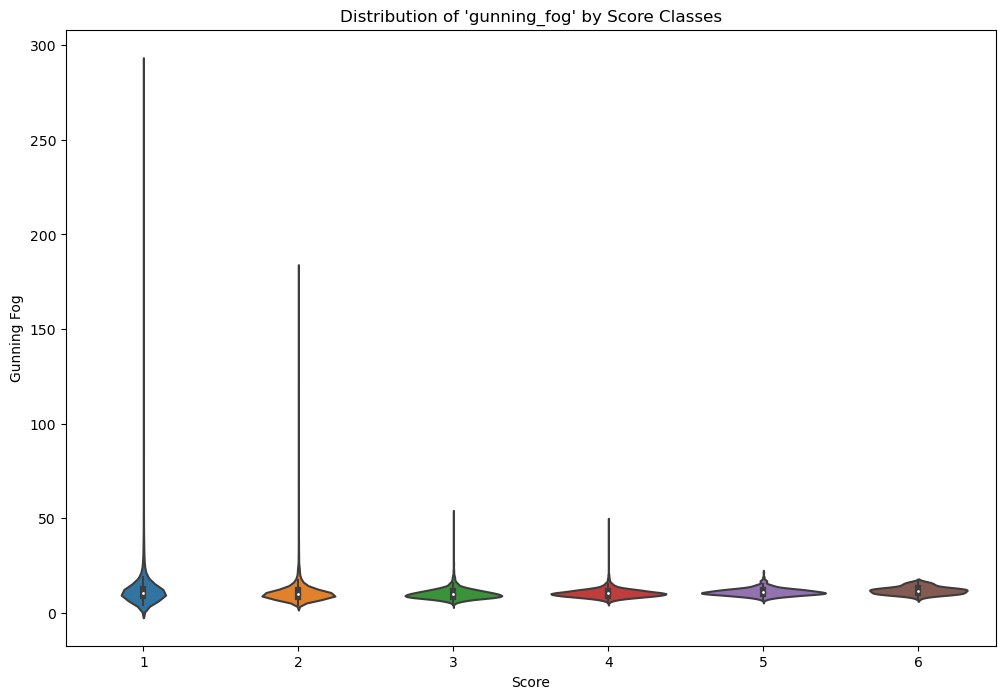

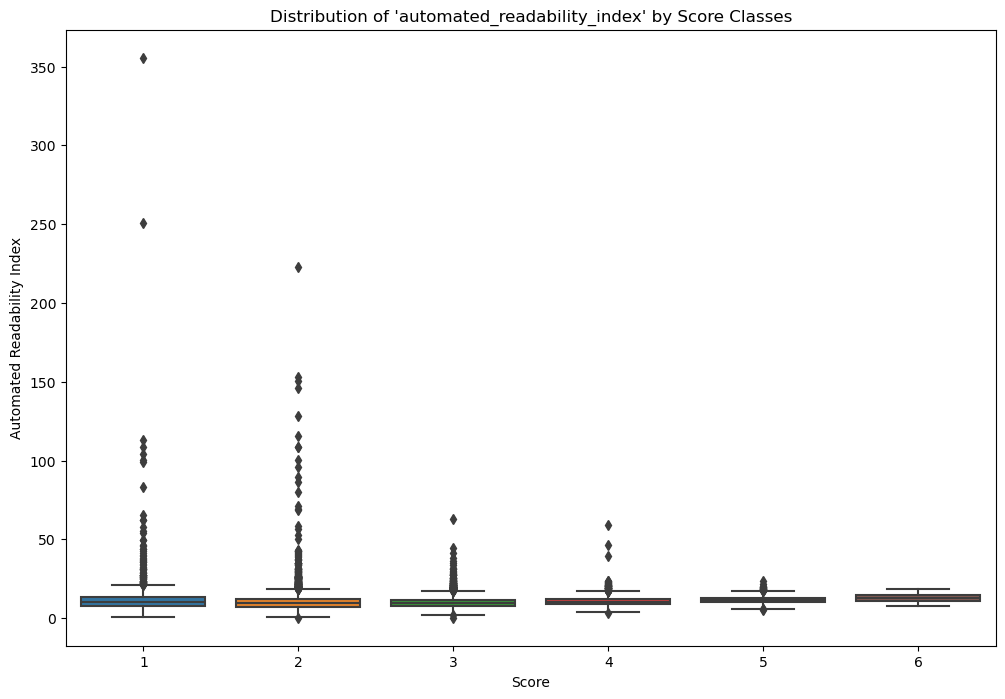

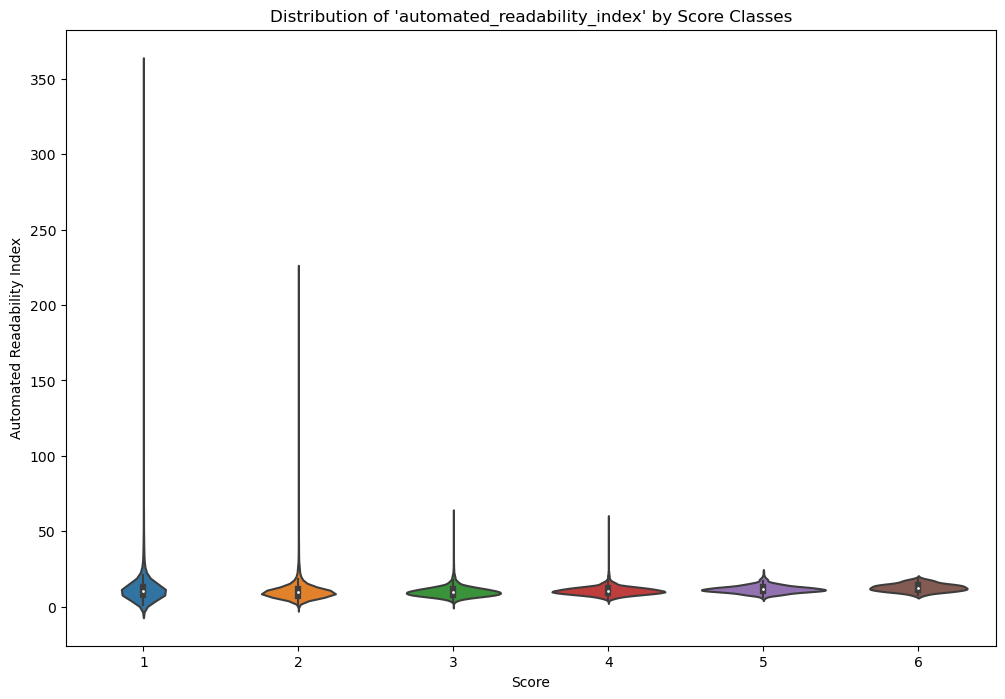

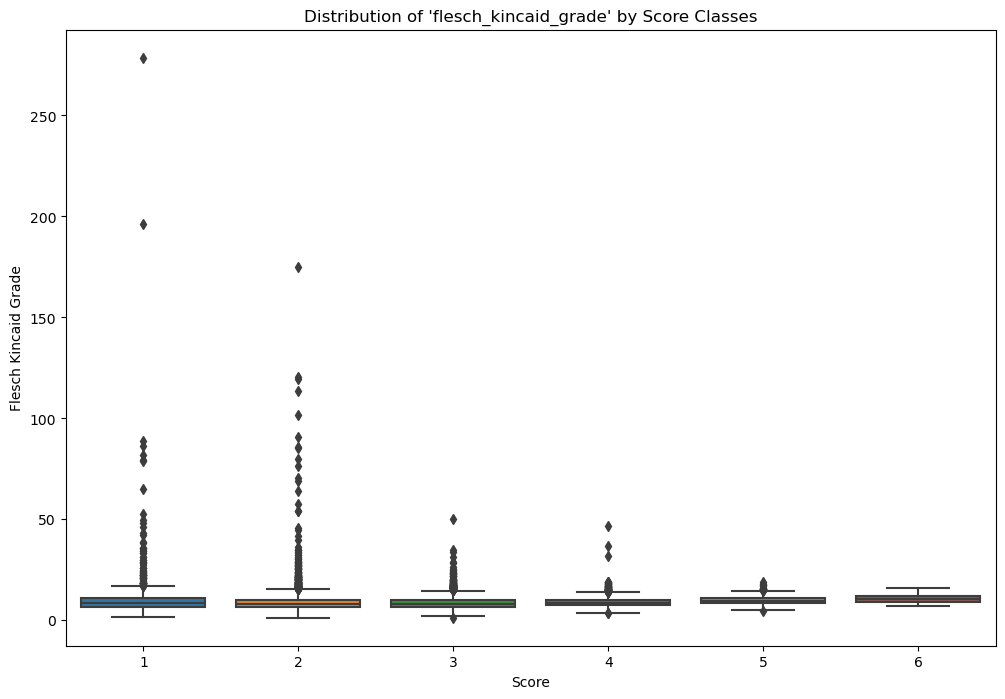

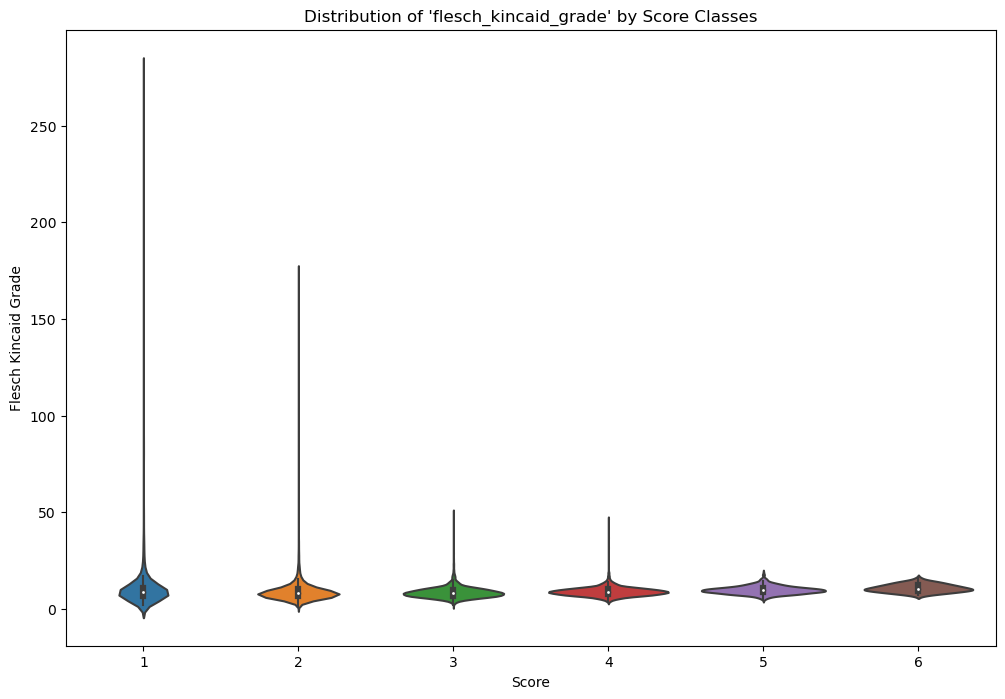

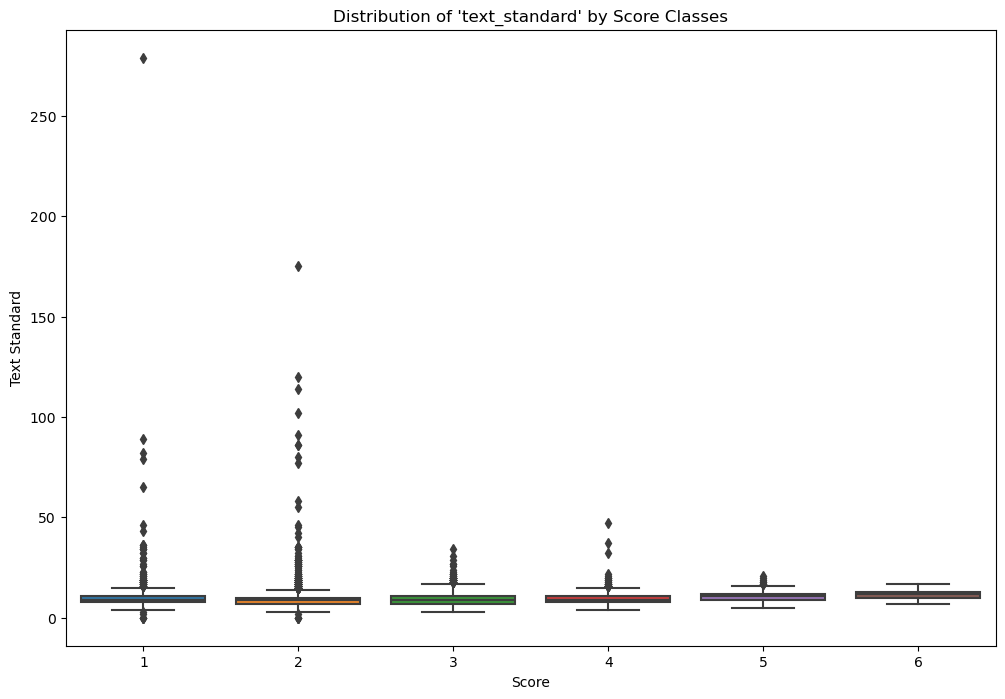

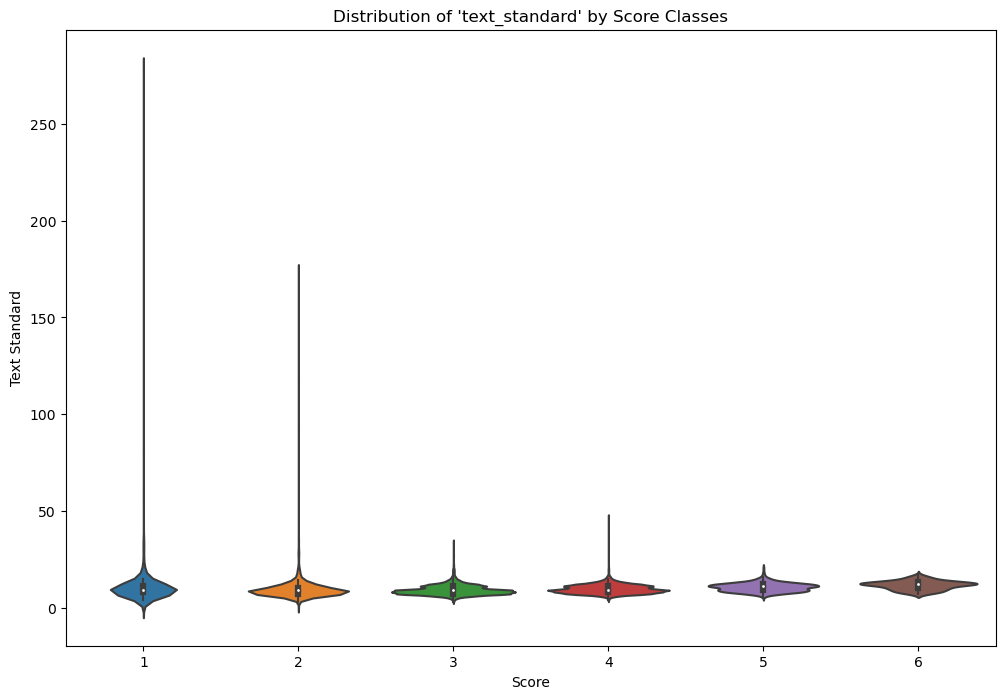

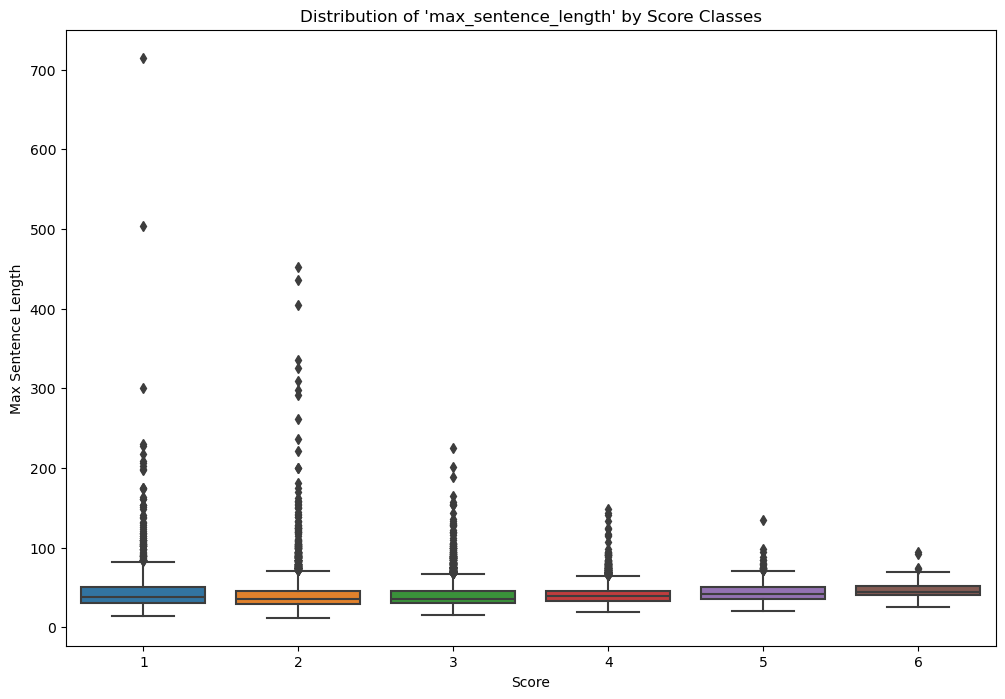

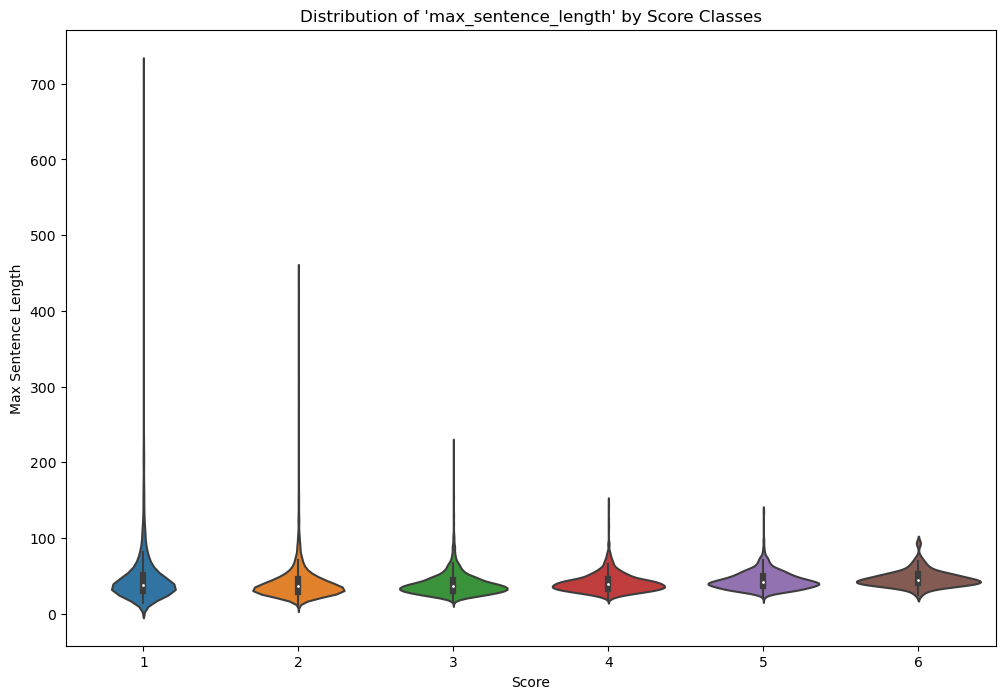

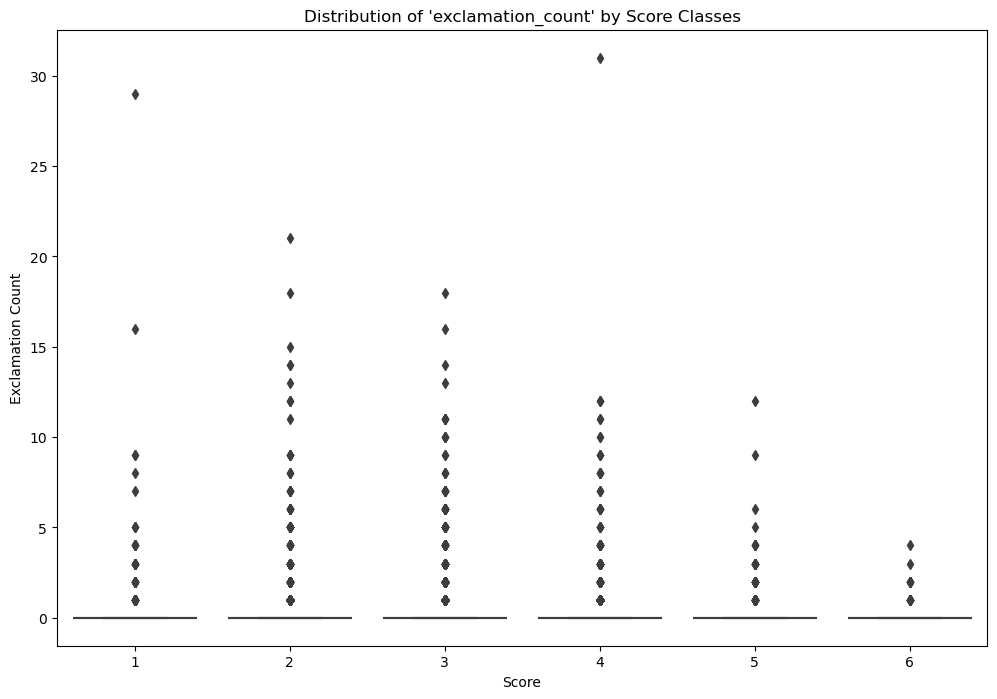

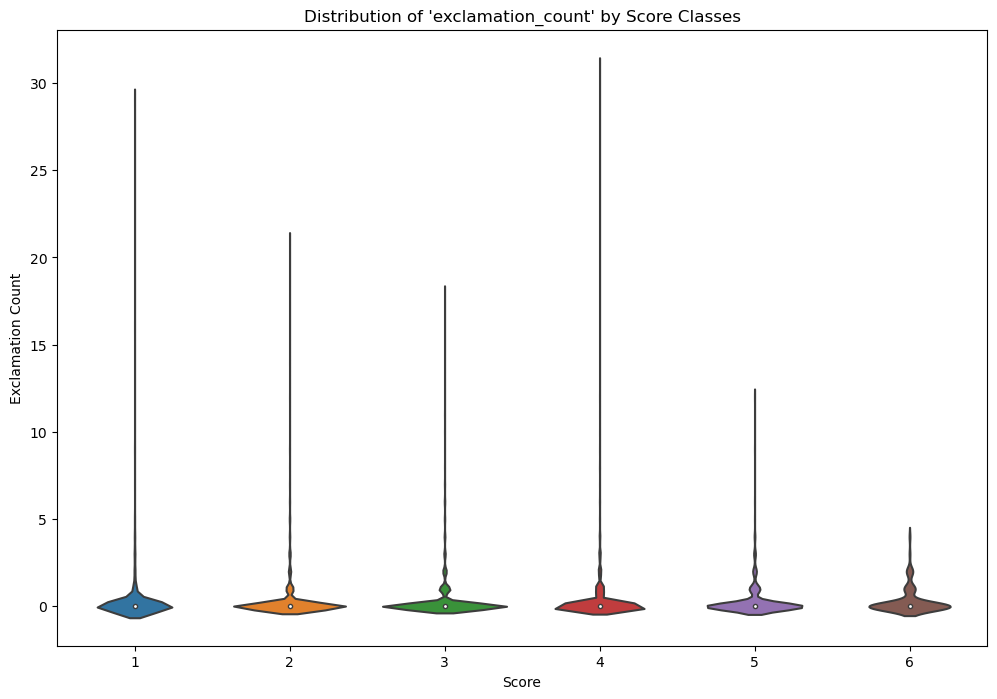

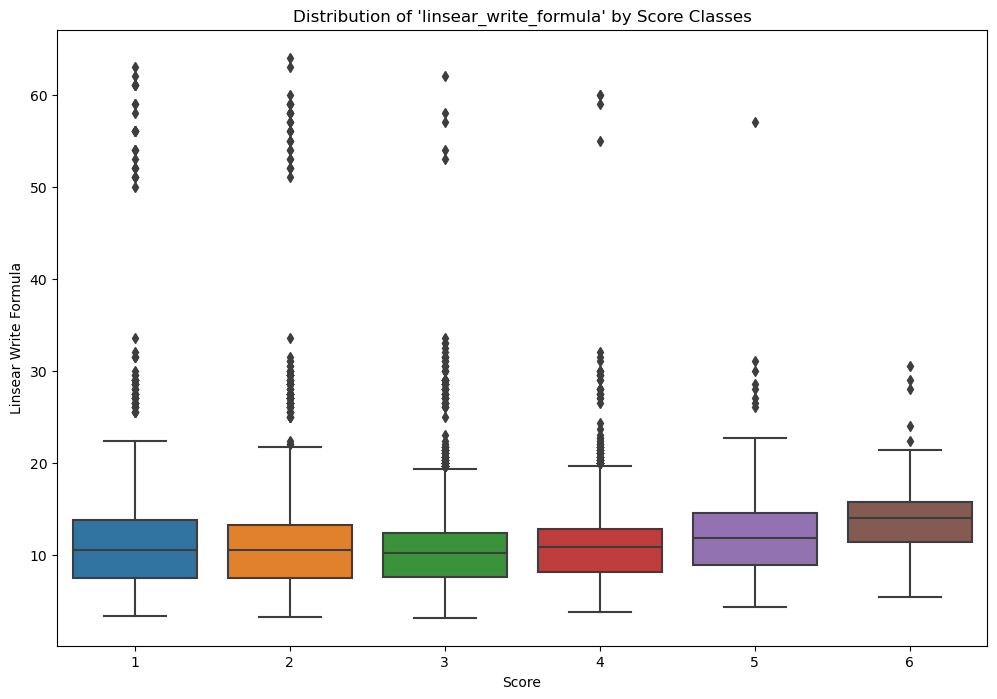

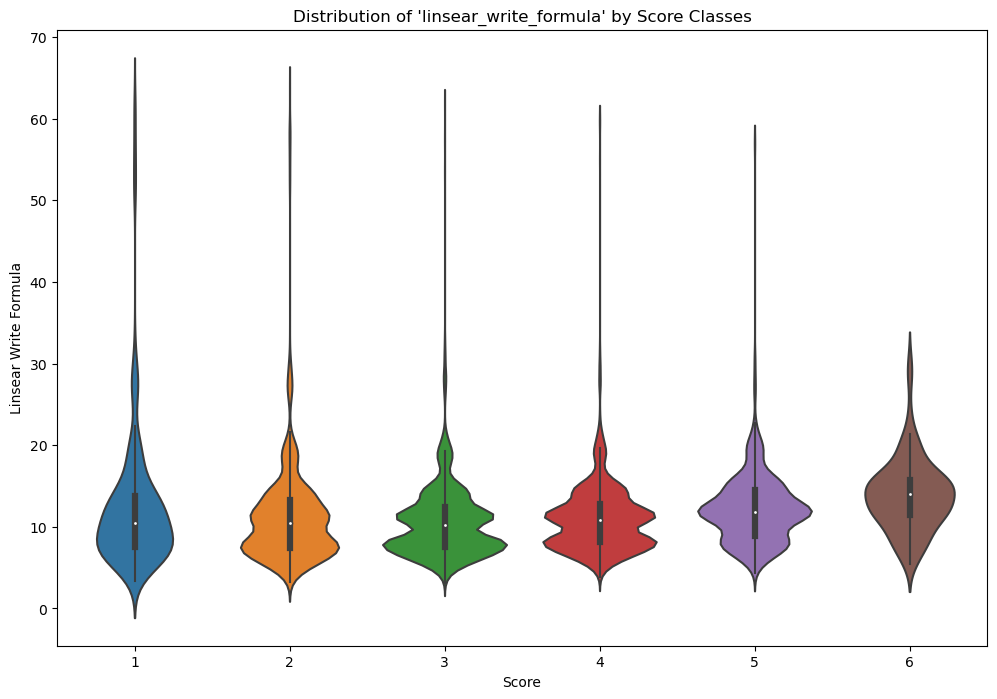

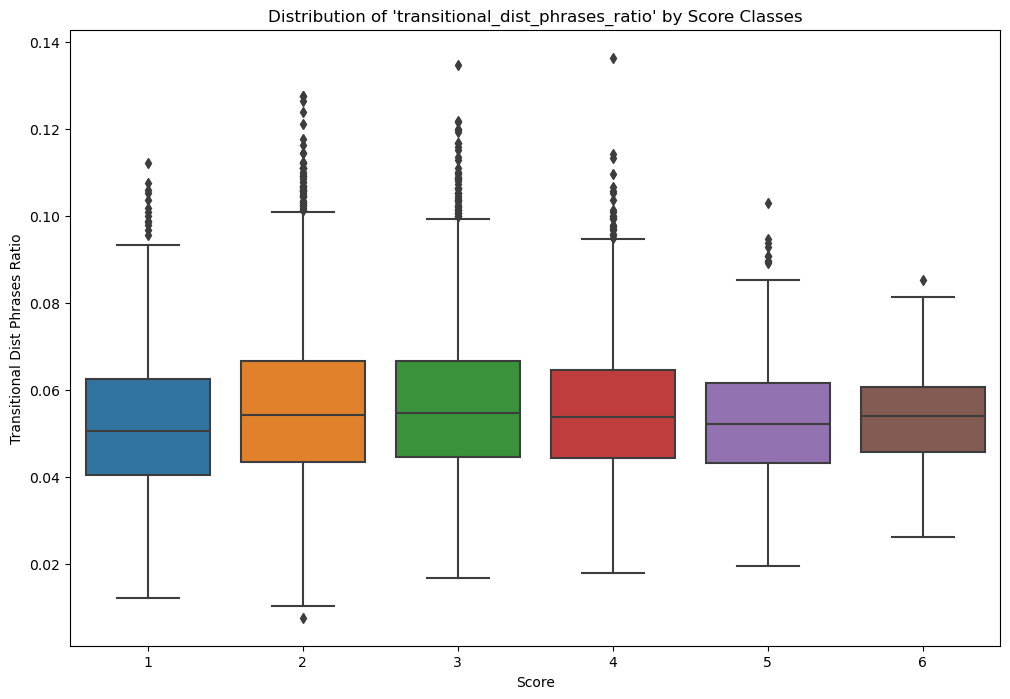

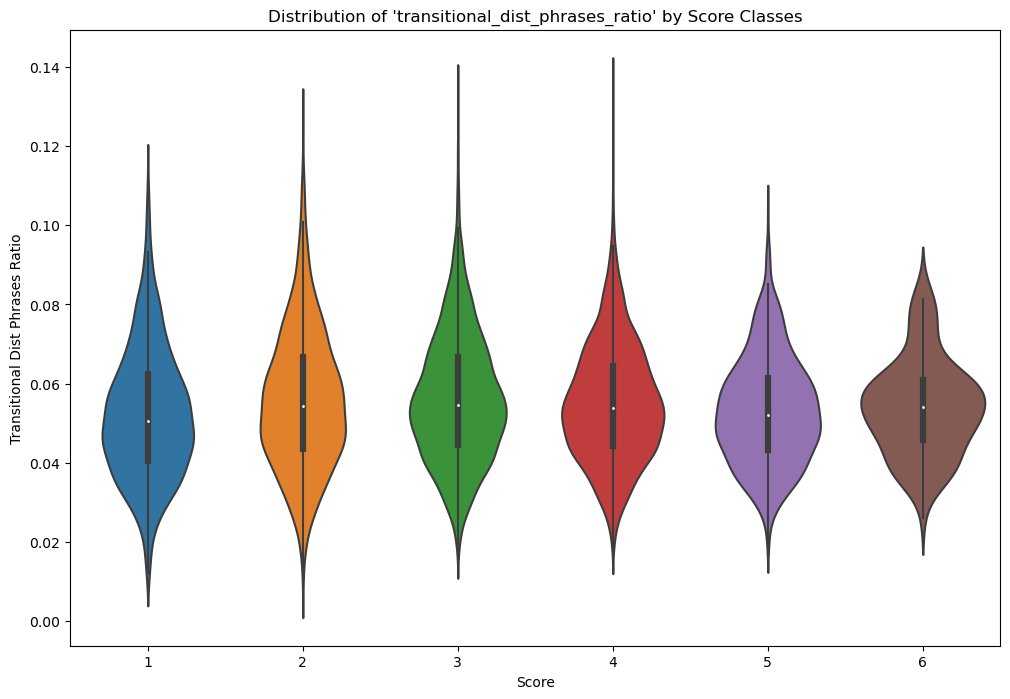

In [24]:
# 1. Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df and f_stat_df are already loaded with the necessary features and target

# List of relevant features with Relevance = High
medium_relevance_features = f_stat_df[f_stat_df['Relevance'] == 'Low']['Feature'].tolist()

# Function to create and save plots
def plot_feature_by_score(feature):
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='score', y=feature, data=df)
    plt.title(f"Distribution of '{feature}' by Score Classes")
    plt.xlabel("Score")
    plt.ylabel(feature.replace('_', ' ').title())
    #plt.savefig(f'{feature}_boxplot.png')
    plt.show()

    plt.figure(figsize=(12, 8))
    sns.violinplot(x='score', y=feature, data=df)
    plt.title(f"Distribution of '{feature}' by Score Classes")
    plt.xlabel("Score")
    plt.ylabel(feature.replace('_', ' ').title())
    #plt.savefig(f'{feature}_violinplot.png')
    plt.show()

# Plot and save for all high relevance features
for feature in medium_relevance_features:
    plot_feature_by_score(feature)


Based on the plots for the features categorized as having low relevance the following observations can be made:

1. **Lack of Clear Trend**: The distributions of these features across the different score classes do not show a clear trend or pattern. For instance, the 'dash_count' and 'avg_sentence_length' features do not exhibit a consistent increase or decrease with higher scores. This indicates that these features do not have a strong correlation with the target variable (score).

2. **High Variability**: The presence of numerous outliers across all score classes for these features suggests high variability. This variability within each score class diminishes the predictive power of these features.

3. **Overlapping Distributions**: The boxplots and violin plots demonstrate significant overlap in the distributions of these features across different score classes. This overlap implies that the features do not effectively differentiate between the score classes, further reducing their relevance in the prediction task.

#### Conclusion
Overall, the lack of clear trends, high variability, and overlapping distributions of the low relevance features suggest that they are not significant predictors of the score. These features are less likely to contribute to the accuracy and reliability of the scoring prediction model.


## Print number of relevant (with relevance = High) and non-relevant features 

In [27]:
# 1. Separate relevant and non-relevant features
relevant_features = f_stat_df[f_stat_df['Relevance'] == 'High']['Feature'].tolist()
non_relevant_features = f_stat_df[f_stat_df['Relevance'] != 'High']['Feature'].tolist()

# 2. Count relevant and non-relevant features
num_relevant_features = len(relevant_features)
num_non_relevant_features = len(non_relevant_features)

# 3. Display the count of relevant features
print("Number of relevant features:", num_relevant_features)
print("\nNumber of non-relevant features:", num_non_relevant_features)

# 4. Display the lists of relevant and non-relevant features
print("\nRelevant features:", relevant_features)
print("\nNon-relevant features:", non_relevant_features)


Number of relevant features: 20

Number of non-relevant features: 28

Relevant features: ['syllable_count', 'letters_count', 'char_count', 'reading_time_minutes', 'reading_time', 'preprocessed_text_count', 'lexicon_count', 'word_count_in_full_text', 'stopword_count_in_full_text', 'monosyllabcount', 'mistakes_dist_ratio', 'polysyllabcount', 'preprocessed_text_dist_count', 'sentence_count', 'mistakes_dist_dist_ratio', 'difficult_words', 'comma_count', 'transitional_phrases_c', 'transitional_phrases_dist_c', 'text_dist_words_ratio']

Non-relevant features: ['capital_word_count', 'not_count', 'transitional_dist_dist_phrases_ratio', 'transitional_phrases_ratio', 'capital_letters_count', 'coleman_liau_index', 'smog_index', 'words_with_apostrophe_count', 'dash_count', 'newline_count', 'question_count', 'dale_chall_readability_score', 'mistakes_dist_count', 'mistakes_count', 'min_sentence_length', 'colon_count', 'mcalpine_eflaw', 'avg_sentence_length', 'spache_readability', 'flesch_reading_eas

## Save plots for report

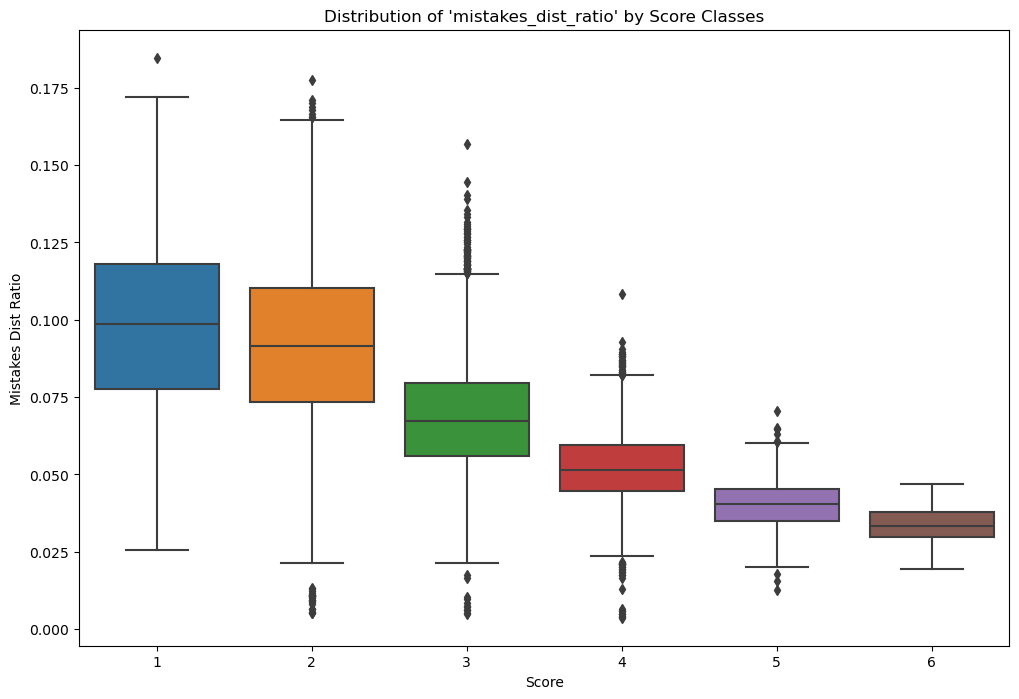

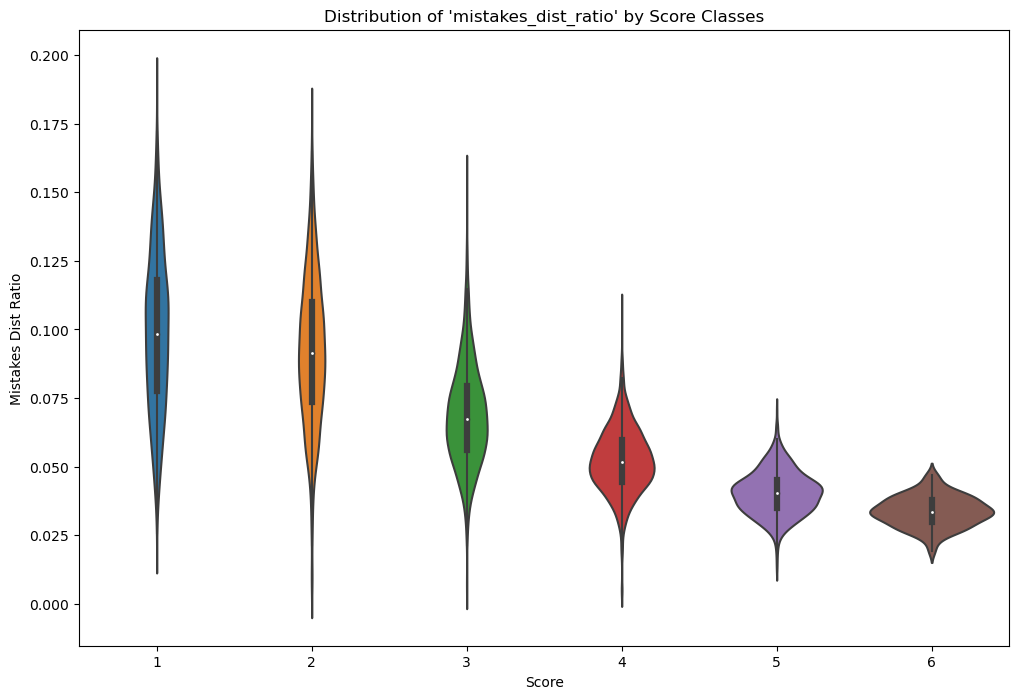

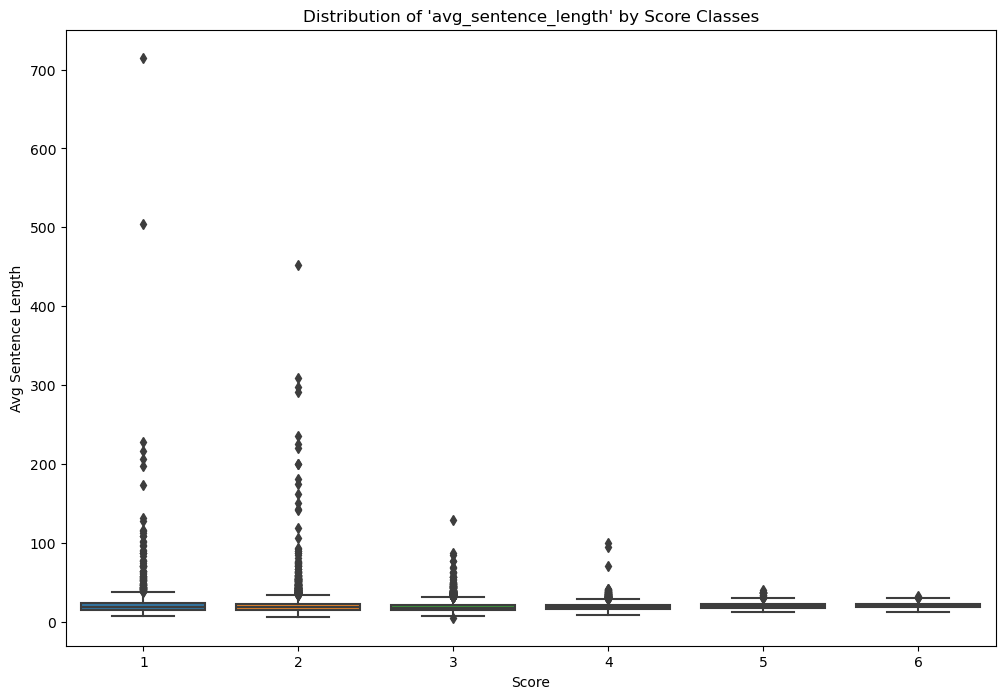

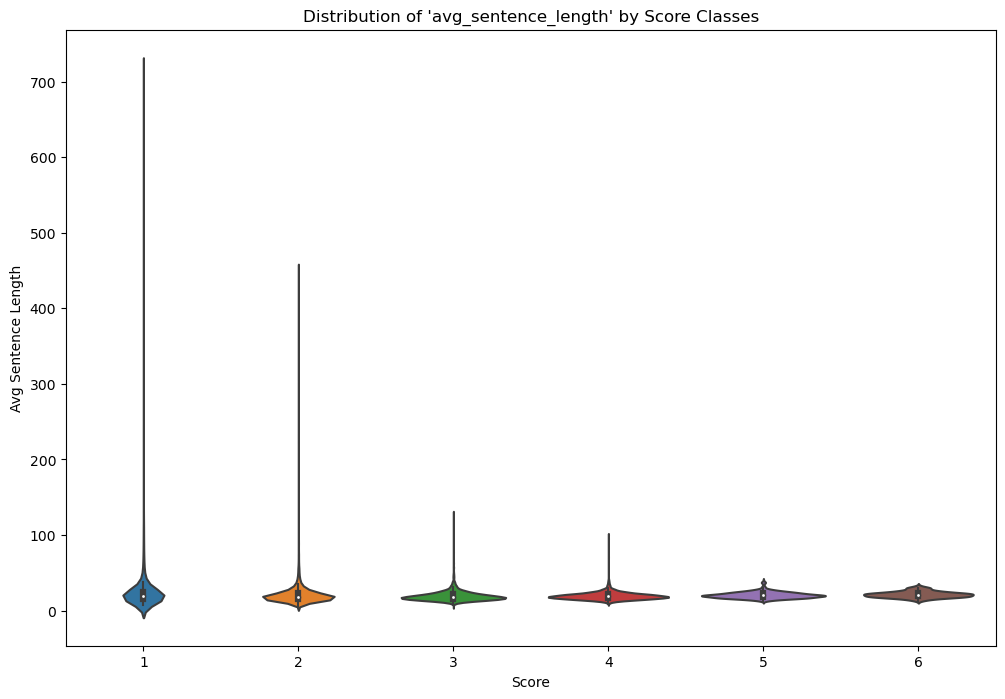

In [29]:
# 1. Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Function to create and save plots for a single feature
def plot_feature_by_score(feature):
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='score', y=feature, data=df)
    plt.title(f"Distribution of '{feature}' by Score Classes")
    plt.xlabel("Score")
    plt.ylabel(feature.replace('_', ' ').title())
    plt.savefig(f'{feature}_boxplot.png')
    plt.show()

    plt.figure(figsize=(12, 8))
    sns.violinplot(x='score', y=feature, data=df)
    plt.title(f"Distribution of '{feature}' by Score Classes")
    plt.xlabel("Score")
    plt.ylabel(feature.replace('_', ' ').title())
    plt.savefig(f'{feature}_violinplot.png')
    plt.show()

# Plot and save for the feature 'mistakes_dist_ratio'
plot_feature_by_score('mistakes_dist_ratio')
plot_feature_by_score('avg_sentence_length')
